In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

C:\Users\guilh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\guilh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\guilh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\guilh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
tf.test.is_gpu_available()

False

In [4]:
data = pd.read_csv('1.2 Million Used Car Listings/tc20171021.csv', error_bad_lines=False)
del data['Id']
del data['Vin']
data = shuffle(data)

b'Skipping line 297911: expected 9 fields, saw 10\nSkipping line 297912: expected 9 fields, saw 10\nSkipping line 297913: expected 9 fields, saw 10\nSkipping line 297914: expected 9 fields, saw 10\nSkipping line 297915: expected 9 fields, saw 10\nSkipping line 297916: expected 9 fields, saw 10\nSkipping line 297917: expected 9 fields, saw 10\nSkipping line 297918: expected 9 fields, saw 10\nSkipping line 297919: expected 9 fields, saw 10\nSkipping line 297920: expected 9 fields, saw 10\nSkipping line 297921: expected 9 fields, saw 10\nSkipping line 297922: expected 9 fields, saw 10\nSkipping line 297923: expected 9 fields, saw 10\nSkipping line 297925: expected 9 fields, saw 10\nSkipping line 297926: expected 9 fields, saw 10\nSkipping line 297927: expected 9 fields, saw 10\nSkipping line 297928: expected 9 fields, saw 10\nSkipping line 297929: expected 9 fields, saw 10\nSkipping line 297930: expected 9 fields, saw 10\nSkipping line 297931: expected 9 fields, saw 10\nSkipping line 2979

b'Skipping line 943223: expected 9 fields, saw 10\n'
b'Skipping line 1081866: expected 9 fields, saw 10\nSkipping line 1081867: expected 9 fields, saw 10\nSkipping line 1081868: expected 9 fields, saw 10\nSkipping line 1081869: expected 9 fields, saw 10\nSkipping line 1081870: expected 9 fields, saw 10\nSkipping line 1081871: expected 9 fields, saw 10\nSkipping line 1081872: expected 9 fields, saw 10\nSkipping line 1081873: expected 9 fields, saw 10\nSkipping line 1081874: expected 9 fields, saw 10\nSkipping line 1081876: expected 9 fields, saw 10\nSkipping line 1081877: expected 9 fields, saw 10\nSkipping line 1081878: expected 9 fields, saw 10\nSkipping line 1081879: expected 9 fields, saw 10\nSkipping line 1081881: expected 9 fields, saw 10\nSkipping line 1081882: expected 9 fields, saw 10\nSkipping line 1081883: expected 9 fields, saw 10\nSkipping line 1081884: expected 9 fields, saw 10\nSkipping line 1081885: expected 9 fields, saw 10\nSkipping line 1081886: expected 9 fields, saw

b'Skipping line 1196353: expected 9 fields, saw 10\nSkipping line 1196408: expected 9 fields, saw 10\nSkipping line 1196469: expected 9 fields, saw 10\nSkipping line 1196583: expected 9 fields, saw 10\nSkipping line 1196586: expected 9 fields, saw 10\nSkipping line 1196772: expected 9 fields, saw 10\nSkipping line 1196791: expected 9 fields, saw 10\nSkipping line 1196856: expected 9 fields, saw 10\nSkipping line 1196960: expected 9 fields, saw 10\nSkipping line 1197012: expected 9 fields, saw 10\nSkipping line 1197022: expected 9 fields, saw 10\nSkipping line 1197197: expected 9 fields, saw 10\nSkipping line 1197287: expected 9 fields, saw 10\nSkipping line 1197295: expected 9 fields, saw 10\nSkipping line 1197401: expected 9 fields, saw 10\nSkipping line 1197466: expected 9 fields, saw 10\nSkipping line 1197470: expected 9 fields, saw 10\nSkipping line 1197578: expected 9 fields, saw 10\nSkipping line 1197636: expected 9 fields, saw 10\nSkipping line 1197750: expected 9 fields, saw 10

In [5]:
data

,Price,Year,Mileage,City,State,Make,Model
150427,48850,2015,10990,Carrollton,TX,BMW,6
579335,27983,2015,24326,Tucson,AZ,Dodge,ChallengerR/T
1057828,13999,2015,7875,Show Low,AZ,Nissan,Versa
806223,13795,2016,49517,Henrico,VA,Hyundai,Elantra4dr
184761,15900,2014,36246,Chestrland,OH,Acura,ILX5-Speed
...,...,...,...,...,...,...,...
361359,19949,2016,33041,North Hollywood,CA,Honda,Civic
845726,12488,2014,35440,Costa Mesa,CA,Jeep,CompassSport
133633,18533,2017,15094,Victorville,CA,Chevrolet,MalibuLT
328621,11536,2013,93568,Hayward,CA,Toyota,PriusThree


In [6]:
n_train = 5000
n_test = 500

In [7]:
xtrain1 = np.asarray(data)[:n_train, 1:3].astype(np.float64)
xtest1 = np.asarray(data)[n_train:n_test+n_train, 1:3].astype(np.float64)
x2_array = np.asarray(data)[:n_test+n_train, 3:]
ytrain = np.asarray(data)[:n_train, 0].astype(np.float64)
ytest = np.asarray(data)[n_train:n_test+n_train, 0].astype(np.float64)

In [8]:
x2_array[:, 2:] = ' ' + x2_array[:, 2:]
x2_array = np.squeeze(np.sum(x2_array, axis=-1))

In [9]:
x2_list = x2_array.ravel().tolist()
VOCAB_SIZE = 5000
x2 = [one_hot(d, VOCAB_SIZE) for d in x2_list]

In [10]:
MAX_LENGTH = 6
x2 = pad_sequences(x2, maxlen=MAX_LENGTH, padding='post')

In [11]:
xtrain2 = x2[:n_train, :]
xtest2 = x2[n_train:n_test+n_train, :]

In [12]:
def make_model(num_input_shape, word_input_shape, vocab_size):
  
    word_input = Input(word_input_shape)
    num_input = Input(num_input_shape)
    
    X0 = Embedding(vocab_size, 32)(word_input)
    
    X0 = Flatten()(X0)
    X0 = Dense(16)(X0)
    X0 = Activation('relu')(X0)
    
    X0 = Dense(8)(X0)
    X0 = Activation('relu')(X0)
    
    X1 = Dense(16)(num_input)
    X1 = Activation('relu')(X1)
    
    X1 = Dense(8)(X1)
    X1 = Activation('relu')(X1)
    
    Y = Concatenate(axis=-1)([X0, X1])
    Y = Dense(8)(Y)
    Y = Activation('relu')(Y)
    Y = Dense(4)(Y)
    Y = Activation('relu')(Y)
    Y = Dense(2)(Y)
    Y = Activation('relu')(Y)
    Y = Dense(1)(Y)
    Y = Activation('relu')(Y)

    model = Model(inputs=[num_input, word_input] , outputs=Y, name='model')
    
    return model

def make_model(num_input_shape, word_input_shape):
  
    word_input = Input(word_input_shape)
    num_input = Input(num_input_shape)
    
    X0 = Embedding(5000, 32)(word_input)
    
    X0 = Flatten()(X0)
    X0 = Dense(8)(X0)
    X0 = Activation('relu')(X0)
    
    X0 = Dense(4)(X0)
    X0 = Activation('relu')(X0)
    
    X1 = Dense(8)(num_input)
    X1 = Activation('relu')(X1)
    
    X1 = Dense(4)(X1)
    X1 = Activation('relu')(X1)
    
    Y = Concatenate(axis=-1)([X0, X1])
    Y = Dense(2)(Y)
    Y = Activation('relu')(Y)
    Y = Dense(1)(Y)
    Y = Activation('relu')(Y)

    model = Model(inputs=[num_input, word_input] , outputs=Y, name='model')
    
    return model

In [13]:
opt = Adam(lr=1e-3)
model = make_model(xtrain1.shape[1:], xtrain2.shape[1:], VOCAB_SIZE)
model.compile(optimizer=opt, loss='mse', metrics=['mape'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 6, 32)        160000      input_1[0][0]                    
__________________________________________________________________________________________________
flatten (Flatten)               (None, 192)          0           embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2)]          0                                            
______________________________________________________________________________________________

In [15]:
history = model.fit(x=[xtrain1, xtrain2], y=ytrain, epochs=10000, validation_data=[[xtest1, xtest2], ytest], batch_size=128)

Train on 5000 samples, validate on 500 samples
Epoch 1/10000
5000/5000 [==============================] - 0s 99us/sample - loss: 424742483.7632 - mean_absolute_percentage_error: 85.2458 - val_loss: 355386520.8320 - val_mean_absolute_percentage_error: 82.1083
Epoch 2/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 409934931.2512 - mean_absolute_percentage_error: 88.2893 - val_loss: 352289350.6560 - val_mean_absolute_percentage_error: 79.8107
Epoch 3/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 404674733.4144 - mean_absolute_percentage_error: 86.5594 - val_loss: 343168150.5280 - val_mean_absolute_percentage_error: 79.5808
Epoch 4/10000
5000/5000 [==============================] - 0s 31us/sample - loss: 391659004.6080 - mean_absolute_percentage_error: 85.6987 - val_loss: 327833323.5200 - val_mean_absolute_percentage_error: 76.7651
Epoch 5/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 366997238.4768 - mean_a

5000/5000 [==============================] - 0s 24us/sample - loss: 33307024.6288 - mean_absolute_percentage_error: 18.3867 - val_loss: 42692857.0080 - val_mean_absolute_percentage_error: 30.6248
Epoch 40/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 33936415.7504 - mean_absolute_percentage_error: 19.4876 - val_loss: 38548593.6640 - val_mean_absolute_percentage_error: 26.4360
Epoch 41/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 31893835.9296 - mean_absolute_percentage_error: 17.9127 - val_loss: 38897364.4000 - val_mean_absolute_percentage_error: 26.0674
Epoch 42/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 31100073.3504 - mean_absolute_percentage_error: 17.8191 - val_loss: 41383145.3760 - val_mean_absolute_percentage_error: 26.7363
Epoch 43/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 31179392.0832 - mean_absolute_percentage_error: 17.9138 - val_loss: 39386871.2960 - val_

Epoch 78/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 19367728.1472 - mean_absolute_percentage_error: 16.0505 - val_loss: 40288313.0560 - val_mean_absolute_percentage_error: 25.6225
Epoch 79/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 18565066.5600 - mean_absolute_percentage_error: 15.3013 - val_loss: 48530553.7600 - val_mean_absolute_percentage_error: 28.0694
Epoch 80/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 21391249.1392 - mean_absolute_percentage_error: 18.1515 - val_loss: 40801374.5920 - val_mean_absolute_percentage_error: 26.4144
Epoch 81/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 18874054.0992 - mean_absolute_percentage_error: 15.9336 - val_loss: 41622635.6480 - val_mean_absolute_percentage_error: 27.1123
Epoch 82/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 18026962.5120 - mean_absolute_percentage_error: 15.1532 - val_loss: 41034

Epoch 117/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 15131790.1568 - mean_absolute_percentage_error: 16.1116 - val_loss: 45085808.8320 - val_mean_absolute_percentage_error: 27.3727
Epoch 118/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 15899094.8316 - mean_absolute_percentage_error: 16.9765 - val_loss: 44728726.9920 - val_mean_absolute_percentage_error: 25.8018
Epoch 119/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 13528297.5584 - mean_absolute_percentage_error: 14.4461 - val_loss: 44140784.3200 - val_mean_absolute_percentage_error: 25.6300
Epoch 120/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 13487010.7280 - mean_absolute_percentage_error: 14.4546 - val_loss: 43523804.0320 - val_mean_absolute_percentage_error: 25.8800
Epoch 121/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 13403366.7840 - mean_absolute_percentage_error: 14.2978 - val_loss: 

Epoch 156/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 11805762.1648 - mean_absolute_percentage_error: 14.0524 - val_loss: 45617485.1200 - val_mean_absolute_percentage_error: 25.9354
Epoch 157/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 11263454.9792 - mean_absolute_percentage_error: 13.5472 - val_loss: 45639480.7040 - val_mean_absolute_percentage_error: 26.8232
Epoch 158/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 11265241.3376 - mean_absolute_percentage_error: 13.5505 - val_loss: 45213526.7200 - val_mean_absolute_percentage_error: 25.5961
Epoch 159/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 11588793.7792 - mean_absolute_percentage_error: 14.0888 - val_loss: 45357011.1360 - val_mean_absolute_percentage_error: 25.6464
Epoch 160/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 11169246.3440 - mean_absolute_percentage_error: 13.3010 - val_loss: 

Epoch 195/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 9821185.6768 - mean_absolute_percentage_error: 13.0580 - val_loss: 45425480.3840 - val_mean_absolute_percentage_error: 24.8445
Epoch 196/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 9477102.4702 - mean_absolute_percentage_error: 12.6524 - val_loss: 45712959.9360 - val_mean_absolute_percentage_error: 25.1663
Epoch 197/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 9495022.3540 - mean_absolute_percentage_error: 12.7218 - val_loss: 46320097.2480 - val_mean_absolute_percentage_error: 24.7385
Epoch 198/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 9207712.1840 - mean_absolute_percentage_error: 12.3812 - val_loss: 45844159.2000 - val_mean_absolute_percentage_error: 24.5364
Epoch 199/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 9921495.8592 - mean_absolute_percentage_error: 13.2832 - val_loss: 45814

5000/5000 [==============================] - 0s 24us/sample - loss: 8322878.1296 - mean_absolute_percentage_error: 11.9056 - val_loss: 47798707.8080 - val_mean_absolute_percentage_error: 25.7522
Epoch 234/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 8445215.8920 - mean_absolute_percentage_error: 11.9797 - val_loss: 48291396.8320 - val_mean_absolute_percentage_error: 25.0110
Epoch 235/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 8523683.1360 - mean_absolute_percentage_error: 12.2357 - val_loss: 47487851.6800 - val_mean_absolute_percentage_error: 25.4892
Epoch 236/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 8619296.1712 - mean_absolute_percentage_error: 12.2749 - val_loss: 47288763.5200 - val_mean_absolute_percentage_error: 24.7191
Epoch 237/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 8232791.0500 - mean_absolute_percentage_error: 11.6878 - val_loss: 48016292.7360 - val_m

Epoch 272/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 7545919.4492 - mean_absolute_percentage_error: 11.5463 - val_loss: 49190876.4800 - val_mean_absolute_percentage_error: 25.0689
Epoch 273/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 7320883.7664 - mean_absolute_percentage_error: 11.1129 - val_loss: 50080332.5440 - val_mean_absolute_percentage_error: 25.2676
Epoch 274/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 7469830.0776 - mean_absolute_percentage_error: 11.1993 - val_loss: 52299717.3440 - val_mean_absolute_percentage_error: 27.5859
Epoch 275/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 7457700.4032 - mean_absolute_percentage_error: 11.3838 - val_loss: 49846851.2640 - val_mean_absolute_percentage_error: 25.1838
Epoch 276/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 7141078.9040 - mean_absolute_percentage_error: 10.7940 - val_loss: 49543

Epoch 311/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 6608788.8640 - mean_absolute_percentage_error: 10.7611 - val_loss: 54188387.0080 - val_mean_absolute_percentage_error: 25.2683
Epoch 312/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 6970043.1456 - mean_absolute_percentage_error: 11.5021 - val_loss: 52556134.3680 - val_mean_absolute_percentage_error: 24.9070
Epoch 313/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 6683060.5376 - mean_absolute_percentage_error: 10.7991 - val_loss: 54630663.0720 - val_mean_absolute_percentage_error: 26.7436
Epoch 314/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 6596985.5296 - mean_absolute_percentage_error: 10.6764 - val_loss: 54845093.7920 - val_mean_absolute_percentage_error: 25.2107
Epoch 315/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 6782360.2840 - mean_absolute_percentage_error: 10.7479 - val_loss: 55093

Epoch 350/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 6146126.8672 - mean_absolute_percentage_error: 10.4588 - val_loss: 57565820.7840 - val_mean_absolute_percentage_error: 26.0764
Epoch 351/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 5799603.4400 - mean_absolute_percentage_error: 9.7869 - val_loss: 57321568.7040 - val_mean_absolute_percentage_error: 26.0928
Epoch 352/10000
5000/5000 [==============================] - 0s 32us/sample - loss: 5956351.3217 - mean_absolute_percentage_error: 10.1135 - val_loss: 56744025.8560 - val_mean_absolute_percentage_error: 25.5754
Epoch 353/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 5918600.5104 - mean_absolute_percentage_error: 9.9961 - val_loss: 57531066.9440 - val_mean_absolute_percentage_error: 26.1463
Epoch 354/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 5986401.6912 - mean_absolute_percentage_error: 10.1139 - val_loss: 5612669

Epoch 389/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 5485647.3736 - mean_absolute_percentage_error: 9.7724 - val_loss: 62541516.8000 - val_mean_absolute_percentage_error: 26.6046
Epoch 390/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 5555360.3920 - mean_absolute_percentage_error: 9.8481 - val_loss: 59002324.8320 - val_mean_absolute_percentage_error: 25.6775
Epoch 391/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 5401124.7968 - mean_absolute_percentage_error: 9.5079 - val_loss: 61149306.7200 - val_mean_absolute_percentage_error: 25.7329
Epoch 392/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 5997142.9184 - mean_absolute_percentage_error: 10.6915 - val_loss: 62008233.8560 - val_mean_absolute_percentage_error: 26.0421
Epoch 393/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 5786871.0912 - mean_absolute_percentage_error: 10.1768 - val_loss: 60534290

Epoch 428/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 5873794.0040 - mean_absolute_percentage_error: 10.5147 - val_loss: 65194864.3200 - val_mean_absolute_percentage_error: 26.8557
Epoch 429/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 5141659.7156 - mean_absolute_percentage_error: 9.3311 - val_loss: 65075352.3200 - val_mean_absolute_percentage_error: 27.5808
Epoch 430/10000
5000/5000 [==============================] - 0s 32us/sample - loss: 5138463.9836 - mean_absolute_percentage_error: 9.3919 - val_loss: 65736006.6560 - val_mean_absolute_percentage_error: 27.3685
Epoch 431/10000
5000/5000 [==============================] - 0s 34us/sample - loss: 5065362.5104 - mean_absolute_percentage_error: 9.2251 - val_loss: 65088012.0000 - val_mean_absolute_percentage_error: 25.9539
Epoch 432/10000
5000/5000 [==============================] - 0s 31us/sample - loss: 5034519.4028 - mean_absolute_percentage_error: 9.1955 - val_loss: 67322601.

Epoch 467/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 4778897.5072 - mean_absolute_percentage_error: 9.1177 - val_loss: 75456778.0320 - val_mean_absolute_percentage_error: 32.0231
Epoch 468/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 5979038.4256 - mean_absolute_percentage_error: 11.5377 - val_loss: 68737137.8880 - val_mean_absolute_percentage_error: 27.2882
Epoch 469/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 4698713.6256 - mean_absolute_percentage_error: 8.8427 - val_loss: 66645296.3520 - val_mean_absolute_percentage_error: 26.2076
Epoch 470/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 4949664.0528 - mean_absolute_percentage_error: 9.3681 - val_loss: 67205281.2160 - val_mean_absolute_percentage_error: 26.2139
Epoch 471/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 4673879.0832 - mean_absolute_percentage_error: 8.8799 - val_loss: 68063908.

Epoch 506/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 4561283.5768 - mean_absolute_percentage_error: 9.0265 - val_loss: 70596449.4720 - val_mean_absolute_percentage_error: 26.1841
Epoch 507/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 4441357.1752 - mean_absolute_percentage_error: 8.7334 - val_loss: 71473460.2880 - val_mean_absolute_percentage_error: 26.8445
Epoch 508/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 4549148.5456 - mean_absolute_percentage_error: 8.9265 - val_loss: 70433898.1760 - val_mean_absolute_percentage_error: 26.3782
Epoch 509/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 4942506.4576 - mean_absolute_percentage_error: 9.6985 - val_loss: 70474152.5760 - val_mean_absolute_percentage_error: 26.5222
Epoch 510/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 5126647.3418 - mean_absolute_percentage_error: 9.8344 - val_loss: 70403553.3

Epoch 545/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 4295981.8528 - mean_absolute_percentage_error: 8.5922 - val_loss: 71666105.6000 - val_mean_absolute_percentage_error: 26.2624
Epoch 546/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 4259323.3104 - mean_absolute_percentage_error: 8.5523 - val_loss: 75820484.9920 - val_mean_absolute_percentage_error: 28.0066
Epoch 547/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 4284401.6436 - mean_absolute_percentage_error: 8.7048 - val_loss: 71461000.8000 - val_mean_absolute_percentage_error: 26.2827
Epoch 548/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 4225051.6680 - mean_absolute_percentage_error: 8.4913 - val_loss: 75380804.0320 - val_mean_absolute_percentage_error: 27.4498
Epoch 549/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 4262763.0576 - mean_absolute_percentage_error: 8.3958 - val_loss: 74922318.1

Epoch 584/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 3930867.4181 - mean_absolute_percentage_error: 7.9446 - val_loss: 74937428.9280 - val_mean_absolute_percentage_error: 27.0216
Epoch 585/10000
5000/5000 [==============================] - 0s 35us/sample - loss: 4142359.9914 - mean_absolute_percentage_error: 8.5062 - val_loss: 78286649.7920 - val_mean_absolute_percentage_error: 28.7349
Epoch 586/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 4226300.2168 - mean_absolute_percentage_error: 8.7007 - val_loss: 73851365.7600 - val_mean_absolute_percentage_error: 26.5256
Epoch 587/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 4195046.3032 - mean_absolute_percentage_error: 8.5674 - val_loss: 74760957.1840 - val_mean_absolute_percentage_error: 27.1024
Epoch 588/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 4168202.4416 - mean_absolute_percentage_error: 8.4823 - val_loss: 76459283.1

5000/5000 [==============================] - 0s 27us/sample - loss: 3879223.1976 - mean_absolute_percentage_error: 8.0023 - val_loss: 80128081.8560 - val_mean_absolute_percentage_error: 28.9217
Epoch 624/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 4125950.6028 - mean_absolute_percentage_error: 8.6182 - val_loss: 77376230.4640 - val_mean_absolute_percentage_error: 27.9996
Epoch 625/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 3958168.2042 - mean_absolute_percentage_error: 8.3352 - val_loss: 74938465.4080 - val_mean_absolute_percentage_error: 26.7387
Epoch 626/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 3885126.6802 - mean_absolute_percentage_error: 8.1391 - val_loss: 77403518.6240 - val_mean_absolute_percentage_error: 28.2274
Epoch 627/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 3867863.0024 - mean_absolute_percentage_error: 8.0074 - val_loss: 74763122.3040 - val_mean_a

5000/5000 [==============================] - 0s 25us/sample - loss: 3713332.3304 - mean_absolute_percentage_error: 7.8135 - val_loss: 79278412.2240 - val_mean_absolute_percentage_error: 28.2463
Epoch 663/10000
5000/5000 [==============================] - 0s 36us/sample - loss: 3702756.5012 - mean_absolute_percentage_error: 7.7047 - val_loss: 78808547.6480 - val_mean_absolute_percentage_error: 27.3644
Epoch 664/10000
5000/5000 [==============================] - 0s 30us/sample - loss: 3886173.2552 - mean_absolute_percentage_error: 8.1330 - val_loss: 76073242.2400 - val_mean_absolute_percentage_error: 26.9672
Epoch 665/10000
5000/5000 [==============================] - 0s 49us/sample - loss: 3945376.3109 - mean_absolute_percentage_error: 8.2814 - val_loss: 79671683.5840 - val_mean_absolute_percentage_error: 27.8477
Epoch 666/10000
5000/5000 [==============================] - 0s 57us/sample - loss: 3708028.4648 - mean_absolute_percentage_error: 7.6807 - val_loss: 79586714.7840 - val_mean_a

Epoch 701/10000
5000/5000 [==============================] - 0s 30us/sample - loss: 3617727.4232 - mean_absolute_percentage_error: 7.6731 - val_loss: 80524117.6000 - val_mean_absolute_percentage_error: 27.9380
Epoch 702/10000
5000/5000 [==============================] - 0s 31us/sample - loss: 3586700.1792 - mean_absolute_percentage_error: 7.6084 - val_loss: 88164582.5920 - val_mean_absolute_percentage_error: 33.9924
Epoch 703/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 5161261.4232 - mean_absolute_percentage_error: 10.1174 - val_loss: 80072120.6400 - val_mean_absolute_percentage_error: 28.2087
Epoch 704/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 3905322.2072 - mean_absolute_percentage_error: 8.0979 - val_loss: 80149615.9360 - val_mean_absolute_percentage_error: 28.2956
Epoch 705/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 3693063.6704 - mean_absolute_percentage_error: 7.7922 - val_loss: 79048624.

5000/5000 [==============================] - 0s 23us/sample - loss: 3553300.4126 - mean_absolute_percentage_error: 7.6620 - val_loss: 81645446.3360 - val_mean_absolute_percentage_error: 27.7779
Epoch 741/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 3619059.0244 - mean_absolute_percentage_error: 7.7567 - val_loss: 83060501.8240 - val_mean_absolute_percentage_error: 29.2437
Epoch 742/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 3725823.9662 - mean_absolute_percentage_error: 8.1329 - val_loss: 84432275.9040 - val_mean_absolute_percentage_error: 28.7463
Epoch 743/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 3574616.4592 - mean_absolute_percentage_error: 7.6423 - val_loss: 82591563.2640 - val_mean_absolute_percentage_error: 28.2282
Epoch 744/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 3640495.5844 - mean_absolute_percentage_error: 7.9707 - val_loss: 84094604.1600 - val_mean_a

5000/5000 [==============================] - 0s 23us/sample - loss: 3431700.3832 - mean_absolute_percentage_error: 7.4477 - val_loss: 87330058.6880 - val_mean_absolute_percentage_error: 28.6783
Epoch 780/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 3445045.1984 - mean_absolute_percentage_error: 7.4390 - val_loss: 84843445.3760 - val_mean_absolute_percentage_error: 28.1541
Epoch 781/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 3747359.0080 - mean_absolute_percentage_error: 8.0753 - val_loss: 85007885.5680 - val_mean_absolute_percentage_error: 28.1206
Epoch 782/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 3480874.9454 - mean_absolute_percentage_error: 7.5567 - val_loss: 87591055.1680 - val_mean_absolute_percentage_error: 29.4582
Epoch 783/10000
5000/5000 [==============================] - 0s 21us/sample - loss: 3510827.5746 - mean_absolute_percentage_error: 7.6841 - val_loss: 86249543.3600 - val_mean_a

5000/5000 [==============================] - 0s 25us/sample - loss: 3415717.9232 - mean_absolute_percentage_error: 7.5377 - val_loss: 88542209.8720 - val_mean_absolute_percentage_error: 29.2259
Epoch 819/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 3327323.3536 - mean_absolute_percentage_error: 7.4001 - val_loss: 91338240.1600 - val_mean_absolute_percentage_error: 29.9321
Epoch 820/10000
5000/5000 [==============================] - 0s 30us/sample - loss: 3394846.3705 - mean_absolute_percentage_error: 7.3585 - val_loss: 87582648.8960 - val_mean_absolute_percentage_error: 28.6286
Epoch 821/10000
5000/5000 [==============================] - 0s 30us/sample - loss: 3264161.3676 - mean_absolute_percentage_error: 7.1315 - val_loss: 88411681.3440 - val_mean_absolute_percentage_error: 28.7608
Epoch 822/10000
5000/5000 [==============================] - 0s 38us/sample - loss: 3402194.5616 - mean_absolute_percentage_error: 7.5022 - val_loss: 91439934.7840 - val_mean_a

5000/5000 [==============================] - 0s 23us/sample - loss: 3324538.1906 - mean_absolute_percentage_error: 7.2775 - val_loss: 97949029.5680 - val_mean_absolute_percentage_error: 31.3673
Epoch 858/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 3419500.6408 - mean_absolute_percentage_error: 7.5525 - val_loss: 92429792.3840 - val_mean_absolute_percentage_error: 29.4056
Epoch 859/10000
5000/5000 [==============================] - 0s 32us/sample - loss: 3307493.4224 - mean_absolute_percentage_error: 7.3777 - val_loss: 90498375.1680 - val_mean_absolute_percentage_error: 28.7759
Epoch 860/10000
5000/5000 [==============================] - 0s 33us/sample - loss: 3194217.2933 - mean_absolute_percentage_error: 7.0460 - val_loss: 92751186.3680 - val_mean_absolute_percentage_error: 29.1321
Epoch 861/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 3434297.7104 - mean_absolute_percentage_error: 7.6961 - val_loss: 92269248.3200 - val_mean_a

5000/5000 [==============================] - 0s 21us/sample - loss: 3276275.5918 - mean_absolute_percentage_error: 7.4210 - val_loss: 97888169.6640 - val_mean_absolute_percentage_error: 30.9540
Epoch 897/10000
5000/5000 [==============================] - 0s 21us/sample - loss: 3288465.6440 - mean_absolute_percentage_error: 7.3618 - val_loss: 94627602.2400 - val_mean_absolute_percentage_error: 29.3512
Epoch 898/10000
5000/5000 [==============================] - 0s 21us/sample - loss: 3223807.6928 - mean_absolute_percentage_error: 7.2886 - val_loss: 94255072.0640 - val_mean_absolute_percentage_error: 29.5914
Epoch 899/10000
5000/5000 [==============================] - 0s 21us/sample - loss: 3109265.7738 - mean_absolute_percentage_error: 6.9648 - val_loss: 96312716.3520 - val_mean_absolute_percentage_error: 29.6570
Epoch 900/10000
5000/5000 [==============================] - 0s 21us/sample - loss: 3120789.9256 - mean_absolute_percentage_error: 6.9423 - val_loss: 94899265.7920 - val_mean_a

5000/5000 [==============================] - 0s 24us/sample - loss: 3194832.9060 - mean_absolute_percentage_error: 7.1403 - val_loss: 97424264.7680 - val_mean_absolute_percentage_error: 29.4813
Epoch 936/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 3098246.5000 - mean_absolute_percentage_error: 6.9731 - val_loss: 97903149.5040 - val_mean_absolute_percentage_error: 29.6421
Epoch 937/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 3209118.5636 - mean_absolute_percentage_error: 7.2354 - val_loss: 99516476.8000 - val_mean_absolute_percentage_error: 30.4849
Epoch 938/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 3162312.6549 - mean_absolute_percentage_error: 7.1002 - val_loss: 98623324.7360 - val_mean_absolute_percentage_error: 30.3875
Epoch 939/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 3100570.5914 - mean_absolute_percentage_error: 7.0419 - val_loss: 97907832.6400 - val_mean_a

Epoch 974/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 3090002.0491 - mean_absolute_percentage_error: 7.0605 - val_loss: 104366820.4800 - val_mean_absolute_percentage_error: 30.8778
Epoch 975/10000
5000/5000 [==============================] - 0s 34us/sample - loss: 3045542.7844 - mean_absolute_percentage_error: 7.0432 - val_loss: 102729201.5360 - val_mean_absolute_percentage_error: 30.7516
Epoch 976/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 3001130.8750 - mean_absolute_percentage_error: 6.9103 - val_loss: 105808838.0800 - val_mean_absolute_percentage_error: 30.8140
Epoch 977/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 3017456.6494 - mean_absolute_percentage_error: 6.9731 - val_loss: 103723800.8000 - val_mean_absolute_percentage_error: 30.6672
Epoch 978/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2927280.2696 - mean_absolute_percentage_error: 6.6389 - val_loss: 103483

Epoch 1013/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 2899265.9928 - mean_absolute_percentage_error: 6.7993 - val_loss: 109445481.6640 - val_mean_absolute_percentage_error: 31.3765
Epoch 1014/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 3113299.5780 - mean_absolute_percentage_error: 7.3900 - val_loss: 103191550.2720 - val_mean_absolute_percentage_error: 30.3421
Epoch 1015/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 2950285.9127 - mean_absolute_percentage_error: 6.8831 - val_loss: 104731510.2720 - val_mean_absolute_percentage_error: 31.5134
Epoch 1016/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 2855888.4146 - mean_absolute_percentage_error: 6.7201 - val_loss: 107757394.5600 - val_mean_absolute_percentage_error: 31.1809
Epoch 1017/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 2917474.6318 - mean_absolute_percentage_error: 6.8164 - val_loss: 1

Epoch 1052/10000
5000/5000 [==============================] - 0s 31us/sample - loss: 2818409.1518 - mean_absolute_percentage_error: 6.6552 - val_loss: 106212991.0720 - val_mean_absolute_percentage_error: 30.7538
Epoch 1053/10000
5000/5000 [==============================] - 0s 31us/sample - loss: 2812328.1264 - mean_absolute_percentage_error: 6.6726 - val_loss: 104662446.2720 - val_mean_absolute_percentage_error: 30.5398
Epoch 1054/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 2833672.8971 - mean_absolute_percentage_error: 6.7280 - val_loss: 106700533.2480 - val_mean_absolute_percentage_error: 30.9553
Epoch 1055/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 2734053.1416 - mean_absolute_percentage_error: 6.5593 - val_loss: 108627697.0240 - val_mean_absolute_percentage_error: 31.2043
Epoch 1056/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 2771392.8504 - mean_absolute_percentage_error: 6.6113 - val_loss: 1

Epoch 1091/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2887070.4992 - mean_absolute_percentage_error: 7.0691 - val_loss: 110581094.9120 - val_mean_absolute_percentage_error: 31.7766
Epoch 1092/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2858794.2964 - mean_absolute_percentage_error: 6.8524 - val_loss: 106305763.3920 - val_mean_absolute_percentage_error: 30.7432
Epoch 1093/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2807976.8128 - mean_absolute_percentage_error: 6.9004 - val_loss: 105411700.2880 - val_mean_absolute_percentage_error: 30.6763
Epoch 1094/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 3076142.3840 - mean_absolute_percentage_error: 7.2861 - val_loss: 114106528.1280 - val_mean_absolute_percentage_error: 33.2031
Epoch 1095/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 3122045.4688 - mean_absolute_percentage_error: 7.5084 - val_loss: 1

Epoch 1130/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 2655113.0200 - mean_absolute_percentage_error: 6.4880 - val_loss: 105948281.9840 - val_mean_absolute_percentage_error: 30.8004
Epoch 1131/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 2778191.3688 - mean_absolute_percentage_error: 6.7178 - val_loss: 106978025.4720 - val_mean_absolute_percentage_error: 30.9572
Epoch 1132/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2692819.8328 - mean_absolute_percentage_error: 6.4914 - val_loss: 107767129.9200 - val_mean_absolute_percentage_error: 31.2541
Epoch 1133/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2614512.4672 - mean_absolute_percentage_error: 6.3602 - val_loss: 107113577.3120 - val_mean_absolute_percentage_error: 30.9667
Epoch 1134/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2785467.9298 - mean_absolute_percentage_error: 6.7542 - val_loss: 1

Epoch 1169/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2688827.9590 - mean_absolute_percentage_error: 6.5264 - val_loss: 109921427.0720 - val_mean_absolute_percentage_error: 31.5382
Epoch 1170/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2588054.2358 - mean_absolute_percentage_error: 6.3549 - val_loss: 107840151.2960 - val_mean_absolute_percentage_error: 31.0538
Epoch 1171/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2679189.8656 - mean_absolute_percentage_error: 6.6985 - val_loss: 108200659.6480 - val_mean_absolute_percentage_error: 31.1234
Epoch 1172/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2720469.8720 - mean_absolute_percentage_error: 6.7442 - val_loss: 106838544.1920 - val_mean_absolute_percentage_error: 31.1150
Epoch 1173/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2578584.4396 - mean_absolute_percentage_error: 6.2344 - val_loss: 1

Epoch 1208/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2575150.4556 - mean_absolute_percentage_error: 6.3168 - val_loss: 106834505.5360 - val_mean_absolute_percentage_error: 30.9444
Epoch 1209/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 2663749.8708 - mean_absolute_percentage_error: 6.5663 - val_loss: 109029892.8640 - val_mean_absolute_percentage_error: 31.8470
Epoch 1210/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2656961.6448 - mean_absolute_percentage_error: 6.7373 - val_loss: 106768596.5440 - val_mean_absolute_percentage_error: 31.0282
Epoch 1211/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2904283.4460 - mean_absolute_percentage_error: 7.1593 - val_loss: 109767589.2480 - val_mean_absolute_percentage_error: 31.7772
Epoch 1212/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2686474.7230 - mean_absolute_percentage_error: 6.7547 - val_loss: 1

Epoch 1247/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 2617358.4920 - mean_absolute_percentage_error: 6.5778 - val_loss: 108108749.1840 - val_mean_absolute_percentage_error: 31.7939
Epoch 1248/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 2603687.9936 - mean_absolute_percentage_error: 6.4272 - val_loss: 109965081.1520 - val_mean_absolute_percentage_error: 32.9227
Epoch 1249/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 2736517.8094 - mean_absolute_percentage_error: 6.7802 - val_loss: 108314761.9840 - val_mean_absolute_percentage_error: 31.4784
Epoch 1250/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 2628173.1088 - mean_absolute_percentage_error: 6.4740 - val_loss: 108456164.4800 - val_mean_absolute_percentage_error: 31.4072
Epoch 1251/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2543391.0012 - mean_absolute_percentage_error: 6.3422 - val_loss: 1

Epoch 1286/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2930808.1059 - mean_absolute_percentage_error: 7.2061 - val_loss: 111878154.6240 - val_mean_absolute_percentage_error: 32.4600
Epoch 1287/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2637371.6446 - mean_absolute_percentage_error: 6.5207 - val_loss: 106665324.5440 - val_mean_absolute_percentage_error: 31.3005
Epoch 1288/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 2553425.2968 - mean_absolute_percentage_error: 6.4176 - val_loss: 108576829.9520 - val_mean_absolute_percentage_error: 31.3149
Epoch 1289/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2519030.9600 - mean_absolute_percentage_error: 6.4081 - val_loss: 113087923.5840 - val_mean_absolute_percentage_error: 33.4682
Epoch 1290/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2826210.8326 - mean_absolute_percentage_error: 7.0120 - val_loss: 1

Epoch 1325/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2516193.3168 - mean_absolute_percentage_error: 6.3270 - val_loss: 108592341.3120 - val_mean_absolute_percentage_error: 31.9355
Epoch 1326/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2495384.3648 - mean_absolute_percentage_error: 6.1372 - val_loss: 106811879.8720 - val_mean_absolute_percentage_error: 31.1558
Epoch 1327/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2457416.4312 - mean_absolute_percentage_error: 6.1656 - val_loss: 108169962.7520 - val_mean_absolute_percentage_error: 32.2374
Epoch 1328/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2525022.8404 - mean_absolute_percentage_error: 6.3718 - val_loss: 108014991.8720 - val_mean_absolute_percentage_error: 31.4374
Epoch 1329/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2463881.5140 - mean_absolute_percentage_error: 6.1534 - val_loss: 1

Epoch 1364/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2404615.9224 - mean_absolute_percentage_error: 5.9937 - val_loss: 108783397.5040 - val_mean_absolute_percentage_error: 31.9286
Epoch 1365/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 2420072.8464 - mean_absolute_percentage_error: 6.1884 - val_loss: 108444332.0320 - val_mean_absolute_percentage_error: 32.0342
Epoch 1366/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 2802241.1932 - mean_absolute_percentage_error: 6.9869 - val_loss: 106253527.2320 - val_mean_absolute_percentage_error: 31.3877
Epoch 1367/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2486209.2928 - mean_absolute_percentage_error: 6.3509 - val_loss: 105218449.1520 - val_mean_absolute_percentage_error: 31.2029
Epoch 1368/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 2644758.9726 - mean_absolute_percentage_error: 6.7296 - val_loss: 1

Epoch 1403/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2412148.5056 - mean_absolute_percentage_error: 6.1668 - val_loss: 108057508.0960 - val_mean_absolute_percentage_error: 31.7577
Epoch 1404/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2567095.9934 - mean_absolute_percentage_error: 6.6303 - val_loss: 107284141.1840 - val_mean_absolute_percentage_error: 31.6196
Epoch 1405/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 2389385.2248 - mean_absolute_percentage_error: 6.0676 - val_loss: 106667873.0240 - val_mean_absolute_percentage_error: 31.8394
Epoch 1406/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2475874.5824 - mean_absolute_percentage_error: 6.2931 - val_loss: 106086833.5360 - val_mean_absolute_percentage_error: 31.3347
Epoch 1407/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2377511.4883 - mean_absolute_percentage_error: 6.0963 - val_loss: 1

Epoch 1442/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2436991.1105 - mean_absolute_percentage_error: 6.0956 - val_loss: 105519146.8800 - val_mean_absolute_percentage_error: 31.4856
Epoch 1443/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 2380404.2552 - mean_absolute_percentage_error: 6.0325 - val_loss: 101893010.6240 - val_mean_absolute_percentage_error: 30.8213
Epoch 1444/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2670592.3406 - mean_absolute_percentage_error: 6.7285 - val_loss: 104863967.8720 - val_mean_absolute_percentage_error: 31.3678
Epoch 1445/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2377862.6576 - mean_absolute_percentage_error: 6.0694 - val_loss: 108731445.8880 - val_mean_absolute_percentage_error: 32.7863
Epoch 1446/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 2557927.7808 - mean_absolute_percentage_error: 6.7537 - val_loss: 1

Epoch 1481/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 2348064.1728 - mean_absolute_percentage_error: 6.1320 - val_loss: 106949099.7760 - val_mean_absolute_percentage_error: 31.7524
Epoch 1482/10000
5000/5000 [==============================] - 0s 31us/sample - loss: 2375676.4015 - mean_absolute_percentage_error: 6.0550 - val_loss: 104834909.5680 - val_mean_absolute_percentage_error: 31.2336
Epoch 1483/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 2256145.3976 - mean_absolute_percentage_error: 5.7144 - val_loss: 106418482.1760 - val_mean_absolute_percentage_error: 31.8314
Epoch 1484/10000
5000/5000 [==============================] - 0s 32us/sample - loss: 2252328.6306 - mean_absolute_percentage_error: 5.7544 - val_loss: 105186635.5200 - val_mean_absolute_percentage_error: 31.4417
Epoch 1485/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2239823.6844 - mean_absolute_percentage_error: 5.7381 - val_loss: 1

Epoch 1520/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 2214124.3643 - mean_absolute_percentage_error: 5.6812 - val_loss: 105500194.0480 - val_mean_absolute_percentage_error: 31.5442
Epoch 1521/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 2240995.3688 - mean_absolute_percentage_error: 5.7645 - val_loss: 104914716.6080 - val_mean_absolute_percentage_error: 31.2176
Epoch 1522/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 2446585.6856 - mean_absolute_percentage_error: 6.4307 - val_loss: 105485342.3360 - val_mean_absolute_percentage_error: 31.6352
Epoch 1523/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2451858.0804 - mean_absolute_percentage_error: 6.2385 - val_loss: 104470302.9760 - val_mean_absolute_percentage_error: 31.6235
Epoch 1524/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 2280515.3268 - mean_absolute_percentage_error: 5.8837 - val_loss: 1

Epoch 1559/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2169719.2868 - mean_absolute_percentage_error: 5.5774 - val_loss: 105938974.7200 - val_mean_absolute_percentage_error: 31.6963
Epoch 1560/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 2202354.5768 - mean_absolute_percentage_error: 5.6545 - val_loss: 103601258.1760 - val_mean_absolute_percentage_error: 31.2864
Epoch 1561/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2200648.0704 - mean_absolute_percentage_error: 5.6622 - val_loss: 102746476.0960 - val_mean_absolute_percentage_error: 30.9205
Epoch 1562/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2317797.4084 - mean_absolute_percentage_error: 6.0107 - val_loss: 106474389.6960 - val_mean_absolute_percentage_error: 31.9186
Epoch 1563/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2306841.5950 - mean_absolute_percentage_error: 5.8618 - val_loss: 1

Epoch 1598/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2306829.0020 - mean_absolute_percentage_error: 6.0353 - val_loss: 105108811.6480 - val_mean_absolute_percentage_error: 31.9283
Epoch 1599/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2218038.5295 - mean_absolute_percentage_error: 5.7154 - val_loss: 105349406.8480 - val_mean_absolute_percentage_error: 31.8396
Epoch 1600/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2126981.0371 - mean_absolute_percentage_error: 5.5256 - val_loss: 102065523.3920 - val_mean_absolute_percentage_error: 31.0773
Epoch 1601/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2144549.7504 - mean_absolute_percentage_error: 5.5903 - val_loss: 106972049.9200 - val_mean_absolute_percentage_error: 32.2412
Epoch 1602/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2496121.8466 - mean_absolute_percentage_error: 6.2416 - val_loss: 1

5000/5000 [==============================] - 0s 24us/sample - loss: 2172343.7472 - mean_absolute_percentage_error: 5.6536 - val_loss: 105773077.6320 - val_mean_absolute_percentage_error: 32.1036
Epoch 1637/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2142468.6344 - mean_absolute_percentage_error: 5.5598 - val_loss: 106450675.4560 - val_mean_absolute_percentage_error: 31.9480
Epoch 1638/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2164953.9476 - mean_absolute_percentage_error: 5.7200 - val_loss: 106730220.4160 - val_mean_absolute_percentage_error: 32.2165
Epoch 1639/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2300694.9748 - mean_absolute_percentage_error: 6.0701 - val_loss: 104226827.6480 - val_mean_absolute_percentage_error: 31.4819
Epoch 1640/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2280429.8256 - mean_absolute_percentage_error: 5.8279 - val_loss: 104613211.7760 - v

Epoch 1675/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2195939.6208 - mean_absolute_percentage_error: 5.7718 - val_loss: 103107257.7920 - val_mean_absolute_percentage_error: 31.3376
Epoch 1676/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2298137.3712 - mean_absolute_percentage_error: 5.9144 - val_loss: 101652222.7200 - val_mean_absolute_percentage_error: 30.9778
Epoch 1677/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2214929.3891 - mean_absolute_percentage_error: 5.7801 - val_loss: 104645850.4960 - val_mean_absolute_percentage_error: 32.1598
Epoch 1678/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2149160.5119 - mean_absolute_percentage_error: 5.5512 - val_loss: 104300151.6800 - val_mean_absolute_percentage_error: 31.6404
Epoch 1679/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 2098525.1503 - mean_absolute_percentage_error: 5.4694 - val_loss: 1

Epoch 1714/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2111030.0791 - mean_absolute_percentage_error: 5.5166 - val_loss: 103759200.4800 - val_mean_absolute_percentage_error: 31.6775
Epoch 1715/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2081837.7561 - mean_absolute_percentage_error: 5.4464 - val_loss: 103564913.5360 - val_mean_absolute_percentage_error: 31.7105
Epoch 1716/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2083648.3300 - mean_absolute_percentage_error: 5.4181 - val_loss: 102762472.2560 - val_mean_absolute_percentage_error: 31.5374
Epoch 1717/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2091995.3228 - mean_absolute_percentage_error: 5.4556 - val_loss: 102637383.6800 - val_mean_absolute_percentage_error: 31.2503
Epoch 1718/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2238329.9924 - mean_absolute_percentage_error: 5.9287 - val_loss: 1

Epoch 1753/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2071695.1306 - mean_absolute_percentage_error: 5.5172 - val_loss: 103105006.0800 - val_mean_absolute_percentage_error: 31.4436
Epoch 1754/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2112662.3925 - mean_absolute_percentage_error: 5.4741 - val_loss: 104557020.9920 - val_mean_absolute_percentage_error: 32.0248
Epoch 1755/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2102621.2430 - mean_absolute_percentage_error: 5.4850 - val_loss: 104390687.4880 - val_mean_absolute_percentage_error: 32.0855
Epoch 1756/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2095827.1280 - mean_absolute_percentage_error: 5.4857 - val_loss: 104374343.6800 - val_mean_absolute_percentage_error: 32.1657
Epoch 1757/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2117282.6030 - mean_absolute_percentage_error: 5.6112 - val_loss: 1

Epoch 1792/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2111687.1088 - mean_absolute_percentage_error: 5.6212 - val_loss: 101928143.1360 - val_mean_absolute_percentage_error: 31.5605
Epoch 1793/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2109307.7028 - mean_absolute_percentage_error: 5.5059 - val_loss: 103728321.7920 - val_mean_absolute_percentage_error: 32.2126
Epoch 1794/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2094661.6712 - mean_absolute_percentage_error: 5.5987 - val_loss: 104562107.2640 - val_mean_absolute_percentage_error: 31.8177
Epoch 1795/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2068071.2046 - mean_absolute_percentage_error: 5.4184 - val_loss: 103337769.2160 - val_mean_absolute_percentage_error: 31.6075
Epoch 1796/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2085578.8217 - mean_absolute_percentage_error: 5.4536 - val_loss: 1

Epoch 1831/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2158078.0196 - mean_absolute_percentage_error: 5.6619 - val_loss: 100964160.1280 - val_mean_absolute_percentage_error: 31.1888
Epoch 1832/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2056007.8967 - mean_absolute_percentage_error: 5.4633 - val_loss: 103708486.4640 - val_mean_absolute_percentage_error: 32.0604
Epoch 1833/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2015240.0708 - mean_absolute_percentage_error: 5.3203 - val_loss: 104245057.3440 - val_mean_absolute_percentage_error: 31.8094
Epoch 1834/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 2077657.2994 - mean_absolute_percentage_error: 5.3500 - val_loss: 102048921.6640 - val_mean_absolute_percentage_error: 31.6546
Epoch 1835/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 2051238.8088 - mean_absolute_percentage_error: 5.3535 - val_loss: 1

Epoch 1870/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1997946.5148 - mean_absolute_percentage_error: 5.2973 - val_loss: 102326353.7920 - val_mean_absolute_percentage_error: 31.6165
Epoch 1871/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1983158.6106 - mean_absolute_percentage_error: 5.2836 - val_loss: 102218854.6560 - val_mean_absolute_percentage_error: 31.8625
Epoch 1872/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1943150.9944 - mean_absolute_percentage_error: 5.0662 - val_loss: 100872444.6720 - val_mean_absolute_percentage_error: 31.5138
Epoch 1873/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1928870.0279 - mean_absolute_percentage_error: 5.0896 - val_loss: 101760079.5520 - val_mean_absolute_percentage_error: 31.7807
Epoch 1874/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1970415.1064 - mean_absolute_percentage_error: 5.1969 - val_loss: 1

Epoch 1909/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2086418.6448 - mean_absolute_percentage_error: 5.5254 - val_loss: 103854164.8640 - val_mean_absolute_percentage_error: 32.4234
Epoch 1910/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2266472.4760 - mean_absolute_percentage_error: 5.7732 - val_loss: 99429883.3920 - val_mean_absolute_percentage_error: 31.1446
Epoch 1911/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 2060376.9577 - mean_absolute_percentage_error: 5.2840 - val_loss: 102163308.3520 - val_mean_absolute_percentage_error: 32.0328
Epoch 1912/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2030621.4960 - mean_absolute_percentage_error: 5.3632 - val_loss: 100014798.4640 - val_mean_absolute_percentage_error: 31.2627
Epoch 1913/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2100328.4247 - mean_absolute_percentage_error: 5.5131 - val_loss: 10

5000/5000 [==============================] - 0s 23us/sample - loss: 1939724.1631 - mean_absolute_percentage_error: 5.0158 - val_loss: 99324460.2880 - val_mean_absolute_percentage_error: 31.4096
Epoch 1948/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1968594.5376 - mean_absolute_percentage_error: 5.1743 - val_loss: 100799339.3920 - val_mean_absolute_percentage_error: 31.7901
Epoch 1949/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2000667.7386 - mean_absolute_percentage_error: 5.2475 - val_loss: 98370751.6160 - val_mean_absolute_percentage_error: 31.0160
Epoch 1950/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2169508.9424 - mean_absolute_percentage_error: 5.6981 - val_loss: 101474579.9040 - val_mean_absolute_percentage_error: 31.8581
Epoch 1951/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2038486.7932 - mean_absolute_percentage_error: 5.3742 - val_loss: 101334754.6880 - val

Epoch 1986/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 1909269.9126 - mean_absolute_percentage_error: 5.0022 - val_loss: 100026068.0960 - val_mean_absolute_percentage_error: 31.5449
Epoch 1987/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 1921185.9484 - mean_absolute_percentage_error: 5.0864 - val_loss: 100724729.1520 - val_mean_absolute_percentage_error: 31.7070
Epoch 1988/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1926775.0523 - mean_absolute_percentage_error: 5.0053 - val_loss: 100009252.6080 - val_mean_absolute_percentage_error: 31.3840
Epoch 1989/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1958744.6528 - mean_absolute_percentage_error: 5.2777 - val_loss: 101668604.4160 - val_mean_absolute_percentage_error: 31.7739
Epoch 1990/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1965890.8142 - mean_absolute_percentage_error: 5.2039 - val_loss: 1

5000/5000 [==============================] - 0s 24us/sample - loss: 1940219.9760 - mean_absolute_percentage_error: 5.1044 - val_loss: 101190580.7360 - val_mean_absolute_percentage_error: 31.9902
Epoch 2025/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1948511.9813 - mean_absolute_percentage_error: 5.1571 - val_loss: 101672106.0480 - val_mean_absolute_percentage_error: 31.5846
Epoch 2026/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2007741.5217 - mean_absolute_percentage_error: 5.2437 - val_loss: 101704634.8160 - val_mean_absolute_percentage_error: 31.7290
Epoch 2027/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1912629.3078 - mean_absolute_percentage_error: 5.0265 - val_loss: 99749482.3680 - val_mean_absolute_percentage_error: 31.2042
Epoch 2028/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1956019.7992 - mean_absolute_percentage_error: 5.2068 - val_loss: 103232300.9920 - va

Epoch 2063/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1943552.0762 - mean_absolute_percentage_error: 5.0767 - val_loss: 101293821.4400 - val_mean_absolute_percentage_error: 31.8179
Epoch 2064/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1907268.5888 - mean_absolute_percentage_error: 4.9298 - val_loss: 102086165.7600 - val_mean_absolute_percentage_error: 31.9001
Epoch 2065/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1907765.5700 - mean_absolute_percentage_error: 5.0855 - val_loss: 103159838.1440 - val_mean_absolute_percentage_error: 32.2517
Epoch 2066/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1992095.8256 - mean_absolute_percentage_error: 5.3134 - val_loss: 102667890.1760 - val_mean_absolute_percentage_error: 32.2570
Epoch 2067/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1951579.1776 - mean_absolute_percentage_error: 5.2307 - val_loss: 1

Epoch 2102/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1894390.2777 - mean_absolute_percentage_error: 5.0779 - val_loss: 103522011.8400 - val_mean_absolute_percentage_error: 32.4132
Epoch 2103/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1958606.9829 - mean_absolute_percentage_error: 5.2420 - val_loss: 101219975.1680 - val_mean_absolute_percentage_error: 31.4757
Epoch 2104/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1979925.0440 - mean_absolute_percentage_error: 5.2000 - val_loss: 101056716.2240 - val_mean_absolute_percentage_error: 31.6724
Epoch 2105/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1923805.9513 - mean_absolute_percentage_error: 5.0381 - val_loss: 103549021.1840 - val_mean_absolute_percentage_error: 32.2221
Epoch 2106/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1922213.3141 - mean_absolute_percentage_error: 5.0909 - val_loss: 1

Epoch 2141/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 2046804.3488 - mean_absolute_percentage_error: 5.3614 - val_loss: 98560271.5520 - val_mean_absolute_percentage_error: 31.2066
Epoch 2142/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2704635.5796 - mean_absolute_percentage_error: 6.3954 - val_loss: 101933822.0160 - val_mean_absolute_percentage_error: 32.4725
Epoch 2143/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 2209562.4800 - mean_absolute_percentage_error: 5.6376 - val_loss: 96245191.4240 - val_mean_absolute_percentage_error: 31.0640
Epoch 2144/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 2140312.6121 - mean_absolute_percentage_error: 5.5896 - val_loss: 97446982.2080 - val_mean_absolute_percentage_error: 31.3156
Epoch 2145/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 2009911.3628 - mean_absolute_percentage_error: 5.3389 - val_loss: 1005

Epoch 2180/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1947026.7024 - mean_absolute_percentage_error: 5.2655 - val_loss: 100579075.7760 - val_mean_absolute_percentage_error: 31.8536
Epoch 2181/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1868625.2856 - mean_absolute_percentage_error: 4.9660 - val_loss: 103584668.8000 - val_mean_absolute_percentage_error: 32.5979
Epoch 2182/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1976914.7076 - mean_absolute_percentage_error: 5.3850 - val_loss: 100272046.7840 - val_mean_absolute_percentage_error: 31.7557
Epoch 2183/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1865364.8280 - mean_absolute_percentage_error: 4.8807 - val_loss: 100223576.3200 - val_mean_absolute_percentage_error: 31.6107
Epoch 2184/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1936652.4798 - mean_absolute_percentage_error: 5.0752 - val_loss: 1

Epoch 2219/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1951826.6710 - mean_absolute_percentage_error: 5.2245 - val_loss: 101080802.2400 - val_mean_absolute_percentage_error: 32.2327
Epoch 2220/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1878928.8607 - mean_absolute_percentage_error: 5.0317 - val_loss: 99813065.6000 - val_mean_absolute_percentage_error: 31.6570
Epoch 2221/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1851994.3540 - mean_absolute_percentage_error: 4.9415 - val_loss: 98641619.5840 - val_mean_absolute_percentage_error: 31.4025
Epoch 2222/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1988148.7030 - mean_absolute_percentage_error: 5.6091 - val_loss: 102335926.6560 - val_mean_absolute_percentage_error: 32.1983
Epoch 2223/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1956097.5572 - mean_absolute_percentage_error: 5.2268 - val_loss: 101

Epoch 2258/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1859310.8524 - mean_absolute_percentage_error: 4.9931 - val_loss: 102459050.7520 - val_mean_absolute_percentage_error: 32.2505
Epoch 2259/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1865246.0314 - mean_absolute_percentage_error: 4.8913 - val_loss: 101302025.7280 - val_mean_absolute_percentage_error: 32.1470
Epoch 2260/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1868877.8736 - mean_absolute_percentage_error: 4.9285 - val_loss: 99870896.0000 - val_mean_absolute_percentage_error: 31.6839
Epoch 2261/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1846970.6683 - mean_absolute_percentage_error: 4.8430 - val_loss: 99383123.5840 - val_mean_absolute_percentage_error: 31.5600
Epoch 2262/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1882733.4177 - mean_absolute_percentage_error: 4.9791 - val_loss: 989

Epoch 2297/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1797049.7440 - mean_absolute_percentage_error: 4.7035 - val_loss: 104013866.7520 - val_mean_absolute_percentage_error: 32.8688
Epoch 2298/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1985888.0236 - mean_absolute_percentage_error: 5.5302 - val_loss: 99558671.0400 - val_mean_absolute_percentage_error: 31.6999
Epoch 2299/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1883224.6788 - mean_absolute_percentage_error: 4.9054 - val_loss: 100439191.9360 - val_mean_absolute_percentage_error: 32.1759
Epoch 2300/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1867684.7728 - mean_absolute_percentage_error: 4.9643 - val_loss: 101435841.5360 - val_mean_absolute_percentage_error: 32.3379
Epoch 2301/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1901188.0540 - mean_absolute_percentage_error: 5.1362 - val_loss: 98

Epoch 2336/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1787056.1300 - mean_absolute_percentage_error: 4.7720 - val_loss: 102099238.2720 - val_mean_absolute_percentage_error: 32.5457
Epoch 2337/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1864110.6836 - mean_absolute_percentage_error: 4.9422 - val_loss: 99845501.6960 - val_mean_absolute_percentage_error: 32.0207
Epoch 2338/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1790922.3252 - mean_absolute_percentage_error: 4.8061 - val_loss: 100109167.7440 - val_mean_absolute_percentage_error: 31.8064
Epoch 2339/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1789976.0956 - mean_absolute_percentage_error: 4.7974 - val_loss: 101219868.8640 - val_mean_absolute_percentage_error: 32.4713
Epoch 2340/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1783883.4234 - mean_absolute_percentage_error: 4.7547 - val_loss: 10

Epoch 2375/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1765387.1312 - mean_absolute_percentage_error: 4.7046 - val_loss: 99169934.5920 - val_mean_absolute_percentage_error: 31.8447
Epoch 2376/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 1780619.1952 - mean_absolute_percentage_error: 4.7373 - val_loss: 98435723.3280 - val_mean_absolute_percentage_error: 31.5025
Epoch 2377/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 2116255.3255 - mean_absolute_percentage_error: 5.7769 - val_loss: 101746660.8000 - val_mean_absolute_percentage_error: 32.2224
Epoch 2378/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 1836690.9176 - mean_absolute_percentage_error: 4.9238 - val_loss: 100697274.2400 - val_mean_absolute_percentage_error: 32.0929
Epoch 2379/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1797143.9602 - mean_absolute_percentage_error: 4.8989 - val_loss: 101

Epoch 2414/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 1763956.2898 - mean_absolute_percentage_error: 4.6997 - val_loss: 99762749.5680 - val_mean_absolute_percentage_error: 32.1335
Epoch 2415/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 1741481.1523 - mean_absolute_percentage_error: 4.6530 - val_loss: 98417487.9360 - val_mean_absolute_percentage_error: 31.9200
Epoch 2416/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 1785310.7212 - mean_absolute_percentage_error: 4.9124 - val_loss: 98931869.5680 - val_mean_absolute_percentage_error: 31.8862
Epoch 2417/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 1759361.1304 - mean_absolute_percentage_error: 4.6695 - val_loss: 99333532.0960 - val_mean_absolute_percentage_error: 31.9754
Epoch 2418/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 1743617.7568 - mean_absolute_percentage_error: 4.6660 - val_loss: 98185

Epoch 2453/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1728112.6818 - mean_absolute_percentage_error: 4.7266 - val_loss: 100999695.6800 - val_mean_absolute_percentage_error: 32.4840
Epoch 2454/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1763368.3544 - mean_absolute_percentage_error: 4.7848 - val_loss: 99266340.6080 - val_mean_absolute_percentage_error: 32.1283
Epoch 2455/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1698161.0218 - mean_absolute_percentage_error: 4.4637 - val_loss: 98885490.8800 - val_mean_absolute_percentage_error: 31.9322
Epoch 2456/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1741688.8632 - mean_absolute_percentage_error: 4.6958 - val_loss: 98220111.7440 - val_mean_absolute_percentage_error: 31.7514
Epoch 2457/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1747004.3948 - mean_absolute_percentage_error: 4.6855 - val_loss: 9836

Epoch 2492/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1775838.7736 - mean_absolute_percentage_error: 4.7877 - val_loss: 100341465.6640 - val_mean_absolute_percentage_error: 32.2732
Epoch 2493/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1732682.8851 - mean_absolute_percentage_error: 4.7083 - val_loss: 98141173.3440 - val_mean_absolute_percentage_error: 31.6390
Epoch 2494/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1749273.3868 - mean_absolute_percentage_error: 4.6659 - val_loss: 97683198.5920 - val_mean_absolute_percentage_error: 31.8775
Epoch 2495/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1730124.7490 - mean_absolute_percentage_error: 4.6856 - val_loss: 96653147.5840 - val_mean_absolute_percentage_error: 31.4381
Epoch 2496/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1805571.7839 - mean_absolute_percentage_error: 4.8507 - val_loss: 9807

Epoch 2531/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1718939.8637 - mean_absolute_percentage_error: 4.6980 - val_loss: 100500746.8160 - val_mean_absolute_percentage_error: 32.3352
Epoch 2532/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1701576.9164 - mean_absolute_percentage_error: 4.5448 - val_loss: 98568629.2800 - val_mean_absolute_percentage_error: 31.9187
Epoch 2533/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1741623.1116 - mean_absolute_percentage_error: 4.8011 - val_loss: 101023929.5360 - val_mean_absolute_percentage_error: 32.3754
Epoch 2534/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1725832.2768 - mean_absolute_percentage_error: 4.7106 - val_loss: 97061646.5920 - val_mean_absolute_percentage_error: 31.5568
Epoch 2535/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1676963.0529 - mean_absolute_percentage_error: 4.5226 - val_loss: 979

Epoch 2570/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1701464.7746 - mean_absolute_percentage_error: 4.5781 - val_loss: 97707472.1920 - val_mean_absolute_percentage_error: 31.7334
Epoch 2571/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1691484.5674 - mean_absolute_percentage_error: 4.6287 - val_loss: 99806482.0480 - val_mean_absolute_percentage_error: 32.3262
Epoch 2572/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1736113.6904 - mean_absolute_percentage_error: 4.7480 - val_loss: 98520611.1360 - val_mean_absolute_percentage_error: 31.9588
Epoch 2573/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1817286.7045 - mean_absolute_percentage_error: 5.1092 - val_loss: 101200257.2160 - val_mean_absolute_percentage_error: 32.3575
Epoch 2574/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1766723.6033 - mean_absolute_percentage_error: 4.7607 - val_loss: 9846

Epoch 2609/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1958653.9171 - mean_absolute_percentage_error: 5.2106 - val_loss: 97588851.9680 - val_mean_absolute_percentage_error: 31.8157
Epoch 2610/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1780587.4874 - mean_absolute_percentage_error: 4.6086 - val_loss: 99708296.2240 - val_mean_absolute_percentage_error: 32.3947
Epoch 2611/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1760018.7930 - mean_absolute_percentage_error: 4.7894 - val_loss: 97527482.8160 - val_mean_absolute_percentage_error: 31.8337
Epoch 2612/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1676288.2016 - mean_absolute_percentage_error: 4.5681 - val_loss: 98038155.0080 - val_mean_absolute_percentage_error: 31.8349
Epoch 2613/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1823584.4504 - mean_absolute_percentage_error: 4.8766 - val_loss: 98128

Epoch 2648/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1724281.3622 - mean_absolute_percentage_error: 4.6278 - val_loss: 97214404.9920 - val_mean_absolute_percentage_error: 31.7420
Epoch 2649/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1734565.9360 - mean_absolute_percentage_error: 4.7911 - val_loss: 95477173.0560 - val_mean_absolute_percentage_error: 31.3601
Epoch 2650/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 2221482.3464 - mean_absolute_percentage_error: 5.9868 - val_loss: 98009709.9840 - val_mean_absolute_percentage_error: 32.0630
Epoch 2651/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1923696.8656 - mean_absolute_percentage_error: 5.1320 - val_loss: 96503854.8480 - val_mean_absolute_percentage_error: 31.7944
Epoch 2652/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 2001689.1868 - mean_absolute_percentage_error: 5.1818 - val_loss: 97460

Epoch 2687/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1657336.2401 - mean_absolute_percentage_error: 4.5034 - val_loss: 97712157.1200 - val_mean_absolute_percentage_error: 31.8934
Epoch 2688/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1625511.2756 - mean_absolute_percentage_error: 4.4906 - val_loss: 99335334.5280 - val_mean_absolute_percentage_error: 32.6172
Epoch 2689/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1648781.7718 - mean_absolute_percentage_error: 4.5432 - val_loss: 98421604.3520 - val_mean_absolute_percentage_error: 32.0680
Epoch 2690/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1688005.9058 - mean_absolute_percentage_error: 4.6778 - val_loss: 97508685.1200 - val_mean_absolute_percentage_error: 31.9917
Epoch 2691/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1673882.5628 - mean_absolute_percentage_error: 4.5082 - val_loss: 97608

Epoch 2726/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1747548.9737 - mean_absolute_percentage_error: 4.8886 - val_loss: 96526958.9120 - val_mean_absolute_percentage_error: 32.1000
Epoch 2727/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1627306.2874 - mean_absolute_percentage_error: 4.5058 - val_loss: 97020571.1360 - val_mean_absolute_percentage_error: 31.9718
Epoch 2728/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1580640.0445 - mean_absolute_percentage_error: 4.3467 - val_loss: 97865980.8000 - val_mean_absolute_percentage_error: 32.2543
Epoch 2729/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1608050.9323 - mean_absolute_percentage_error: 4.3913 - val_loss: 97572071.0400 - val_mean_absolute_percentage_error: 32.2108
Epoch 2730/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1663828.7759 - mean_absolute_percentage_error: 4.6844 - val_loss: 96554

Epoch 2765/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1605813.0940 - mean_absolute_percentage_error: 4.3801 - val_loss: 97222799.1680 - val_mean_absolute_percentage_error: 32.3369
Epoch 2766/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1689490.6880 - mean_absolute_percentage_error: 4.7413 - val_loss: 98090713.9840 - val_mean_absolute_percentage_error: 32.5663
Epoch 2767/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1627367.6234 - mean_absolute_percentage_error: 4.5506 - val_loss: 96712285.7600 - val_mean_absolute_percentage_error: 32.3127
Epoch 2768/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1608957.4986 - mean_absolute_percentage_error: 4.4581 - val_loss: 97307897.4720 - val_mean_absolute_percentage_error: 32.2274
Epoch 2769/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1619472.9960 - mean_absolute_percentage_error: 4.4927 - val_loss: 98604

Epoch 2804/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1674979.3062 - mean_absolute_percentage_error: 4.7670 - val_loss: 96079146.9440 - val_mean_absolute_percentage_error: 32.0452
Epoch 2805/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 1611872.9996 - mean_absolute_percentage_error: 4.4642 - val_loss: 96999161.6640 - val_mean_absolute_percentage_error: 32.0554
Epoch 2806/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 1561352.2612 - mean_absolute_percentage_error: 4.2712 - val_loss: 97816919.8080 - val_mean_absolute_percentage_error: 32.4113
Epoch 2807/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 1631560.4898 - mean_absolute_percentage_error: 4.5622 - val_loss: 95598855.9360 - val_mean_absolute_percentage_error: 31.9110
Epoch 2808/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 1581415.3840 - mean_absolute_percentage_error: 4.4652 - val_loss: 98035

Epoch 2843/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1666972.5696 - mean_absolute_percentage_error: 4.6643 - val_loss: 94021464.1280 - val_mean_absolute_percentage_error: 31.8142
Epoch 2844/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1623578.6192 - mean_absolute_percentage_error: 4.5356 - val_loss: 94850580.0960 - val_mean_absolute_percentage_error: 32.0117
Epoch 2845/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1540626.5652 - mean_absolute_percentage_error: 4.2068 - val_loss: 95867093.1200 - val_mean_absolute_percentage_error: 32.0148
Epoch 2846/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1525252.7127 - mean_absolute_percentage_error: 4.2216 - val_loss: 96472584.5120 - val_mean_absolute_percentage_error: 32.2790
Epoch 2847/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1560257.5587 - mean_absolute_percentage_error: 4.2676 - val_loss: 95866

Epoch 2882/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1550317.4776 - mean_absolute_percentage_error: 4.3198 - val_loss: 95052518.2080 - val_mean_absolute_percentage_error: 31.9745
Epoch 2883/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1532653.7808 - mean_absolute_percentage_error: 4.1923 - val_loss: 96465354.7200 - val_mean_absolute_percentage_error: 32.4901
Epoch 2884/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1580233.1856 - mean_absolute_percentage_error: 4.4011 - val_loss: 95788019.6480 - val_mean_absolute_percentage_error: 32.1102
Epoch 2885/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1588418.6021 - mean_absolute_percentage_error: 4.4073 - val_loss: 94837858.0480 - val_mean_absolute_percentage_error: 32.0221
Epoch 2886/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1536804.4966 - mean_absolute_percentage_error: 4.2630 - val_loss: 98327

Epoch 2921/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1532243.7076 - mean_absolute_percentage_error: 4.2537 - val_loss: 97206694.2720 - val_mean_absolute_percentage_error: 32.5161
Epoch 2922/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1609192.7644 - mean_absolute_percentage_error: 4.6032 - val_loss: 97455437.5040 - val_mean_absolute_percentage_error: 32.7338
Epoch 2923/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1606552.3189 - mean_absolute_percentage_error: 4.6026 - val_loss: 94136910.3360 - val_mean_absolute_percentage_error: 31.7340
Epoch 2924/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1607116.7122 - mean_absolute_percentage_error: 4.3985 - val_loss: 95562866.9440 - val_mean_absolute_percentage_error: 32.5530
Epoch 2925/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1612794.6009 - mean_absolute_percentage_error: 4.6116 - val_loss: 95118

5000/5000 [==============================] - 0s 29us/sample - loss: 1493198.2671 - mean_absolute_percentage_error: 4.1716 - val_loss: 95996312.4480 - val_mean_absolute_percentage_error: 32.1613
Epoch 2960/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 1502668.1463 - mean_absolute_percentage_error: 4.1980 - val_loss: 94768979.0720 - val_mean_absolute_percentage_error: 32.0363
Epoch 2961/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 1492558.4124 - mean_absolute_percentage_error: 4.1197 - val_loss: 96905755.5200 - val_mean_absolute_percentage_error: 32.6942
Epoch 2962/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 1503738.1271 - mean_absolute_percentage_error: 4.2043 - val_loss: 97244747.9040 - val_mean_absolute_percentage_error: 32.8775
Epoch 2963/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 1498709.8336 - mean_absolute_percentage_error: 4.1421 - val_loss: 95087473.8560 - val_me

Epoch 2998/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1513647.1460 - mean_absolute_percentage_error: 4.2416 - val_loss: 97542368.1600 - val_mean_absolute_percentage_error: 32.8864
Epoch 2999/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1640404.1047 - mean_absolute_percentage_error: 4.7482 - val_loss: 94492930.9440 - val_mean_absolute_percentage_error: 32.2305
Epoch 3000/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1540968.5345 - mean_absolute_percentage_error: 4.3373 - val_loss: 94374270.3360 - val_mean_absolute_percentage_error: 32.1277
Epoch 3001/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1531847.9552 - mean_absolute_percentage_error: 4.2436 - val_loss: 94669626.7520 - val_mean_absolute_percentage_error: 32.0633
Epoch 3002/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1603147.5482 - mean_absolute_percentage_error: 4.5903 - val_loss: 95537

Epoch 3037/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1557337.5150 - mean_absolute_percentage_error: 4.4410 - val_loss: 95929875.2640 - val_mean_absolute_percentage_error: 32.6636
Epoch 3038/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1495091.9669 - mean_absolute_percentage_error: 4.2364 - val_loss: 96505627.2000 - val_mean_absolute_percentage_error: 32.4691
Epoch 3039/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1469325.4696 - mean_absolute_percentage_error: 4.0375 - val_loss: 96528154.9440 - val_mean_absolute_percentage_error: 32.5889
Epoch 3040/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1534862.9136 - mean_absolute_percentage_error: 4.3144 - val_loss: 96583334.1440 - val_mean_absolute_percentage_error: 32.8397
Epoch 3041/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1536203.3928 - mean_absolute_percentage_error: 4.3154 - val_loss: 94574

Epoch 3076/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1487787.8905 - mean_absolute_percentage_error: 4.1345 - val_loss: 93695255.2960 - val_mean_absolute_percentage_error: 32.0743
Epoch 3077/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1478968.6641 - mean_absolute_percentage_error: 4.1232 - val_loss: 92843265.1520 - val_mean_absolute_percentage_error: 31.7878
Epoch 3078/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1510215.6234 - mean_absolute_percentage_error: 4.3357 - val_loss: 95016411.7120 - val_mean_absolute_percentage_error: 32.6471
Epoch 3079/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1513725.0488 - mean_absolute_percentage_error: 4.2927 - val_loss: 92663323.3920 - val_mean_absolute_percentage_error: 31.6532
Epoch 3080/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1706887.3394 - mean_absolute_percentage_error: 4.7747 - val_loss: 91913

Epoch 3115/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1554148.6884 - mean_absolute_percentage_error: 4.5358 - val_loss: 94271645.7600 - val_mean_absolute_percentage_error: 32.2220
Epoch 3116/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1501402.0420 - mean_absolute_percentage_error: 4.1998 - val_loss: 97228475.9680 - val_mean_absolute_percentage_error: 33.4900
Epoch 3117/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1626212.6846 - mean_absolute_percentage_error: 4.6489 - val_loss: 95089227.5840 - val_mean_absolute_percentage_error: 32.6110
Epoch 3118/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1543411.8996 - mean_absolute_percentage_error: 4.4222 - val_loss: 92382462.1440 - val_mean_absolute_percentage_error: 31.8499
Epoch 3119/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1520705.3412 - mean_absolute_percentage_error: 4.3612 - val_loss: 93535

Epoch 3154/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 1517522.4464 - mean_absolute_percentage_error: 4.3986 - val_loss: 95666395.3920 - val_mean_absolute_percentage_error: 32.7934
Epoch 3155/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 1567804.5568 - mean_absolute_percentage_error: 4.5914 - val_loss: 94490479.1040 - val_mean_absolute_percentage_error: 32.4065
Epoch 3156/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 1525168.3218 - mean_absolute_percentage_error: 4.3997 - val_loss: 94598220.4800 - val_mean_absolute_percentage_error: 32.6929
Epoch 3157/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 1520602.2812 - mean_absolute_percentage_error: 4.4951 - val_loss: 94508247.5520 - val_mean_absolute_percentage_error: 32.7716
Epoch 3158/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 1475182.8488 - mean_absolute_percentage_error: 4.1883 - val_loss: 94239

Epoch 3193/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 1430230.6975 - mean_absolute_percentage_error: 4.1008 - val_loss: 94438209.0880 - val_mean_absolute_percentage_error: 32.6249
Epoch 3194/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1413054.0149 - mean_absolute_percentage_error: 3.9714 - val_loss: 92134756.7360 - val_mean_absolute_percentage_error: 32.0190
Epoch 3195/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1407927.9040 - mean_absolute_percentage_error: 3.9603 - val_loss: 94678650.3040 - val_mean_absolute_percentage_error: 32.6943
Epoch 3196/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1551652.5714 - mean_absolute_percentage_error: 4.3047 - val_loss: 92377037.5040 - val_mean_absolute_percentage_error: 31.9395
Epoch 3197/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1494495.5747 - mean_absolute_percentage_error: 4.1668 - val_loss: 93109

Epoch 3232/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1508375.3071 - mean_absolute_percentage_error: 4.1918 - val_loss: 91898126.2720 - val_mean_absolute_percentage_error: 31.9865
Epoch 3233/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1498677.4940 - mean_absolute_percentage_error: 4.2523 - val_loss: 91657509.6320 - val_mean_absolute_percentage_error: 31.9466
Epoch 3234/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1434315.9664 - mean_absolute_percentage_error: 4.0370 - val_loss: 95163084.1600 - val_mean_absolute_percentage_error: 32.7271
Epoch 3235/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1571428.7180 - mean_absolute_percentage_error: 4.3740 - val_loss: 91756324.8640 - val_mean_absolute_percentage_error: 32.0009
Epoch 3236/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1507701.4129 - mean_absolute_percentage_error: 4.1881 - val_loss: 93281

Epoch 3271/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1409215.3622 - mean_absolute_percentage_error: 4.1288 - val_loss: 92704858.1120 - val_mean_absolute_percentage_error: 32.1811
Epoch 3272/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1391474.8753 - mean_absolute_percentage_error: 3.9888 - val_loss: 94261536.0000 - val_mean_absolute_percentage_error: 32.7767
Epoch 3273/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1385845.4866 - mean_absolute_percentage_error: 3.9991 - val_loss: 93425981.2480 - val_mean_absolute_percentage_error: 32.2509
Epoch 3274/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 1407452.9160 - mean_absolute_percentage_error: 4.2276 - val_loss: 93918500.5440 - val_mean_absolute_percentage_error: 32.6011
Epoch 3275/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 1561326.0363 - mean_absolute_percentage_error: 4.7098 - val_loss: 91571

Epoch 3310/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1347996.1005 - mean_absolute_percentage_error: 3.9090 - val_loss: 92731965.7600 - val_mean_absolute_percentage_error: 32.3332
Epoch 3311/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1337039.8222 - mean_absolute_percentage_error: 3.8822 - val_loss: 92735079.8720 - val_mean_absolute_percentage_error: 32.2891
Epoch 3312/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1378584.6360 - mean_absolute_percentage_error: 3.9683 - val_loss: 94475524.0960 - val_mean_absolute_percentage_error: 32.6328
Epoch 3313/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1384919.9397 - mean_absolute_percentage_error: 4.0661 - val_loss: 92896194.3680 - val_mean_absolute_percentage_error: 32.3560
Epoch 3314/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1379236.3898 - mean_absolute_percentage_error: 3.9038 - val_loss: 91922

Epoch 3349/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1347016.2312 - mean_absolute_percentage_error: 3.8603 - val_loss: 92881251.6480 - val_mean_absolute_percentage_error: 32.3593
Epoch 3350/10000
5000/5000 [==============================] - ETA: 0s - loss: 1417150.8274 - mean_absolute_percentage_error: 4.22 - 0s 22us/sample - loss: 1404102.8151 - mean_absolute_percentage_error: 4.1033 - val_loss: 94473717.7600 - val_mean_absolute_percentage_error: 32.5958
Epoch 3351/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1354092.2728 - mean_absolute_percentage_error: 3.8152 - val_loss: 95293337.0240 - val_mean_absolute_percentage_error: 33.2573
Epoch 3352/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1650426.2890 - mean_absolute_percentage_error: 4.9126 - val_loss: 90733564.6720 - val_mean_absolute_percentage_error: 31.8091
Epoch 3353/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1

5000/5000 [==============================] - 0s 24us/sample - loss: 1348797.2553 - mean_absolute_percentage_error: 3.9067 - val_loss: 93507000.2880 - val_mean_absolute_percentage_error: 32.6937
Epoch 3388/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1327471.0494 - mean_absolute_percentage_error: 3.8221 - val_loss: 93875696.3840 - val_mean_absolute_percentage_error: 32.5844
Epoch 3389/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1321914.1834 - mean_absolute_percentage_error: 3.7483 - val_loss: 93645367.6160 - val_mean_absolute_percentage_error: 32.7466
Epoch 3390/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1329664.2257 - mean_absolute_percentage_error: 3.7907 - val_loss: 93220317.5040 - val_mean_absolute_percentage_error: 32.4145
Epoch 3391/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1319001.9936 - mean_absolute_percentage_error: 3.8265 - val_loss: 93136833.2160 - val_me

Epoch 3426/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1331038.8628 - mean_absolute_percentage_error: 3.8310 - val_loss: 91112315.5200 - val_mean_absolute_percentage_error: 31.9483
Epoch 3427/10000
5000/5000 [==============================] - 0s 30us/sample - loss: 1324460.5332 - mean_absolute_percentage_error: 3.9025 - val_loss: 94185742.4640 - val_mean_absolute_percentage_error: 32.7166
Epoch 3428/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1381628.8749 - mean_absolute_percentage_error: 4.1577 - val_loss: 92046619.4560 - val_mean_absolute_percentage_error: 32.1457
Epoch 3429/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1332566.0623 - mean_absolute_percentage_error: 3.8496 - val_loss: 92811541.3760 - val_mean_absolute_percentage_error: 32.1928
Epoch 3430/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1322840.6710 - mean_absolute_percentage_error: 3.8154 - val_loss: 94129

Epoch 3465/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 1313384.0666 - mean_absolute_percentage_error: 3.8431 - val_loss: 90574253.2480 - val_mean_absolute_percentage_error: 31.9485
Epoch 3466/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1384980.7627 - mean_absolute_percentage_error: 4.2381 - val_loss: 92461904.5120 - val_mean_absolute_percentage_error: 32.5069
Epoch 3467/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 1393523.9548 - mean_absolute_percentage_error: 4.0948 - val_loss: 92311656.5120 - val_mean_absolute_percentage_error: 32.2788
Epoch 3468/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 1419693.0261 - mean_absolute_percentage_error: 4.3275 - val_loss: 91624166.5920 - val_mean_absolute_percentage_error: 32.2759
Epoch 3469/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1361455.0456 - mean_absolute_percentage_error: 4.0179 - val_loss: 93151

Epoch 3504/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1330852.3576 - mean_absolute_percentage_error: 3.8130 - val_loss: 94319591.6800 - val_mean_absolute_percentage_error: 32.6472
Epoch 3505/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1304192.3912 - mean_absolute_percentage_error: 3.7937 - val_loss: 95305294.1120 - val_mean_absolute_percentage_error: 33.1091
Epoch 3506/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1468729.7308 - mean_absolute_percentage_error: 4.4479 - val_loss: 93099250.8160 - val_mean_absolute_percentage_error: 32.4674
Epoch 3507/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 1320318.1749 - mean_absolute_percentage_error: 3.9163 - val_loss: 92872460.1920 - val_mean_absolute_percentage_error: 32.3167
Epoch 3508/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1354685.3679 - mean_absolute_percentage_error: 4.0739 - val_loss: 92318

Epoch 3543/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 1441667.0256 - mean_absolute_percentage_error: 4.4130 - val_loss: 92548499.4560 - val_mean_absolute_percentage_error: 32.6721
Epoch 3544/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1710604.9944 - mean_absolute_percentage_error: 5.0389 - val_loss: 91225639.7440 - val_mean_absolute_percentage_error: 32.2663
Epoch 3545/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1396867.2606 - mean_absolute_percentage_error: 4.0217 - val_loss: 93035233.5360 - val_mean_absolute_percentage_error: 32.4277
Epoch 3546/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1294931.0120 - mean_absolute_percentage_error: 3.7303 - val_loss: 92745697.8560 - val_mean_absolute_percentage_error: 32.3716
Epoch 3547/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1362694.4009 - mean_absolute_percentage_error: 4.0420 - val_loss: 94308

Epoch 3582/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1337889.0226 - mean_absolute_percentage_error: 4.0600 - val_loss: 94542562.1120 - val_mean_absolute_percentage_error: 32.8141
Epoch 3583/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1292911.1405 - mean_absolute_percentage_error: 3.9244 - val_loss: 93356314.9440 - val_mean_absolute_percentage_error: 32.4539
Epoch 3584/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1272478.3370 - mean_absolute_percentage_error: 3.7637 - val_loss: 93820696.8320 - val_mean_absolute_percentage_error: 32.5922
Epoch 3585/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1277672.6264 - mean_absolute_percentage_error: 3.9055 - val_loss: 91392153.1520 - val_mean_absolute_percentage_error: 32.1327
Epoch 3586/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1260255.3750 - mean_absolute_percentage_error: 3.8075 - val_loss: 93514

Epoch 3621/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1286959.9636 - mean_absolute_percentage_error: 3.8243 - val_loss: 93513528.4480 - val_mean_absolute_percentage_error: 32.5575
Epoch 3622/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1255694.4525 - mean_absolute_percentage_error: 3.7274 - val_loss: 92157549.9520 - val_mean_absolute_percentage_error: 32.4136
Epoch 3623/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1276342.4622 - mean_absolute_percentage_error: 3.7720 - val_loss: 94684022.9760 - val_mean_absolute_percentage_error: 32.7237
Epoch 3624/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1287929.7036 - mean_absolute_percentage_error: 3.9547 - val_loss: 95778684.4160 - val_mean_absolute_percentage_error: 33.0273
Epoch 3625/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1348324.9208 - mean_absolute_percentage_error: 4.0738 - val_loss: 91920

Epoch 3660/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1219296.6141 - mean_absolute_percentage_error: 3.6384 - val_loss: 92973601.3440 - val_mean_absolute_percentage_error: 32.6374
Epoch 3661/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1282558.4119 - mean_absolute_percentage_error: 3.9611 - val_loss: 91564059.4560 - val_mean_absolute_percentage_error: 32.1459
Epoch 3662/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1262860.1032 - mean_absolute_percentage_error: 3.7829 - val_loss: 92698183.6160 - val_mean_absolute_percentage_error: 32.4788
Epoch 3663/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1266594.4923 - mean_absolute_percentage_error: 3.7968 - val_loss: 92279764.8640 - val_mean_absolute_percentage_error: 32.4397
Epoch 3664/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1247918.5194 - mean_absolute_percentage_error: 3.7810 - val_loss: 92565

Epoch 3699/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1265187.5036 - mean_absolute_percentage_error: 3.8964 - val_loss: 92399643.9040 - val_mean_absolute_percentage_error: 32.3268
Epoch 3700/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1234289.6550 - mean_absolute_percentage_error: 3.7586 - val_loss: 90244912.8320 - val_mean_absolute_percentage_error: 31.8112
Epoch 3701/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1261433.0547 - mean_absolute_percentage_error: 3.8222 - val_loss: 91395251.6480 - val_mean_absolute_percentage_error: 32.0717
Epoch 3702/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1352661.3955 - mean_absolute_percentage_error: 4.1794 - val_loss: 92408915.7120 - val_mean_absolute_percentage_error: 32.4654
Epoch 3703/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1299891.3621 - mean_absolute_percentage_error: 3.9291 - val_loss: 90932

Epoch 3738/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1245711.5844 - mean_absolute_percentage_error: 3.8620 - val_loss: 94417914.6880 - val_mean_absolute_percentage_error: 32.9120
Epoch 3739/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1230218.3901 - mean_absolute_percentage_error: 3.8300 - val_loss: 91573025.3440 - val_mean_absolute_percentage_error: 32.2371
Epoch 3740/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1225849.1256 - mean_absolute_percentage_error: 3.6846 - val_loss: 94931734.6560 - val_mean_absolute_percentage_error: 33.2118
Epoch 3741/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1315612.4082 - mean_absolute_percentage_error: 4.0438 - val_loss: 93010462.5280 - val_mean_absolute_percentage_error: 32.4378
Epoch 3742/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1244971.3815 - mean_absolute_percentage_error: 3.7418 - val_loss: 93052

Epoch 3777/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1234864.0484 - mean_absolute_percentage_error: 3.7656 - val_loss: 94649745.6640 - val_mean_absolute_percentage_error: 33.2788
Epoch 3778/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1368565.5995 - mean_absolute_percentage_error: 4.3710 - val_loss: 92675531.7760 - val_mean_absolute_percentage_error: 32.4018
Epoch 3779/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1295153.8776 - mean_absolute_percentage_error: 4.0475 - val_loss: 92408208.9600 - val_mean_absolute_percentage_error: 32.5643
Epoch 3780/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1239829.4590 - mean_absolute_percentage_error: 3.8010 - val_loss: 92617519.4880 - val_mean_absolute_percentage_error: 32.5090
Epoch 3781/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1251911.2524 - mean_absolute_percentage_error: 3.8964 - val_loss: 91687

Epoch 3816/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 1144946.5241 - mean_absolute_percentage_error: 3.4234 - val_loss: 92864502.2720 - val_mean_absolute_percentage_error: 32.6557
Epoch 3817/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 1158009.9722 - mean_absolute_percentage_error: 3.5117 - val_loss: 91073697.7920 - val_mean_absolute_percentage_error: 32.2967
Epoch 3818/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 1154615.1474 - mean_absolute_percentage_error: 3.5341 - val_loss: 93742248.1280 - val_mean_absolute_percentage_error: 32.8166
Epoch 3819/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 1168709.5634 - mean_absolute_percentage_error: 3.5850 - val_loss: 92845536.9600 - val_mean_absolute_percentage_error: 32.7285
Epoch 3820/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 1175643.2690 - mean_absolute_percentage_error: 3.5967 - val_loss: 91254

Epoch 3855/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1162255.2292 - mean_absolute_percentage_error: 3.6262 - val_loss: 92610793.1520 - val_mean_absolute_percentage_error: 33.0048
Epoch 3856/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 1152391.7768 - mean_absolute_percentage_error: 3.5691 - val_loss: 94010168.8960 - val_mean_absolute_percentage_error: 33.0021
Epoch 3857/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 1146145.7624 - mean_absolute_percentage_error: 3.5822 - val_loss: 91581426.9440 - val_mean_absolute_percentage_error: 32.6072
Epoch 3858/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1132421.8258 - mean_absolute_percentage_error: 3.4584 - val_loss: 91643184.8960 - val_mean_absolute_percentage_error: 32.4759
Epoch 3859/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1118914.6804 - mean_absolute_percentage_error: 3.3999 - val_loss: 90694

Epoch 3894/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 1111780.6246 - mean_absolute_percentage_error: 3.4635 - val_loss: 92037853.1840 - val_mean_absolute_percentage_error: 32.5352
Epoch 3895/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 1138676.5130 - mean_absolute_percentage_error: 3.4510 - val_loss: 94285162.1120 - val_mean_absolute_percentage_error: 33.2814
Epoch 3896/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1183752.8305 - mean_absolute_percentage_error: 3.7215 - val_loss: 91093639.1040 - val_mean_absolute_percentage_error: 32.2769
Epoch 3897/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1158266.3503 - mean_absolute_percentage_error: 3.5629 - val_loss: 91063026.0480 - val_mean_absolute_percentage_error: 32.2952
Epoch 3898/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 1127865.5733 - mean_absolute_percentage_error: 3.4872 - val_loss: 91382

5000/5000 [==============================] - 0s 23us/sample - loss: 1101690.4183 - mean_absolute_percentage_error: 3.4990 - val_loss: 92946796.8640 - val_mean_absolute_percentage_error: 32.9112
Epoch 3933/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1123331.9844 - mean_absolute_percentage_error: 3.5871 - val_loss: 90618522.3040 - val_mean_absolute_percentage_error: 32.4887
Epoch 3934/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1096976.0066 - mean_absolute_percentage_error: 3.4492 - val_loss: 90223155.3920 - val_mean_absolute_percentage_error: 31.9998
Epoch 3935/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1194234.1708 - mean_absolute_percentage_error: 3.8049 - val_loss: 91554132.5440 - val_mean_absolute_percentage_error: 32.5283
Epoch 3936/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1193864.1947 - mean_absolute_percentage_error: 3.6999 - val_loss: 92328665.5360 - val_me

Epoch 3971/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1097720.6284 - mean_absolute_percentage_error: 3.4608 - val_loss: 92482944.1280 - val_mean_absolute_percentage_error: 32.7263
Epoch 3972/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 1083302.8672 - mean_absolute_percentage_error: 3.3708 - val_loss: 91090549.3120 - val_mean_absolute_percentage_error: 32.3015
Epoch 3973/10000
5000/5000 [==============================] - 0s 30us/sample - loss: 1317566.4400 - mean_absolute_percentage_error: 3.9872 - val_loss: 93226281.4720 - val_mean_absolute_percentage_error: 32.9157
Epoch 3974/10000
5000/5000 [==============================] - 0s 33us/sample - loss: 1166575.0685 - mean_absolute_percentage_error: 3.5697 - val_loss: 91305549.7600 - val_mean_absolute_percentage_error: 32.5135
Epoch 3975/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 1082947.7840 - mean_absolute_percentage_error: 3.3716 - val_loss: 90999

Epoch 4010/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1089790.1889 - mean_absolute_percentage_error: 3.4869 - val_loss: 93188954.6240 - val_mean_absolute_percentage_error: 32.8797
Epoch 4011/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1055634.6567 - mean_absolute_percentage_error: 3.2988 - val_loss: 92303665.3440 - val_mean_absolute_percentage_error: 32.8150
Epoch 4012/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1038316.8360 - mean_absolute_percentage_error: 3.2190 - val_loss: 89887079.5520 - val_mean_absolute_percentage_error: 32.2856
Epoch 4013/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1084838.4716 - mean_absolute_percentage_error: 3.5234 - val_loss: 93301661.8880 - val_mean_absolute_percentage_error: 33.0442
Epoch 4014/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1080298.4134 - mean_absolute_percentage_error: 3.3692 - val_loss: 91128

Epoch 4049/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 1078685.7501 - mean_absolute_percentage_error: 3.3957 - val_loss: 90125466.7520 - val_mean_absolute_percentage_error: 32.3402
Epoch 4050/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1131331.1971 - mean_absolute_percentage_error: 3.6050 - val_loss: 92155812.2880 - val_mean_absolute_percentage_error: 32.9610
Epoch 4051/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1073658.2207 - mean_absolute_percentage_error: 3.3292 - val_loss: 90770833.9200 - val_mean_absolute_percentage_error: 32.6653
Epoch 4052/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1060495.6106 - mean_absolute_percentage_error: 3.4029 - val_loss: 90532333.6000 - val_mean_absolute_percentage_error: 32.4600
Epoch 4053/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1042929.5623 - mean_absolute_percentage_error: 3.2733 - val_loss: 91659

Epoch 4088/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1123060.1050 - mean_absolute_percentage_error: 3.6855 - val_loss: 92435497.4080 - val_mean_absolute_percentage_error: 32.8963
Epoch 4089/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1049773.6550 - mean_absolute_percentage_error: 3.2886 - val_loss: 92135902.9120 - val_mean_absolute_percentage_error: 32.6700
Epoch 4090/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1041071.3066 - mean_absolute_percentage_error: 3.3679 - val_loss: 91147300.0320 - val_mean_absolute_percentage_error: 32.3864
Epoch 4091/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1185173.4045 - mean_absolute_percentage_error: 3.9052 - val_loss: 92151735.8720 - val_mean_absolute_percentage_error: 32.7367
Epoch 4092/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1068491.7478 - mean_absolute_percentage_error: 3.3983 - val_loss: 91756

Epoch 4127/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 984564.9489 - mean_absolute_percentage_error: 3.1279 - val_loss: 91301280.1920 - val_mean_absolute_percentage_error: 32.6752
Epoch 4128/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 997939.0033 - mean_absolute_percentage_error: 3.2611 - val_loss: 92171217.7280 - val_mean_absolute_percentage_error: 32.7066
Epoch 4129/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1066203.7728 - mean_absolute_percentage_error: 3.5335 - val_loss: 94226971.4560 - val_mean_absolute_percentage_error: 33.1323
Epoch 4130/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1045194.9139 - mean_absolute_percentage_error: 3.4660 - val_loss: 91494680.1920 - val_mean_absolute_percentage_error: 32.7432
Epoch 4131/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1076658.4618 - mean_absolute_percentage_error: 3.6051 - val_loss: 9096828

Epoch 4166/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1005032.4823 - mean_absolute_percentage_error: 3.2091 - val_loss: 94962054.9760 - val_mean_absolute_percentage_error: 33.5098
Epoch 4167/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 999239.6168 - mean_absolute_percentage_error: 3.2403 - val_loss: 93839823.0400 - val_mean_absolute_percentage_error: 33.4405
Epoch 4168/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1031069.8541 - mean_absolute_percentage_error: 3.3808 - val_loss: 94014739.9040 - val_mean_absolute_percentage_error: 33.3457
Epoch 4169/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 984982.7822 - mean_absolute_percentage_error: 3.1667 - val_loss: 91812642.7520 - val_mean_absolute_percentage_error: 32.8587
Epoch 4170/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 982697.4534 - mean_absolute_percentage_error: 3.1929 - val_loss: 92170934

Epoch 4205/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 975110.5306 - mean_absolute_percentage_error: 3.1334 - val_loss: 93310865.4720 - val_mean_absolute_percentage_error: 33.2040
Epoch 4206/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 976278.3071 - mean_absolute_percentage_error: 3.2051 - val_loss: 91669632.7680 - val_mean_absolute_percentage_error: 32.9030
Epoch 4207/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 1063251.7184 - mean_absolute_percentage_error: 3.5903 - val_loss: 94209796.0320 - val_mean_absolute_percentage_error: 33.6212
Epoch 4208/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1119351.4412 - mean_absolute_percentage_error: 3.7594 - val_loss: 91690022.2720 - val_mean_absolute_percentage_error: 32.8248
Epoch 4209/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1028129.5088 - mean_absolute_percentage_error: 3.4253 - val_loss: 9369721

Epoch 4244/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 936833.2565 - mean_absolute_percentage_error: 2.9925 - val_loss: 93890193.8560 - val_mean_absolute_percentage_error: 33.4726
Epoch 4245/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 962403.6948 - mean_absolute_percentage_error: 3.2352 - val_loss: 93603275.1360 - val_mean_absolute_percentage_error: 33.5948
Epoch 4246/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1038445.8705 - mean_absolute_percentage_error: 3.5953 - val_loss: 92931567.0400 - val_mean_absolute_percentage_error: 33.3530
Epoch 4247/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1021259.4050 - mean_absolute_percentage_error: 3.3606 - val_loss: 94282300.1600 - val_mean_absolute_percentage_error: 34.0541
Epoch 4248/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1013086.6406 - mean_absolute_percentage_error: 3.3954 - val_loss: 9320249

Epoch 4283/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 953642.9951 - mean_absolute_percentage_error: 3.1383 - val_loss: 92622827.5200 - val_mean_absolute_percentage_error: 33.1725
Epoch 4284/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 950819.6666 - mean_absolute_percentage_error: 3.1262 - val_loss: 91271476.4160 - val_mean_absolute_percentage_error: 32.9570
Epoch 4285/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 958229.3378 - mean_absolute_percentage_error: 3.1260 - val_loss: 93718986.9440 - val_mean_absolute_percentage_error: 33.4564
Epoch 4286/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 954237.9547 - mean_absolute_percentage_error: 3.1209 - val_loss: 92742752.1920 - val_mean_absolute_percentage_error: 33.2698
Epoch 4287/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 949483.5983 - mean_absolute_percentage_error: 3.1648 - val_loss: 91897574.0

Epoch 4322/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1019209.9235 - mean_absolute_percentage_error: 3.3698 - val_loss: 93144787.7120 - val_mean_absolute_percentage_error: 33.3911
Epoch 4323/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 953000.4769 - mean_absolute_percentage_error: 3.1321 - val_loss: 90043392.1280 - val_mean_absolute_percentage_error: 32.8128
Epoch 4324/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 975108.9660 - mean_absolute_percentage_error: 3.2968 - val_loss: 92508335.2320 - val_mean_absolute_percentage_error: 33.5137
Epoch 4325/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 956334.2416 - mean_absolute_percentage_error: 3.2039 - val_loss: 93707407.4880 - val_mean_absolute_percentage_error: 33.5157
Epoch 4326/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 904071.6535 - mean_absolute_percentage_error: 2.9874 - val_loss: 91719978.

Epoch 4361/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 1118870.8575 - mean_absolute_percentage_error: 3.4543 - val_loss: 90919002.4320 - val_mean_absolute_percentage_error: 33.0670
Epoch 4362/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 959918.3108 - mean_absolute_percentage_error: 3.1989 - val_loss: 91213772.6080 - val_mean_absolute_percentage_error: 33.1038
Epoch 4363/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 921930.7148 - mean_absolute_percentage_error: 3.1024 - val_loss: 91234568.8320 - val_mean_absolute_percentage_error: 33.1735
Epoch 4364/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 949711.9540 - mean_absolute_percentage_error: 3.1126 - val_loss: 92431675.5840 - val_mean_absolute_percentage_error: 33.3685
Epoch 4365/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 950041.7118 - mean_absolute_percentage_error: 3.1539 - val_loss: 90746720.

Epoch 4400/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 914068.5110 - mean_absolute_percentage_error: 3.0139 - val_loss: 91442333.6320 - val_mean_absolute_percentage_error: 33.1945
Epoch 4401/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 906566.6606 - mean_absolute_percentage_error: 3.0102 - val_loss: 92464193.2800 - val_mean_absolute_percentage_error: 33.4155
Epoch 4402/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 895683.8918 - mean_absolute_percentage_error: 2.9842 - val_loss: 92363799.8720 - val_mean_absolute_percentage_error: 33.3393
Epoch 4403/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 920716.0016 - mean_absolute_percentage_error: 3.0781 - val_loss: 92355222.6560 - val_mean_absolute_percentage_error: 33.5154
Epoch 4404/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 923371.6054 - mean_absolute_percentage_error: 3.1892 - val_loss: 91126864.0

Epoch 4439/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 892763.2040 - mean_absolute_percentage_error: 3.0642 - val_loss: 92070426.5600 - val_mean_absolute_percentage_error: 33.3443
Epoch 4440/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 911852.8456 - mean_absolute_percentage_error: 3.1323 - val_loss: 92267087.2320 - val_mean_absolute_percentage_error: 33.3171
Epoch 4441/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 873541.9318 - mean_absolute_percentage_error: 2.9254 - val_loss: 92675329.6000 - val_mean_absolute_percentage_error: 33.4887
Epoch 4442/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 886503.7921 - mean_absolute_percentage_error: 3.0363 - val_loss: 92389132.3520 - val_mean_absolute_percentage_error: 33.3477
Epoch 4443/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 886574.8612 - mean_absolute_percentage_error: 2.9582 - val_loss: 91714666.8

5000/5000 [==============================] - 0s 24us/sample - loss: 1022865.7552 - mean_absolute_percentage_error: 3.3848 - val_loss: 92200951.0400 - val_mean_absolute_percentage_error: 33.6072
Epoch 4479/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 1015339.9621 - mean_absolute_percentage_error: 3.3781 - val_loss: 93694666.5600 - val_mean_absolute_percentage_error: 34.1787
Epoch 4480/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 985499.7300 - mean_absolute_percentage_error: 3.3025 - val_loss: 93179303.5520 - val_mean_absolute_percentage_error: 34.0649
Epoch 4481/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 925486.8862 - mean_absolute_percentage_error: 3.1455 - val_loss: 91364801.6640 - val_mean_absolute_percentage_error: 33.3351
Epoch 4482/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 882767.2224 - mean_absolute_percentage_error: 2.9504 - val_loss: 90743143.6800 - val_mean_

5000/5000 [==============================] - 0s 23us/sample - loss: 874212.6283 - mean_absolute_percentage_error: 3.0212 - val_loss: 91985389.0560 - val_mean_absolute_percentage_error: 33.4322
Epoch 4518/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 842814.7949 - mean_absolute_percentage_error: 2.8400 - val_loss: 92572837.6960 - val_mean_absolute_percentage_error: 33.5684
Epoch 4519/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 871321.8754 - mean_absolute_percentage_error: 3.0449 - val_loss: 92880353.5360 - val_mean_absolute_percentage_error: 33.6278
Epoch 4520/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 877135.8737 - mean_absolute_percentage_error: 3.1181 - val_loss: 93533804.9280 - val_mean_absolute_percentage_error: 33.9619
Epoch 4521/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 887988.0097 - mean_absolute_percentage_error: 3.0817 - val_loss: 91672888.5760 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 893004.1074 - mean_absolute_percentage_error: 3.1749 - val_loss: 91897902.9120 - val_mean_absolute_percentage_error: 33.4673
Epoch 4557/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 890531.4677 - mean_absolute_percentage_error: 3.0654 - val_loss: 91981303.1040 - val_mean_absolute_percentage_error: 33.4697
Epoch 4558/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 878171.6636 - mean_absolute_percentage_error: 3.0392 - val_loss: 92693465.6640 - val_mean_absolute_percentage_error: 33.5969
Epoch 4559/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 859093.9713 - mean_absolute_percentage_error: 2.9369 - val_loss: 93213665.6640 - val_mean_absolute_percentage_error: 33.9357
Epoch 4560/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 911577.6817 - mean_absolute_percentage_error: 3.2924 - val_loss: 92602489.0240 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 891600.6094 - mean_absolute_percentage_error: 3.1270 - val_loss: 93357595.5200 - val_mean_absolute_percentage_error: 33.7869
Epoch 4596/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 901466.1714 - mean_absolute_percentage_error: 3.2024 - val_loss: 92295302.7200 - val_mean_absolute_percentage_error: 33.8708
Epoch 4597/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 852297.4030 - mean_absolute_percentage_error: 2.9652 - val_loss: 92472177.4080 - val_mean_absolute_percentage_error: 33.6323
Epoch 4598/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 839919.2883 - mean_absolute_percentage_error: 2.8929 - val_loss: 90563550.3360 - val_mean_absolute_percentage_error: 33.2012
Epoch 4599/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 832712.6849 - mean_absolute_percentage_error: 2.8759 - val_loss: 93147339.9680 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 815998.4041 - mean_absolute_percentage_error: 2.8294 - val_loss: 95031623.2960 - val_mean_absolute_percentage_error: 34.4207
Epoch 4635/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 852847.0779 - mean_absolute_percentage_error: 3.0492 - val_loss: 93946813.5680 - val_mean_absolute_percentage_error: 34.1614
Epoch 4636/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 844642.4486 - mean_absolute_percentage_error: 2.9079 - val_loss: 94130380.2240 - val_mean_absolute_percentage_error: 34.0952
Epoch 4637/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 813261.6130 - mean_absolute_percentage_error: 2.7974 - val_loss: 92375405.3120 - val_mean_absolute_percentage_error: 33.9133
Epoch 4638/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 810819.6804 - mean_absolute_percentage_error: 2.8532 - val_loss: 90614391.6160 - val_mean_ab

5000/5000 [==============================] - 0s 26us/sample - loss: 831353.5643 - mean_absolute_percentage_error: 2.8685 - val_loss: 91839906.7520 - val_mean_absolute_percentage_error: 33.6286
Epoch 4674/10000
5000/5000 [==============================] - 0s 30us/sample - loss: 974705.7124 - mean_absolute_percentage_error: 3.5543 - val_loss: 91443873.2800 - val_mean_absolute_percentage_error: 33.6274
Epoch 4675/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 942893.4956 - mean_absolute_percentage_error: 3.2382 - val_loss: 91017387.5200 - val_mean_absolute_percentage_error: 33.3141
Epoch 4676/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 941351.7136 - mean_absolute_percentage_error: 3.3276 - val_loss: 91847263.8080 - val_mean_absolute_percentage_error: 33.6951
Epoch 4677/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 873564.3022 - mean_absolute_percentage_error: 3.0458 - val_loss: 91712817.9200 - val_mean_ab

5000/5000 [==============================] - 0s 27us/sample - loss: 882541.3809 - mean_absolute_percentage_error: 3.2197 - val_loss: 93679268.0960 - val_mean_absolute_percentage_error: 33.9835
Epoch 4713/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 842570.4062 - mean_absolute_percentage_error: 2.9265 - val_loss: 93234483.9040 - val_mean_absolute_percentage_error: 34.0734
Epoch 4714/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 814492.7586 - mean_absolute_percentage_error: 2.7777 - val_loss: 93302875.0720 - val_mean_absolute_percentage_error: 34.1690
Epoch 4715/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 836370.3378 - mean_absolute_percentage_error: 2.8748 - val_loss: 93713658.1760 - val_mean_absolute_percentage_error: 34.0405
Epoch 4716/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 824997.5581 - mean_absolute_percentage_error: 2.8699 - val_loss: 92484963.0400 - val_mean_ab

5000/5000 [==============================] - 0s 25us/sample - loss: 792281.2644 - mean_absolute_percentage_error: 2.7879 - val_loss: 92451252.4800 - val_mean_absolute_percentage_error: 33.8771
Epoch 4752/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 775964.1686 - mean_absolute_percentage_error: 2.6538 - val_loss: 92385628.4160 - val_mean_absolute_percentage_error: 33.7505
Epoch 4753/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 769427.5360 - mean_absolute_percentage_error: 2.6550 - val_loss: 90742583.1040 - val_mean_absolute_percentage_error: 33.4646
Epoch 4754/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 803346.1278 - mean_absolute_percentage_error: 2.8656 - val_loss: 93329300.8000 - val_mean_absolute_percentage_error: 34.0787
Epoch 4755/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 773012.6089 - mean_absolute_percentage_error: 2.6626 - val_loss: 94278793.9200 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 792461.0031 - mean_absolute_percentage_error: 2.8052 - val_loss: 93314075.1360 - val_mean_absolute_percentage_error: 34.1946
Epoch 4791/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 818983.1248 - mean_absolute_percentage_error: 2.9802 - val_loss: 93400420.6720 - val_mean_absolute_percentage_error: 34.1392
Epoch 4792/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 931328.6424 - mean_absolute_percentage_error: 3.2117 - val_loss: 95722576.2560 - val_mean_absolute_percentage_error: 34.8362
Epoch 4793/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 911996.7919 - mean_absolute_percentage_error: 3.1884 - val_loss: 93724921.9200 - val_mean_absolute_percentage_error: 34.1617
Epoch 4794/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 848860.6848 - mean_absolute_percentage_error: 2.9177 - val_loss: 91814000.0640 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 757905.2927 - mean_absolute_percentage_error: 2.6489 - val_loss: 92547057.3440 - val_mean_absolute_percentage_error: 33.9412
Epoch 4830/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 779866.8133 - mean_absolute_percentage_error: 2.8197 - val_loss: 94457383.0400 - val_mean_absolute_percentage_error: 34.3949
Epoch 4831/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 759164.4857 - mean_absolute_percentage_error: 2.7080 - val_loss: 91974435.3280 - val_mean_absolute_percentage_error: 33.7619
Epoch 4832/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 777364.8403 - mean_absolute_percentage_error: 2.7303 - val_loss: 93149284.0320 - val_mean_absolute_percentage_error: 34.1465
Epoch 4833/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 781072.4536 - mean_absolute_percentage_error: 2.7636 - val_loss: 103015892.3520 - val_mean_a

Epoch 4868/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 780214.7632 - mean_absolute_percentage_error: 2.7597 - val_loss: 93793900.8000 - val_mean_absolute_percentage_error: 34.3208
Epoch 4869/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 743394.5968 - mean_absolute_percentage_error: 2.6286 - val_loss: 94912448.6400 - val_mean_absolute_percentage_error: 34.4985
Epoch 4870/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 801576.2496 - mean_absolute_percentage_error: 2.7622 - val_loss: 93054398.2080 - val_mean_absolute_percentage_error: 34.0400
Epoch 4871/10000
5000/5000 [==============================] - ETA: 0s - loss: 771110.4992 - mean_absolute_percentage_error: 2.739 - 0s 26us/sample - loss: 769626.1436 - mean_absolute_percentage_error: 2.7371 - val_loss: 94069042.4960 - val_mean_absolute_percentage_error: 34.2136
Epoch 4872/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 77697

Epoch 4907/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 787107.5216 - mean_absolute_percentage_error: 2.8044 - val_loss: 92165307.5200 - val_mean_absolute_percentage_error: 33.8870
Epoch 4908/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 780475.2676 - mean_absolute_percentage_error: 2.8652 - val_loss: 93318435.6480 - val_mean_absolute_percentage_error: 34.2853
Epoch 4909/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 776552.0606 - mean_absolute_percentage_error: 2.7889 - val_loss: 92105985.4080 - val_mean_absolute_percentage_error: 34.1089
Epoch 4910/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 778201.5166 - mean_absolute_percentage_error: 2.8187 - val_loss: 92894847.1040 - val_mean_absolute_percentage_error: 34.1648
Epoch 4911/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 743685.8467 - mean_absolute_percentage_error: 2.6573 - val_loss: 94177418.8

5000/5000 [==============================] - 0s 24us/sample - loss: 735325.3242 - mean_absolute_percentage_error: 2.6663 - val_loss: 93394604.1600 - val_mean_absolute_percentage_error: 34.1352
Epoch 4947/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 729818.4565 - mean_absolute_percentage_error: 2.5316 - val_loss: 95128227.9680 - val_mean_absolute_percentage_error: 34.3738
Epoch 4948/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 712390.1510 - mean_absolute_percentage_error: 2.5557 - val_loss: 94037424.8320 - val_mean_absolute_percentage_error: 34.2376
Epoch 4949/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 755108.6394 - mean_absolute_percentage_error: 2.6871 - val_loss: 94058076.9920 - val_mean_absolute_percentage_error: 34.2401
Epoch 4950/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 781509.1470 - mean_absolute_percentage_error: 2.7646 - val_loss: 93446352.1600 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 765662.8233 - mean_absolute_percentage_error: 2.8282 - val_loss: 93917790.3360 - val_mean_absolute_percentage_error: 34.0579
Epoch 4986/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 742057.9941 - mean_absolute_percentage_error: 2.7849 - val_loss: 93942729.3120 - val_mean_absolute_percentage_error: 34.0264
Epoch 4987/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 756577.0822 - mean_absolute_percentage_error: 2.7795 - val_loss: 93336248.8960 - val_mean_absolute_percentage_error: 33.9567
Epoch 4988/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 835779.3487 - mean_absolute_percentage_error: 3.1799 - val_loss: 93051545.8560 - val_mean_absolute_percentage_error: 33.9774
Epoch 4989/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 777955.2739 - mean_absolute_percentage_error: 2.8584 - val_loss: 94942120.0640 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 697950.6388 - mean_absolute_percentage_error: 2.5899 - val_loss: 96015603.2640 - val_mean_absolute_percentage_error: 34.8395
Epoch 5025/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 736659.3724 - mean_absolute_percentage_error: 2.7215 - val_loss: 94672196.4160 - val_mean_absolute_percentage_error: 34.3510
Epoch 5026/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 701884.7906 - mean_absolute_percentage_error: 2.6248 - val_loss: 95697931.4240 - val_mean_absolute_percentage_error: 34.5682
Epoch 5027/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 793228.7627 - mean_absolute_percentage_error: 2.9799 - val_loss: 94411074.4960 - val_mean_absolute_percentage_error: 34.0859
Epoch 5028/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 736730.3819 - mean_absolute_percentage_error: 2.7392 - val_loss: 93879336.5120 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 698131.0687 - mean_absolute_percentage_error: 2.6072 - val_loss: 96555501.8880 - val_mean_absolute_percentage_error: 34.7850
Epoch 5064/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 726109.1050 - mean_absolute_percentage_error: 2.6537 - val_loss: 94521812.8640 - val_mean_absolute_percentage_error: 34.2333
Epoch 5065/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 696339.1302 - mean_absolute_percentage_error: 2.5505 - val_loss: 94132646.5280 - val_mean_absolute_percentage_error: 34.0383
Epoch 5066/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 704205.1514 - mean_absolute_percentage_error: 2.5611 - val_loss: 94863180.6720 - val_mean_absolute_percentage_error: 34.2501
Epoch 5067/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 692256.0508 - mean_absolute_percentage_error: 2.6075 - val_loss: 98153076.3520 - val_mean_ab

Epoch 5102/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 756346.8877 - mean_absolute_percentage_error: 2.8077 - val_loss: 93597691.9680 - val_mean_absolute_percentage_error: 33.9699
Epoch 5103/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 716100.6376 - mean_absolute_percentage_error: 2.6700 - val_loss: 96115264.7680 - val_mean_absolute_percentage_error: 34.6463
Epoch 5104/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 710236.9778 - mean_absolute_percentage_error: 2.7163 - val_loss: 96321667.2640 - val_mean_absolute_percentage_error: 34.5958
Epoch 5105/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 723126.9711 - mean_absolute_percentage_error: 2.7782 - val_loss: 95805699.9680 - val_mean_absolute_percentage_error: 34.6953
Epoch 5106/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 693911.1990 - mean_absolute_percentage_error: 2.5547 - val_loss: 94241538.4

5000/5000 [==============================] - 0s 24us/sample - loss: 671941.7550 - mean_absolute_percentage_error: 2.4714 - val_loss: 96886196.7360 - val_mean_absolute_percentage_error: 34.5403
Epoch 5142/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 681441.7747 - mean_absolute_percentage_error: 2.6529 - val_loss: 95936796.2880 - val_mean_absolute_percentage_error: 34.4437
Epoch 5143/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 665041.7534 - mean_absolute_percentage_error: 2.4608 - val_loss: 95792248.3200 - val_mean_absolute_percentage_error: 34.2511
Epoch 5144/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 675478.4172 - mean_absolute_percentage_error: 2.5075 - val_loss: 95301486.5280 - val_mean_absolute_percentage_error: 34.3433
Epoch 5145/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 683201.1618 - mean_absolute_percentage_error: 2.6004 - val_loss: 96009120.5120 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 819832.4223 - mean_absolute_percentage_error: 2.9396 - val_loss: 95812554.4320 - val_mean_absolute_percentage_error: 34.3588
Epoch 5181/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 733379.5860 - mean_absolute_percentage_error: 2.7028 - val_loss: 96396788.9920 - val_mean_absolute_percentage_error: 34.4371
Epoch 5182/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 713931.1835 - mean_absolute_percentage_error: 2.7187 - val_loss: 97950849.2800 - val_mean_absolute_percentage_error: 34.9870
Epoch 5183/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 707039.2172 - mean_absolute_percentage_error: 2.6798 - val_loss: 97865265.6640 - val_mean_absolute_percentage_error: 34.9756
Epoch 5184/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 680134.4929 - mean_absolute_percentage_error: 2.5268 - val_loss: 95882324.4800 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 665261.3590 - mean_absolute_percentage_error: 2.4958 - val_loss: 98180192.4480 - val_mean_absolute_percentage_error: 34.9697
Epoch 5220/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 694333.0606 - mean_absolute_percentage_error: 2.5376 - val_loss: 97911337.6000 - val_mean_absolute_percentage_error: 34.8311
Epoch 5221/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 731270.4912 - mean_absolute_percentage_error: 2.8010 - val_loss: 97396773.6320 - val_mean_absolute_percentage_error: 34.7241
Epoch 5222/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 668648.7664 - mean_absolute_percentage_error: 2.5167 - val_loss: 97086866.3040 - val_mean_absolute_percentage_error: 34.6698
Epoch 5223/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 649742.2680 - mean_absolute_percentage_error: 2.4226 - val_loss: 97358536.7040 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 775076.9364 - mean_absolute_percentage_error: 2.9383 - val_loss: 98280989.9520 - val_mean_absolute_percentage_error: 35.2959
Epoch 5259/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 692010.2026 - mean_absolute_percentage_error: 2.6262 - val_loss: 98205116.6720 - val_mean_absolute_percentage_error: 35.0771
Epoch 5260/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 678979.4345 - mean_absolute_percentage_error: 2.5747 - val_loss: 99524705.6640 - val_mean_absolute_percentage_error: 35.4444
Epoch 5261/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 707092.7609 - mean_absolute_percentage_error: 2.7968 - val_loss: 98441070.2080 - val_mean_absolute_percentage_error: 35.2404
Epoch 5262/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 661913.3011 - mean_absolute_percentage_error: 2.5354 - val_loss: 97535706.6240 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 765804.6931 - mean_absolute_percentage_error: 2.9616 - val_loss: 98472694.4000 - val_mean_absolute_percentage_error: 35.2056
Epoch 5298/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 667663.9908 - mean_absolute_percentage_error: 2.5393 - val_loss: 97325070.1440 - val_mean_absolute_percentage_error: 34.8037
Epoch 5299/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 668918.6774 - mean_absolute_percentage_error: 2.5202 - val_loss: 96963025.7920 - val_mean_absolute_percentage_error: 34.8299
Epoch 5300/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 640359.6739 - mean_absolute_percentage_error: 2.4434 - val_loss: 96800459.9680 - val_mean_absolute_percentage_error: 34.5908
Epoch 5301/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 639083.6843 - mean_absolute_percentage_error: 2.4592 - val_loss: 96921014.2720 - val_mean_ab

5000/5000 [==============================] - 0s 25us/sample - loss: 677226.1400 - mean_absolute_percentage_error: 2.5609 - val_loss: 100109698.5600 - val_mean_absolute_percentage_error: 36.0329
Epoch 5337/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 758743.0295 - mean_absolute_percentage_error: 3.0124 - val_loss: 97538079.1680 - val_mean_absolute_percentage_error: 35.0169
Epoch 5338/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 649412.0112 - mean_absolute_percentage_error: 2.5065 - val_loss: 95732052.6720 - val_mean_absolute_percentage_error: 34.1744
Epoch 5339/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 782438.3372 - mean_absolute_percentage_error: 3.0812 - val_loss: 96149172.0960 - val_mean_absolute_percentage_error: 34.4894
Epoch 5340/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 693694.2825 - mean_absolute_percentage_error: 2.6367 - val_loss: 98979143.5520 - val_mean_a

5000/5000 [==============================] - 0s 24us/sample - loss: 665920.1031 - mean_absolute_percentage_error: 2.5284 - val_loss: 96311550.7200 - val_mean_absolute_percentage_error: 34.6856
Epoch 5376/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 637354.2860 - mean_absolute_percentage_error: 2.4880 - val_loss: 98708474.1760 - val_mean_absolute_percentage_error: 35.2296
Epoch 5377/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 639041.4767 - mean_absolute_percentage_error: 2.5551 - val_loss: 97560553.3440 - val_mean_absolute_percentage_error: 34.8928
Epoch 5378/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 622430.3468 - mean_absolute_percentage_error: 2.4420 - val_loss: 96325656.6400 - val_mean_absolute_percentage_error: 34.5488
Epoch 5379/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 596585.1234 - mean_absolute_percentage_error: 2.2882 - val_loss: 98308913.7280 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 601697.4726 - mean_absolute_percentage_error: 2.2971 - val_loss: 98852386.6880 - val_mean_absolute_percentage_error: 35.1269
Epoch 5415/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 591465.8474 - mean_absolute_percentage_error: 2.3230 - val_loss: 98231942.5920 - val_mean_absolute_percentage_error: 34.9867
Epoch 5416/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 609666.3744 - mean_absolute_percentage_error: 2.4022 - val_loss: 99934992.0640 - val_mean_absolute_percentage_error: 35.3420
Epoch 5417/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 632446.6289 - mean_absolute_percentage_error: 2.4540 - val_loss: 97430783.7440 - val_mean_absolute_percentage_error: 34.8003
Epoch 5418/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 615822.6564 - mean_absolute_percentage_error: 2.4142 - val_loss: 99142548.9920 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 568933.4677 - mean_absolute_percentage_error: 2.2252 - val_loss: 99484055.9360 - val_mean_absolute_percentage_error: 35.2514
Epoch 5454/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 587409.9992 - mean_absolute_percentage_error: 2.3175 - val_loss: 98295292.5440 - val_mean_absolute_percentage_error: 34.8908
Epoch 5455/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 595941.9159 - mean_absolute_percentage_error: 2.3384 - val_loss: 98475073.4080 - val_mean_absolute_percentage_error: 35.0335
Epoch 5456/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 608677.9350 - mean_absolute_percentage_error: 2.4073 - val_loss: 99840023.7440 - val_mean_absolute_percentage_error: 35.3153
Epoch 5457/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 600924.1003 - mean_absolute_percentage_error: 2.3309 - val_loss: 98265874.8160 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 619570.7468 - mean_absolute_percentage_error: 2.4428 - val_loss: 98985211.0720 - val_mean_absolute_percentage_error: 35.1068
Epoch 5493/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 595720.5828 - mean_absolute_percentage_error: 2.2950 - val_loss: 99170527.5520 - val_mean_absolute_percentage_error: 35.2512
Epoch 5494/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 588468.2778 - mean_absolute_percentage_error: 2.2376 - val_loss: 99065952.6400 - val_mean_absolute_percentage_error: 35.0402
Epoch 5495/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 614342.1964 - mean_absolute_percentage_error: 2.4306 - val_loss: 99754135.5520 - val_mean_absolute_percentage_error: 35.2180
Epoch 5496/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 611253.7852 - mean_absolute_percentage_error: 2.4398 - val_loss: 100544035.4560 - val_mean_a

Epoch 5531/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 586581.1631 - mean_absolute_percentage_error: 2.2660 - val_loss: 97622417.6640 - val_mean_absolute_percentage_error: 34.8694
Epoch 5532/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 590476.5180 - mean_absolute_percentage_error: 2.3779 - val_loss: 100046541.9520 - val_mean_absolute_percentage_error: 35.4297
Epoch 5533/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 596390.9579 - mean_absolute_percentage_error: 2.3915 - val_loss: 99694763.2640 - val_mean_absolute_percentage_error: 35.4403
Epoch 5534/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 578471.5442 - mean_absolute_percentage_error: 2.3234 - val_loss: 100679935.7440 - val_mean_absolute_percentage_error: 35.4571
Epoch 5535/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 597600.4411 - mean_absolute_percentage_error: 2.3974 - val_loss: 10092392

Epoch 5570/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 594224.1760 - mean_absolute_percentage_error: 2.3041 - val_loss: 99934176.4480 - val_mean_absolute_percentage_error: 35.1676
Epoch 5571/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 585703.5342 - mean_absolute_percentage_error: 2.3354 - val_loss: 101013573.3120 - val_mean_absolute_percentage_error: 35.6795
Epoch 5572/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 634390.9146 - mean_absolute_percentage_error: 2.5133 - val_loss: 101136708.8000 - val_mean_absolute_percentage_error: 35.8911
Epoch 5573/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 634252.5806 - mean_absolute_percentage_error: 2.4761 - val_loss: 98633582.5920 - val_mean_absolute_percentage_error: 35.0332
Epoch 5574/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 584109.5268 - mean_absolute_percentage_error: 2.2519 - val_loss: 10051704

Epoch 5609/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 605280.0695 - mean_absolute_percentage_error: 2.5345 - val_loss: 100403395.5840 - val_mean_absolute_percentage_error: 35.4744
Epoch 5610/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 588835.9864 - mean_absolute_percentage_error: 2.3397 - val_loss: 99725674.1760 - val_mean_absolute_percentage_error: 35.3559
Epoch 5611/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 593674.0127 - mean_absolute_percentage_error: 2.4065 - val_loss: 100508502.4000 - val_mean_absolute_percentage_error: 35.4517
Epoch 5612/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 596684.3368 - mean_absolute_percentage_error: 2.3780 - val_loss: 99285380.9280 - val_mean_absolute_percentage_error: 35.2450
Epoch 5613/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 672772.7789 - mean_absolute_percentage_error: 2.5041 - val_loss: 10017685

Epoch 5648/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 557906.5017 - mean_absolute_percentage_error: 2.2346 - val_loss: 102135417.6000 - val_mean_absolute_percentage_error: 35.7420
Epoch 5649/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 553050.9640 - mean_absolute_percentage_error: 2.1870 - val_loss: 101147807.8080 - val_mean_absolute_percentage_error: 35.4840
Epoch 5650/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 566781.4087 - mean_absolute_percentage_error: 2.2967 - val_loss: 101864767.4240 - val_mean_absolute_percentage_error: 35.7659
Epoch 5651/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 552217.0525 - mean_absolute_percentage_error: 2.1899 - val_loss: 100418101.9520 - val_mean_absolute_percentage_error: 35.5137
Epoch 5652/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 557483.4697 - mean_absolute_percentage_error: 2.2148 - val_loss: 988938

Epoch 5687/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 554707.5368 - mean_absolute_percentage_error: 2.1655 - val_loss: 104965106.3040 - val_mean_absolute_percentage_error: 36.6730
Epoch 5688/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 619962.7758 - mean_absolute_percentage_error: 2.5452 - val_loss: 101240332.5440 - val_mean_absolute_percentage_error: 35.5371
Epoch 5689/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 563309.2724 - mean_absolute_percentage_error: 2.2483 - val_loss: 99919591.4240 - val_mean_absolute_percentage_error: 35.2175
Epoch 5690/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 556794.7858 - mean_absolute_percentage_error: 2.2210 - val_loss: 101442287.8720 - val_mean_absolute_percentage_error: 35.6226
Epoch 5691/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 543191.9823 - mean_absolute_percentage_error: 2.1418 - val_loss: 1008728

Epoch 5726/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 547899.3899 - mean_absolute_percentage_error: 2.2720 - val_loss: 103482761.3440 - val_mean_absolute_percentage_error: 36.1397
Epoch 5727/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 576064.2041 - mean_absolute_percentage_error: 2.3548 - val_loss: 100405893.5040 - val_mean_absolute_percentage_error: 35.2675
Epoch 5728/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 609426.0246 - mean_absolute_percentage_error: 2.4444 - val_loss: 100596225.9200 - val_mean_absolute_percentage_error: 35.4007
Epoch 5729/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 612633.3225 - mean_absolute_percentage_error: 2.4644 - val_loss: 100250928.3200 - val_mean_absolute_percentage_error: 35.3480
Epoch 5730/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 562012.6652 - mean_absolute_percentage_error: 2.2067 - val_loss: 999987

5000/5000 [==============================] - 0s 22us/sample - loss: 528279.7751 - mean_absolute_percentage_error: 2.1463 - val_loss: 101145683.3280 - val_mean_absolute_percentage_error: 35.4520
Epoch 5765/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 532092.7812 - mean_absolute_percentage_error: 2.2720 - val_loss: 102187962.8160 - val_mean_absolute_percentage_error: 35.8484
Epoch 5766/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 517571.4739 - mean_absolute_percentage_error: 2.1140 - val_loss: 99120078.5920 - val_mean_absolute_percentage_error: 35.0146
Epoch 5767/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 614465.4880 - mean_absolute_percentage_error: 2.5634 - val_loss: 100091275.9680 - val_mean_absolute_percentage_error: 35.1489
Epoch 5768/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 552305.6335 - mean_absolute_percentage_error: 2.2778 - val_loss: 99240656.2560 - val_mean

Epoch 5803/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 553782.9754 - mean_absolute_percentage_error: 2.2796 - val_loss: 100481510.9120 - val_mean_absolute_percentage_error: 35.3301
Epoch 5804/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 529288.4258 - mean_absolute_percentage_error: 2.1923 - val_loss: 102115698.6240 - val_mean_absolute_percentage_error: 35.7761
Epoch 5805/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 518176.2623 - mean_absolute_percentage_error: 2.0697 - val_loss: 100306078.4000 - val_mean_absolute_percentage_error: 35.2566
Epoch 5806/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 552321.9958 - mean_absolute_percentage_error: 2.2914 - val_loss: 100471417.7280 - val_mean_absolute_percentage_error: 35.3672
Epoch 5807/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 533008.1164 - mean_absolute_percentage_error: 2.1892 - val_loss: 103495

Epoch 5842/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 558782.3684 - mean_absolute_percentage_error: 2.3637 - val_loss: 99863932.3520 - val_mean_absolute_percentage_error: 35.3099
Epoch 5843/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 541526.4250 - mean_absolute_percentage_error: 2.2062 - val_loss: 100703372.7360 - val_mean_absolute_percentage_error: 35.5558
Epoch 5844/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 548465.0364 - mean_absolute_percentage_error: 2.1946 - val_loss: 101343651.6480 - val_mean_absolute_percentage_error: 35.5877
Epoch 5845/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 541942.5610 - mean_absolute_percentage_error: 2.1978 - val_loss: 101356272.3200 - val_mean_absolute_percentage_error: 35.7033
Epoch 5846/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 521994.6055 - mean_absolute_percentage_error: 2.1021 - val_loss: 9939153

Epoch 5881/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 575259.8403 - mean_absolute_percentage_error: 2.3050 - val_loss: 102278776.7040 - val_mean_absolute_percentage_error: 35.9736
Epoch 5882/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 572554.7840 - mean_absolute_percentage_error: 2.3480 - val_loss: 99773993.2480 - val_mean_absolute_percentage_error: 35.3319
Epoch 5883/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 522628.7404 - mean_absolute_percentage_error: 2.1643 - val_loss: 101218397.3760 - val_mean_absolute_percentage_error: 35.6532
Epoch 5884/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 522451.3610 - mean_absolute_percentage_error: 2.1477 - val_loss: 100411468.0320 - val_mean_absolute_percentage_error: 35.4445
Epoch 5885/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 525609.4094 - mean_absolute_percentage_error: 2.0631 - val_loss: 1004148

Epoch 5920/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 543091.9980 - mean_absolute_percentage_error: 2.2202 - val_loss: 101385575.2960 - val_mean_absolute_percentage_error: 35.6220
Epoch 5921/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 531635.3627 - mean_absolute_percentage_error: 2.1902 - val_loss: 101299684.7360 - val_mean_absolute_percentage_error: 35.7785
Epoch 5922/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 522405.4277 - mean_absolute_percentage_error: 2.1760 - val_loss: 101646705.5360 - val_mean_absolute_percentage_error: 35.9556
Epoch 5923/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 543701.9711 - mean_absolute_percentage_error: 2.2988 - val_loss: 100716455.1040 - val_mean_absolute_percentage_error: 35.4726
Epoch 5924/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 522534.8008 - mean_absolute_percentage_error: 2.1414 - val_loss: 102210

Epoch 5959/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 543972.8494 - mean_absolute_percentage_error: 2.2231 - val_loss: 102681372.0960 - val_mean_absolute_percentage_error: 35.9362
Epoch 5960/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 527499.8094 - mean_absolute_percentage_error: 2.1571 - val_loss: 100368418.4960 - val_mean_absolute_percentage_error: 35.4148
Epoch 5961/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 550637.3040 - mean_absolute_percentage_error: 2.2703 - val_loss: 101138607.4880 - val_mean_absolute_percentage_error: 35.6025
Epoch 5962/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 521420.3582 - mean_absolute_percentage_error: 2.1983 - val_loss: 101189566.3360 - val_mean_absolute_percentage_error: 35.5341
Epoch 5963/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 543118.8057 - mean_absolute_percentage_error: 2.2695 - val_loss: 100538

Epoch 5998/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 556924.1216 - mean_absolute_percentage_error: 2.3604 - val_loss: 101675433.4080 - val_mean_absolute_percentage_error: 35.8972
Epoch 5999/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 550938.7602 - mean_absolute_percentage_error: 2.2763 - val_loss: 101464905.2160 - val_mean_absolute_percentage_error: 35.7430
Epoch 6000/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 506813.4775 - mean_absolute_percentage_error: 2.1200 - val_loss: 100905756.4800 - val_mean_absolute_percentage_error: 35.4288
Epoch 6001/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 542977.0026 - mean_absolute_percentage_error: 2.1936 - val_loss: 101203788.4800 - val_mean_absolute_percentage_error: 35.5374
Epoch 6002/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 490388.1097 - mean_absolute_percentage_error: 2.0301 - val_loss: 101037

Epoch 6037/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 509037.4696 - mean_absolute_percentage_error: 2.1499 - val_loss: 101265461.8240 - val_mean_absolute_percentage_error: 35.6576
Epoch 6038/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 493420.9768 - mean_absolute_percentage_error: 2.1270 - val_loss: 100475320.7040 - val_mean_absolute_percentage_error: 35.5123
Epoch 6039/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 525321.3272 - mean_absolute_percentage_error: 2.1168 - val_loss: 101671472.0000 - val_mean_absolute_percentage_error: 35.9803
Epoch 6040/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 507775.6697 - mean_absolute_percentage_error: 2.1233 - val_loss: 101605301.5040 - val_mean_absolute_percentage_error: 35.7194
Epoch 6041/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 487059.5880 - mean_absolute_percentage_error: 2.0089 - val_loss: 107358

Epoch 6076/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 495202.4787 - mean_absolute_percentage_error: 2.1619 - val_loss: 99874726.3360 - val_mean_absolute_percentage_error: 35.4291
Epoch 6077/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 511083.6290 - mean_absolute_percentage_error: 2.2412 - val_loss: 100071268.1600 - val_mean_absolute_percentage_error: 35.4631
Epoch 6078/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 505142.2526 - mean_absolute_percentage_error: 2.1150 - val_loss: 100547367.1680 - val_mean_absolute_percentage_error: 35.6667
Epoch 6079/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 502411.5382 - mean_absolute_percentage_error: 2.1525 - val_loss: 101857243.9040 - val_mean_absolute_percentage_error: 35.8130
Epoch 6080/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 518974.8576 - mean_absolute_percentage_error: 2.2502 - val_loss: 1021739

Epoch 6115/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 580352.0962 - mean_absolute_percentage_error: 2.3853 - val_loss: 99130261.4400 - val_mean_absolute_percentage_error: 35.3855
Epoch 6116/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 494072.7905 - mean_absolute_percentage_error: 2.0652 - val_loss: 100957744.3840 - val_mean_absolute_percentage_error: 35.8039
Epoch 6117/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 488605.2087 - mean_absolute_percentage_error: 2.0139 - val_loss: 101252739.3920 - val_mean_absolute_percentage_error: 35.8143
Epoch 6118/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 496601.0676 - mean_absolute_percentage_error: 2.0440 - val_loss: 100708179.8400 - val_mean_absolute_percentage_error: 35.7279
Epoch 6119/10000
5000/5000 [==============================] - 0s 21us/sample - loss: 455810.9502 - mean_absolute_percentage_error: 1.8969 - val_loss: 1017918

Epoch 6154/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 535930.5666 - mean_absolute_percentage_error: 2.2980 - val_loss: 99801139.2640 - val_mean_absolute_percentage_error: 35.6417
Epoch 6155/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 487624.3528 - mean_absolute_percentage_error: 2.1001 - val_loss: 101475979.2640 - val_mean_absolute_percentage_error: 35.9115
Epoch 6156/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 508371.0866 - mean_absolute_percentage_error: 2.2238 - val_loss: 100547811.3920 - val_mean_absolute_percentage_error: 35.6555
Epoch 6157/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 468565.3628 - mean_absolute_percentage_error: 1.9746 - val_loss: 101992878.4640 - val_mean_absolute_percentage_error: 36.0549
Epoch 6158/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 464939.4242 - mean_absolute_percentage_error: 1.9453 - val_loss: 1005435

Epoch 6193/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 480739.2275 - mean_absolute_percentage_error: 2.0154 - val_loss: 100088964.0960 - val_mean_absolute_percentage_error: 35.4733
Epoch 6194/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 456817.7539 - mean_absolute_percentage_error: 1.9439 - val_loss: 102691691.3920 - val_mean_absolute_percentage_error: 36.3267
Epoch 6195/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 459128.6388 - mean_absolute_percentage_error: 1.9508 - val_loss: 100943103.8080 - val_mean_absolute_percentage_error: 35.6624
Epoch 6196/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 493591.2103 - mean_absolute_percentage_error: 2.1954 - val_loss: 100774236.2880 - val_mean_absolute_percentage_error: 35.6240
Epoch 6197/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 511229.8101 - mean_absolute_percentage_error: 2.1586 - val_loss: 101023

Epoch 6232/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 439919.3103 - mean_absolute_percentage_error: 1.8457 - val_loss: 99564173.6320 - val_mean_absolute_percentage_error: 35.4775
Epoch 6233/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 446739.3998 - mean_absolute_percentage_error: 1.9263 - val_loss: 101232316.5440 - val_mean_absolute_percentage_error: 36.0382
Epoch 6234/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 453998.0850 - mean_absolute_percentage_error: 1.9137 - val_loss: 103069798.6560 - val_mean_absolute_percentage_error: 36.6123
Epoch 6235/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 653882.2571 - mean_absolute_percentage_error: 2.7167 - val_loss: 99422717.8240 - val_mean_absolute_percentage_error: 35.6826
Epoch 6236/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 582442.1199 - mean_absolute_percentage_error: 2.4612 - val_loss: 97126593

Epoch 6271/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 543956.2765 - mean_absolute_percentage_error: 2.3888 - val_loss: 100420788.0960 - val_mean_absolute_percentage_error: 35.8271
Epoch 6272/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 480357.6150 - mean_absolute_percentage_error: 2.0973 - val_loss: 98375315.1360 - val_mean_absolute_percentage_error: 35.2771
Epoch 6273/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 445076.8769 - mean_absolute_percentage_error: 1.9505 - val_loss: 100783599.2320 - val_mean_absolute_percentage_error: 35.8444
Epoch 6274/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 454879.4277 - mean_absolute_percentage_error: 2.0006 - val_loss: 99223023.9360 - val_mean_absolute_percentage_error: 35.6463
Epoch 6275/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 454005.8361 - mean_absolute_percentage_error: 1.9483 - val_loss: 99491503

Epoch 6310/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 474973.1033 - mean_absolute_percentage_error: 2.0525 - val_loss: 98663853.9520 - val_mean_absolute_percentage_error: 35.2049
Epoch 6311/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 467207.0252 - mean_absolute_percentage_error: 2.0470 - val_loss: 101481264.6400 - val_mean_absolute_percentage_error: 36.2099
Epoch 6312/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 470668.5090 - mean_absolute_percentage_error: 2.0542 - val_loss: 100238940.5440 - val_mean_absolute_percentage_error: 35.8600
Epoch 6313/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 463996.5372 - mean_absolute_percentage_error: 2.0159 - val_loss: 99086996.9920 - val_mean_absolute_percentage_error: 35.3982
Epoch 6314/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 476776.3198 - mean_absolute_percentage_error: 2.0743 - val_loss: 10124184

Epoch 6349/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 420728.7452 - mean_absolute_percentage_error: 1.7855 - val_loss: 100092939.7760 - val_mean_absolute_percentage_error: 35.8598
Epoch 6350/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 424399.6337 - mean_absolute_percentage_error: 1.8549 - val_loss: 100348122.7520 - val_mean_absolute_percentage_error: 35.7930
Epoch 6351/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 421595.6024 - mean_absolute_percentage_error: 1.8328 - val_loss: 100396013.9520 - val_mean_absolute_percentage_error: 35.7204
Epoch 6352/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 447559.9338 - mean_absolute_percentage_error: 2.0465 - val_loss: 99183147.6480 - val_mean_absolute_percentage_error: 35.5802
Epoch 6353/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 446396.0413 - mean_absolute_percentage_error: 1.9006 - val_loss: 1012649

Epoch 6388/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 858442.8720 - mean_absolute_percentage_error: 3.4305 - val_loss: 100815096.0640 - val_mean_absolute_percentage_error: 35.7819
Epoch 6389/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 678119.8904 - mean_absolute_percentage_error: 2.6537 - val_loss: 99529047.0400 - val_mean_absolute_percentage_error: 35.8269
Epoch 6390/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 535796.0835 - mean_absolute_percentage_error: 2.3027 - val_loss: 101572814.4000 - val_mean_absolute_percentage_error: 36.2559
Epoch 6391/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 493601.3247 - mean_absolute_percentage_error: 2.1538 - val_loss: 99224882.6240 - val_mean_absolute_percentage_error: 35.5755
Epoch 6392/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 444071.4253 - mean_absolute_percentage_error: 1.9172 - val_loss: 99308997

Epoch 6427/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 413929.7682 - mean_absolute_percentage_error: 1.8235 - val_loss: 101379827.0720 - val_mean_absolute_percentage_error: 36.2366
Epoch 6428/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 433587.1521 - mean_absolute_percentage_error: 1.9099 - val_loss: 100287200.9600 - val_mean_absolute_percentage_error: 35.9165
Epoch 6429/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 433754.4116 - mean_absolute_percentage_error: 1.9334 - val_loss: 102079202.4960 - val_mean_absolute_percentage_error: 36.5036
Epoch 6430/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 447587.6606 - mean_absolute_percentage_error: 1.9776 - val_loss: 99428705.5360 - val_mean_absolute_percentage_error: 35.6926
Epoch 6431/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 441212.6447 - mean_absolute_percentage_error: 1.9202 - val_loss: 1005797

Epoch 6466/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 460829.0999 - mean_absolute_percentage_error: 1.9918 - val_loss: 101987644.8000 - val_mean_absolute_percentage_error: 36.4458
Epoch 6467/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 463925.6514 - mean_absolute_percentage_error: 2.0788 - val_loss: 101541755.3280 - val_mean_absolute_percentage_error: 36.6090
Epoch 6468/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 465626.4801 - mean_absolute_percentage_error: 2.1562 - val_loss: 99095374.2080 - val_mean_absolute_percentage_error: 35.7483
Epoch 6469/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 454694.5327 - mean_absolute_percentage_error: 2.0232 - val_loss: 99343541.9520 - val_mean_absolute_percentage_error: 35.7155
Epoch 6470/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 428929.3108 - mean_absolute_percentage_error: 1.8589 - val_loss: 10110701

Epoch 6505/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 457819.2929 - mean_absolute_percentage_error: 2.0188 - val_loss: 99879586.4320 - val_mean_absolute_percentage_error: 35.9062
Epoch 6506/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 448947.8969 - mean_absolute_percentage_error: 1.9278 - val_loss: 102081483.6480 - val_mean_absolute_percentage_error: 36.4767
Epoch 6507/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 481403.6382 - mean_absolute_percentage_error: 2.1895 - val_loss: 99003056.2560 - val_mean_absolute_percentage_error: 35.5110
Epoch 6508/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 445895.3935 - mean_absolute_percentage_error: 1.9451 - val_loss: 100015172.1600 - val_mean_absolute_percentage_error: 35.7213
Epoch 6509/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 444560.9461 - mean_absolute_percentage_error: 1.9032 - val_loss: 99739923

Epoch 6544/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 429754.4875 - mean_absolute_percentage_error: 1.8808 - val_loss: 99421441.9200 - val_mean_absolute_percentage_error: 35.7368
Epoch 6545/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 418694.9815 - mean_absolute_percentage_error: 1.8036 - val_loss: 100086827.4560 - val_mean_absolute_percentage_error: 35.8545
Epoch 6546/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 424008.2143 - mean_absolute_percentage_error: 1.9001 - val_loss: 98909188.1600 - val_mean_absolute_percentage_error: 35.5429
Epoch 6547/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 434354.3389 - mean_absolute_percentage_error: 2.0146 - val_loss: 97976124.6720 - val_mean_absolute_percentage_error: 35.3236
Epoch 6548/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 537468.2874 - mean_absolute_percentage_error: 2.3953 - val_loss: 101841888

Epoch 6583/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 418545.8264 - mean_absolute_percentage_error: 1.8673 - val_loss: 99621523.3280 - val_mean_absolute_percentage_error: 35.7873
Epoch 6584/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 403637.3044 - mean_absolute_percentage_error: 1.7789 - val_loss: 99889455.8080 - val_mean_absolute_percentage_error: 35.8195
Epoch 6585/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 395297.4629 - mean_absolute_percentage_error: 1.6699 - val_loss: 100088715.7760 - val_mean_absolute_percentage_error: 35.8922
Epoch 6586/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 387662.1179 - mean_absolute_percentage_error: 1.6980 - val_loss: 100161903.1680 - val_mean_absolute_percentage_error: 35.8598
Epoch 6587/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 392174.7026 - mean_absolute_percentage_error: 1.6947 - val_loss: 99069580

Epoch 6622/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 432250.1278 - mean_absolute_percentage_error: 1.9366 - val_loss: 99943977.7920 - val_mean_absolute_percentage_error: 36.0140
Epoch 6623/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 413038.3712 - mean_absolute_percentage_error: 1.8210 - val_loss: 98507648.5120 - val_mean_absolute_percentage_error: 35.5842
Epoch 6624/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 446571.3049 - mean_absolute_percentage_error: 1.9875 - val_loss: 101004062.5920 - val_mean_absolute_percentage_error: 36.1921
Epoch 6625/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 440898.3187 - mean_absolute_percentage_error: 1.9477 - val_loss: 100755848.5120 - val_mean_absolute_percentage_error: 36.1444
Epoch 6626/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 419576.3923 - mean_absolute_percentage_error: 1.8778 - val_loss: 98055472

Epoch 6661/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 417534.2336 - mean_absolute_percentage_error: 1.8683 - val_loss: 99535576.3200 - val_mean_absolute_percentage_error: 35.9092
Epoch 6662/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 407559.4292 - mean_absolute_percentage_error: 1.8620 - val_loss: 99617840.7680 - val_mean_absolute_percentage_error: 35.9182
Epoch 6663/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 403230.5230 - mean_absolute_percentage_error: 1.7944 - val_loss: 99946645.5040 - val_mean_absolute_percentage_error: 35.8760
Epoch 6664/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 426536.7524 - mean_absolute_percentage_error: 1.9542 - val_loss: 99410931.9680 - val_mean_absolute_percentage_error: 35.8261
Epoch 6665/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 398658.0037 - mean_absolute_percentage_error: 1.7896 - val_loss: 102422260.

Epoch 6700/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 419928.8201 - mean_absolute_percentage_error: 1.9236 - val_loss: 98229417.7920 - val_mean_absolute_percentage_error: 35.6036
Epoch 6701/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 417627.7683 - mean_absolute_percentage_error: 1.8598 - val_loss: 99228921.9200 - val_mean_absolute_percentage_error: 35.8363
Epoch 6702/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 432456.5500 - mean_absolute_percentage_error: 1.9832 - val_loss: 101306110.2720 - val_mean_absolute_percentage_error: 36.4908
Epoch 6703/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 407125.4354 - mean_absolute_percentage_error: 1.8348 - val_loss: 99482788.2240 - val_mean_absolute_percentage_error: 35.9757
Epoch 6704/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 402194.3713 - mean_absolute_percentage_error: 1.7543 - val_loss: 100878229

Epoch 6739/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 476100.1312 - mean_absolute_percentage_error: 2.2602 - val_loss: 100351440.8320 - val_mean_absolute_percentage_error: 36.0090
Epoch 6740/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 424036.0956 - mean_absolute_percentage_error: 1.9477 - val_loss: 98852777.5360 - val_mean_absolute_percentage_error: 35.5596
Epoch 6741/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 487301.4230 - mean_absolute_percentage_error: 2.3149 - val_loss: 101123661.3760 - val_mean_absolute_percentage_error: 36.4467
Epoch 6742/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 453331.4616 - mean_absolute_percentage_error: 2.0737 - val_loss: 100936074.0480 - val_mean_absolute_percentage_error: 36.5255
Epoch 6743/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 439309.3078 - mean_absolute_percentage_error: 1.9678 - val_loss: 1002646

5000/5000 [==============================] - 0s 23us/sample - loss: 414517.0616 - mean_absolute_percentage_error: 1.8159 - val_loss: 100605419.6480 - val_mean_absolute_percentage_error: 36.2825
Epoch 6778/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 414549.8497 - mean_absolute_percentage_error: 1.9377 - val_loss: 101117159.3600 - val_mean_absolute_percentage_error: 36.4218
Epoch 6779/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 401908.8340 - mean_absolute_percentage_error: 1.8527 - val_loss: 100587671.4240 - val_mean_absolute_percentage_error: 36.3101
Epoch 6780/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 414710.3442 - mean_absolute_percentage_error: 1.9108 - val_loss: 100077849.2800 - val_mean_absolute_percentage_error: 36.0904
Epoch 6781/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 432854.3342 - mean_absolute_percentage_error: 1.9003 - val_loss: 98703987.0720 - val_mea

5000/5000 [==============================] - 0s 22us/sample - loss: 398601.7102 - mean_absolute_percentage_error: 1.8100 - val_loss: 100214943.4240 - val_mean_absolute_percentage_error: 36.1430
Epoch 6817/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 401000.8393 - mean_absolute_percentage_error: 1.8181 - val_loss: 99630662.1440 - val_mean_absolute_percentage_error: 36.1154
Epoch 6818/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 409935.7675 - mean_absolute_percentage_error: 1.9006 - val_loss: 99787372.9280 - val_mean_absolute_percentage_error: 36.0040
Epoch 6819/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 404105.5318 - mean_absolute_percentage_error: 1.8064 - val_loss: 99594401.4080 - val_mean_absolute_percentage_error: 36.0535
Epoch 6820/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 387585.9620 - mean_absolute_percentage_error: 1.6799 - val_loss: 99952037.5040 - val_mean_a

5000/5000 [==============================] - 0s 23us/sample - loss: 438094.0949 - mean_absolute_percentage_error: 2.0435 - val_loss: 97905762.3680 - val_mean_absolute_percentage_error: 35.5673
Epoch 6856/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 421200.8157 - mean_absolute_percentage_error: 1.9545 - val_loss: 101786238.5920 - val_mean_absolute_percentage_error: 36.7203
Epoch 6857/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 441850.5606 - mean_absolute_percentage_error: 2.0732 - val_loss: 98468146.3040 - val_mean_absolute_percentage_error: 35.8150
Epoch 6858/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 389639.1192 - mean_absolute_percentage_error: 1.7426 - val_loss: 99673647.1680 - val_mean_absolute_percentage_error: 35.9827
Epoch 6859/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 416878.1482 - mean_absolute_percentage_error: 2.0086 - val_loss: 99830881.9200 - val_mean_a

5000/5000 [==============================] - 0s 24us/sample - loss: 380645.4831 - mean_absolute_percentage_error: 1.7284 - val_loss: 100931022.8480 - val_mean_absolute_percentage_error: 36.4577
Epoch 6895/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 382849.9194 - mean_absolute_percentage_error: 1.7414 - val_loss: 99943693.4400 - val_mean_absolute_percentage_error: 36.3125
Epoch 6896/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 400835.2198 - mean_absolute_percentage_error: 1.8968 - val_loss: 99385457.2160 - val_mean_absolute_percentage_error: 36.0790
Epoch 6897/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 394064.8639 - mean_absolute_percentage_error: 1.8161 - val_loss: 99035020.9280 - val_mean_absolute_percentage_error: 35.9546
Epoch 6898/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 386766.2114 - mean_absolute_percentage_error: 1.8466 - val_loss: 99745068.3520 - val_mean_a

5000/5000 [==============================] - 0s 28us/sample - loss: 389038.5595 - mean_absolute_percentage_error: 1.7672 - val_loss: 97813966.9120 - val_mean_absolute_percentage_error: 35.8575
Epoch 6934/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 395507.3917 - mean_absolute_percentage_error: 1.8555 - val_loss: 98101069.8240 - val_mean_absolute_percentage_error: 35.6918
Epoch 6935/10000
5000/5000 [==============================] - 0s 28us/sample - loss: 464161.9480 - mean_absolute_percentage_error: 2.2180 - val_loss: 97507689.9200 - val_mean_absolute_percentage_error: 35.6274
Epoch 6936/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 427882.6122 - mean_absolute_percentage_error: 2.0105 - val_loss: 100517143.7440 - val_mean_absolute_percentage_error: 36.3472
Epoch 6937/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 399512.5756 - mean_absolute_percentage_error: 1.8629 - val_loss: 98640218.2400 - val_mean_a

5000/5000 [==============================] - 0s 22us/sample - loss: 379293.0174 - mean_absolute_percentage_error: 1.7908 - val_loss: 100764628.6080 - val_mean_absolute_percentage_error: 36.6451
Epoch 6973/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 464552.8575 - mean_absolute_percentage_error: 2.1089 - val_loss: 98682212.9920 - val_mean_absolute_percentage_error: 35.9439
Epoch 6974/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 408765.5146 - mean_absolute_percentage_error: 1.7981 - val_loss: 100673273.8560 - val_mean_absolute_percentage_error: 36.4635
Epoch 6975/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 443379.2271 - mean_absolute_percentage_error: 2.0791 - val_loss: 99219523.2640 - val_mean_absolute_percentage_error: 36.0776
Epoch 6976/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 420634.7928 - mean_absolute_percentage_error: 1.8925 - val_loss: 98831996.4160 - val_mean_

5000/5000 [==============================] - 0s 23us/sample - loss: 373680.7116 - mean_absolute_percentage_error: 1.7800 - val_loss: 99623902.3360 - val_mean_absolute_percentage_error: 36.2703
Epoch 7012/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 362293.5293 - mean_absolute_percentage_error: 1.6983 - val_loss: 97935320.6400 - val_mean_absolute_percentage_error: 35.8610
Epoch 7013/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 361050.6321 - mean_absolute_percentage_error: 1.6587 - val_loss: 98710863.6160 - val_mean_absolute_percentage_error: 36.0051
Epoch 7014/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 363296.6385 - mean_absolute_percentage_error: 1.7218 - val_loss: 99026380.6400 - val_mean_absolute_percentage_error: 36.2352
Epoch 7015/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 365195.8383 - mean_absolute_percentage_error: 1.7632 - val_loss: 98945971.0720 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 362548.9967 - mean_absolute_percentage_error: 1.6858 - val_loss: 99239823.8720 - val_mean_absolute_percentage_error: 36.3101
Epoch 7051/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 356512.7408 - mean_absolute_percentage_error: 1.6146 - val_loss: 97491951.6800 - val_mean_absolute_percentage_error: 35.7839
Epoch 7052/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 338729.5924 - mean_absolute_percentage_error: 1.4837 - val_loss: 97982871.4880 - val_mean_absolute_percentage_error: 35.8830
Epoch 7053/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 342104.6907 - mean_absolute_percentage_error: 1.5363 - val_loss: 98539884.0960 - val_mean_absolute_percentage_error: 36.0042
Epoch 7054/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 344235.8006 - mean_absolute_percentage_error: 1.5718 - val_loss: 98049876.7360 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 384557.3022 - mean_absolute_percentage_error: 1.8675 - val_loss: 97859929.3440 - val_mean_absolute_percentage_error: 35.9946
Epoch 7090/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 388537.6028 - mean_absolute_percentage_error: 1.8625 - val_loss: 98517431.5520 - val_mean_absolute_percentage_error: 36.0025
Epoch 7091/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 392554.2309 - mean_absolute_percentage_error: 1.9528 - val_loss: 98521144.8960 - val_mean_absolute_percentage_error: 36.1013
Epoch 7092/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 364780.0157 - mean_absolute_percentage_error: 1.6369 - val_loss: 99069853.4400 - val_mean_absolute_percentage_error: 36.3244
Epoch 7093/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 370592.2381 - mean_absolute_percentage_error: 1.7416 - val_loss: 99710956.8000 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 363044.2121 - mean_absolute_percentage_error: 1.6828 - val_loss: 99146780.1600 - val_mean_absolute_percentage_error: 36.4274
Epoch 7129/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 348799.0344 - mean_absolute_percentage_error: 1.6165 - val_loss: 98368918.4000 - val_mean_absolute_percentage_error: 36.0222
Epoch 7130/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 350402.2452 - mean_absolute_percentage_error: 1.6644 - val_loss: 98616755.3280 - val_mean_absolute_percentage_error: 36.1667
Epoch 7131/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 347124.1903 - mean_absolute_percentage_error: 1.6215 - val_loss: 98648484.1600 - val_mean_absolute_percentage_error: 36.3010
Epoch 7132/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 348600.0283 - mean_absolute_percentage_error: 1.6325 - val_loss: 99386976.1920 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 345856.0371 - mean_absolute_percentage_error: 1.5993 - val_loss: 98756781.6320 - val_mean_absolute_percentage_error: 36.2898
Epoch 7168/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 328932.1657 - mean_absolute_percentage_error: 1.5022 - val_loss: 98625687.2320 - val_mean_absolute_percentage_error: 36.1202
Epoch 7169/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 332452.5153 - mean_absolute_percentage_error: 1.5569 - val_loss: 97528649.1520 - val_mean_absolute_percentage_error: 35.7812
Epoch 7170/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 354282.9089 - mean_absolute_percentage_error: 1.6464 - val_loss: 99213990.1440 - val_mean_absolute_percentage_error: 36.4075
Epoch 7171/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 362740.5748 - mean_absolute_percentage_error: 1.7140 - val_loss: 97449239.3600 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 439709.1189 - mean_absolute_percentage_error: 2.1656 - val_loss: 97225332.4160 - val_mean_absolute_percentage_error: 35.9326
Epoch 7207/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 420414.7836 - mean_absolute_percentage_error: 1.9517 - val_loss: 100956874.3040 - val_mean_absolute_percentage_error: 36.8020
Epoch 7208/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 561549.5376 - mean_absolute_percentage_error: 2.5308 - val_loss: 97398150.7200 - val_mean_absolute_percentage_error: 35.7492
Epoch 7209/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 426565.6948 - mean_absolute_percentage_error: 1.8857 - val_loss: 99925864.8320 - val_mean_absolute_percentage_error: 36.6393
Epoch 7210/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 396846.1408 - mean_absolute_percentage_error: 1.8127 - val_loss: 98868145.4720 - val_mean_a

5000/5000 [==============================] - 0s 24us/sample - loss: 444506.5867 - mean_absolute_percentage_error: 2.1671 - val_loss: 96392656.8320 - val_mean_absolute_percentage_error: 35.6558
Epoch 7246/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 410277.5385 - mean_absolute_percentage_error: 1.9743 - val_loss: 98417328.5760 - val_mean_absolute_percentage_error: 36.3980
Epoch 7247/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 372278.1570 - mean_absolute_percentage_error: 1.7280 - val_loss: 98196913.9200 - val_mean_absolute_percentage_error: 36.4013
Epoch 7248/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 346239.6206 - mean_absolute_percentage_error: 1.6022 - val_loss: 99404156.6720 - val_mean_absolute_percentage_error: 36.5163
Epoch 7249/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 367714.8848 - mean_absolute_percentage_error: 1.8393 - val_loss: 96355699.2640 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 336090.3305 - mean_absolute_percentage_error: 1.6027 - val_loss: 97895272.3840 - val_mean_absolute_percentage_error: 36.2024
Epoch 7285/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 345795.2969 - mean_absolute_percentage_error: 1.6568 - val_loss: 97716716.6720 - val_mean_absolute_percentage_error: 36.0444
Epoch 7286/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 355058.4255 - mean_absolute_percentage_error: 1.6969 - val_loss: 98884503.1040 - val_mean_absolute_percentage_error: 36.5380
Epoch 7287/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 367811.2278 - mean_absolute_percentage_error: 1.7649 - val_loss: 98659670.5920 - val_mean_absolute_percentage_error: 36.2299
Epoch 7288/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 357719.8031 - mean_absolute_percentage_error: 1.7130 - val_loss: 97695009.0880 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 335056.0725 - mean_absolute_percentage_error: 1.5911 - val_loss: 98907651.6480 - val_mean_absolute_percentage_error: 36.3656
Epoch 7324/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 348643.3095 - mean_absolute_percentage_error: 1.6930 - val_loss: 97976888.1920 - val_mean_absolute_percentage_error: 36.3723
Epoch 7325/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 375144.0668 - mean_absolute_percentage_error: 1.8884 - val_loss: 97914333.8240 - val_mean_absolute_percentage_error: 36.1808
Epoch 7326/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 350150.4831 - mean_absolute_percentage_error: 1.6621 - val_loss: 97772613.1840 - val_mean_absolute_percentage_error: 36.1665
Epoch 7327/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 347513.6331 - mean_absolute_percentage_error: 1.6974 - val_loss: 97797074.0480 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 375958.1662 - mean_absolute_percentage_error: 1.8635 - val_loss: 96105935.4880 - val_mean_absolute_percentage_error: 35.7079
Epoch 7363/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 365848.2404 - mean_absolute_percentage_error: 1.7891 - val_loss: 97187309.4400 - val_mean_absolute_percentage_error: 36.0215
Epoch 7364/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 350400.4420 - mean_absolute_percentage_error: 1.6583 - val_loss: 97829038.0800 - val_mean_absolute_percentage_error: 36.1850
Epoch 7365/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 343014.9094 - mean_absolute_percentage_error: 1.6538 - val_loss: 98844219.2640 - val_mean_absolute_percentage_error: 36.7138
Epoch 7366/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 384487.2421 - mean_absolute_percentage_error: 1.9882 - val_loss: 97482944.6400 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 346133.0868 - mean_absolute_percentage_error: 1.6737 - val_loss: 98738470.3360 - val_mean_absolute_percentage_error: 36.6207
Epoch 7402/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 406856.3413 - mean_absolute_percentage_error: 2.0541 - val_loss: 96913888.3840 - val_mean_absolute_percentage_error: 35.8219
Epoch 7403/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 398377.7121 - mean_absolute_percentage_error: 1.9878 - val_loss: 97320528.3200 - val_mean_absolute_percentage_error: 36.0573
Epoch 7404/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 347774.1947 - mean_absolute_percentage_error: 1.6242 - val_loss: 96546010.4960 - val_mean_absolute_percentage_error: 35.8355
Epoch 7405/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 376821.0779 - mean_absolute_percentage_error: 1.8770 - val_loss: 97213286.4320 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 342778.5446 - mean_absolute_percentage_error: 1.6748 - val_loss: 97983246.1440 - val_mean_absolute_percentage_error: 36.3433
Epoch 7441/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 345963.5037 - mean_absolute_percentage_error: 1.6701 - val_loss: 97521901.1840 - val_mean_absolute_percentage_error: 36.1650
Epoch 7442/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 349728.1957 - mean_absolute_percentage_error: 1.7505 - val_loss: 98402589.1200 - val_mean_absolute_percentage_error: 36.5935
Epoch 7443/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 337597.6871 - mean_absolute_percentage_error: 1.6322 - val_loss: 97399317.9520 - val_mean_absolute_percentage_error: 36.3661
Epoch 7444/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 326936.2469 - mean_absolute_percentage_error: 1.5813 - val_loss: 96591687.7440 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 371595.7716 - mean_absolute_percentage_error: 1.8561 - val_loss: 96293296.9600 - val_mean_absolute_percentage_error: 35.8737
Epoch 7480/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 355180.5696 - mean_absolute_percentage_error: 1.6610 - val_loss: 96340448.9600 - val_mean_absolute_percentage_error: 35.9342
Epoch 7481/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 390102.4455 - mean_absolute_percentage_error: 1.8651 - val_loss: 99102972.8000 - val_mean_absolute_percentage_error: 36.9050
Epoch 7482/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 423866.5951 - mean_absolute_percentage_error: 1.9606 - val_loss: 96962550.0800 - val_mean_absolute_percentage_error: 36.3733
Epoch 7483/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 381721.5279 - mean_absolute_percentage_error: 1.8461 - val_loss: 97211064.5120 - val_mean_ab

5000/5000 [==============================] - 0s 25us/sample - loss: 310045.8223 - mean_absolute_percentage_error: 1.4486 - val_loss: 97602950.4000 - val_mean_absolute_percentage_error: 36.3473
Epoch 7519/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 321857.8435 - mean_absolute_percentage_error: 1.6226 - val_loss: 98197806.6880 - val_mean_absolute_percentage_error: 36.5126
Epoch 7520/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 325204.4313 - mean_absolute_percentage_error: 1.6227 - val_loss: 97033163.5200 - val_mean_absolute_percentage_error: 36.1659
Epoch 7521/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 359061.2382 - mean_absolute_percentage_error: 1.7133 - val_loss: 95199956.6080 - val_mean_absolute_percentage_error: 35.4196
Epoch 7522/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 563281.8533 - mean_absolute_percentage_error: 2.6301 - val_loss: 98013249.8560 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 374058.7675 - mean_absolute_percentage_error: 1.8318 - val_loss: 97121661.1200 - val_mean_absolute_percentage_error: 36.1684
Epoch 7558/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 341018.0432 - mean_absolute_percentage_error: 1.7015 - val_loss: 95803333.1840 - val_mean_absolute_percentage_error: 35.7630
Epoch 7559/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 343883.6400 - mean_absolute_percentage_error: 1.7323 - val_loss: 97461930.7520 - val_mean_absolute_percentage_error: 36.3572
Epoch 7560/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 332550.3872 - mean_absolute_percentage_error: 1.5928 - val_loss: 96782586.1760 - val_mean_absolute_percentage_error: 36.1096
Epoch 7561/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 320705.7264 - mean_absolute_percentage_error: 1.5494 - val_loss: 95744620.9280 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 323332.7979 - mean_absolute_percentage_error: 1.5474 - val_loss: 98016383.4880 - val_mean_absolute_percentage_error: 36.6343
Epoch 7597/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 368982.9259 - mean_absolute_percentage_error: 1.9601 - val_loss: 95884501.7600 - val_mean_absolute_percentage_error: 35.8576
Epoch 7598/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 381306.1574 - mean_absolute_percentage_error: 1.8994 - val_loss: 97276118.7840 - val_mean_absolute_percentage_error: 36.4096
Epoch 7599/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 346081.0109 - mean_absolute_percentage_error: 1.6678 - val_loss: 96398915.0720 - val_mean_absolute_percentage_error: 36.2529
Epoch 7600/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 352968.8307 - mean_absolute_percentage_error: 1.6871 - val_loss: 97258829.3120 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 375648.1925 - mean_absolute_percentage_error: 1.9612 - val_loss: 94814753.9200 - val_mean_absolute_percentage_error: 35.8386
Epoch 7636/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 363637.0093 - mean_absolute_percentage_error: 1.7097 - val_loss: 96731290.1120 - val_mean_absolute_percentage_error: 36.2966
Epoch 7637/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 333791.7184 - mean_absolute_percentage_error: 1.5981 - val_loss: 97816835.2000 - val_mean_absolute_percentage_error: 36.7143
Epoch 7638/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 345525.4031 - mean_absolute_percentage_error: 1.7258 - val_loss: 97312446.4640 - val_mean_absolute_percentage_error: 36.4040
Epoch 7639/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 378186.0140 - mean_absolute_percentage_error: 1.7981 - val_loss: 95616876.4160 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 358044.9879 - mean_absolute_percentage_error: 1.6829 - val_loss: 99052622.5920 - val_mean_absolute_percentage_error: 36.8525
Epoch 7675/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 451873.3267 - mean_absolute_percentage_error: 2.2148 - val_loss: 95969731.5200 - val_mean_absolute_percentage_error: 35.9940
Epoch 7676/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 389313.1680 - mean_absolute_percentage_error: 1.9091 - val_loss: 96010260.0960 - val_mean_absolute_percentage_error: 36.0451
Epoch 7677/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 487862.0195 - mean_absolute_percentage_error: 2.1404 - val_loss: 95357801.0880 - val_mean_absolute_percentage_error: 35.9625
Epoch 7678/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 445866.5360 - mean_absolute_percentage_error: 2.1609 - val_loss: 96531034.6880 - val_mean_ab

5000/5000 [==============================] - 0s 25us/sample - loss: 320206.8075 - mean_absolute_percentage_error: 1.5184 - val_loss: 96939865.4080 - val_mean_absolute_percentage_error: 36.2784
Epoch 7714/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 309256.1548 - mean_absolute_percentage_error: 1.5100 - val_loss: 96205463.0400 - val_mean_absolute_percentage_error: 36.1619
Epoch 7715/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 310142.2260 - mean_absolute_percentage_error: 1.6037 - val_loss: 96510786.0480 - val_mean_absolute_percentage_error: 36.0367
Epoch 7716/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 322158.0646 - mean_absolute_percentage_error: 1.6460 - val_loss: 97098039.4240 - val_mean_absolute_percentage_error: 36.4185
Epoch 7717/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 302393.8005 - mean_absolute_percentage_error: 1.4750 - val_loss: 96210454.5280 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 279691.6171 - mean_absolute_percentage_error: 1.3399 - val_loss: 95773684.5440 - val_mean_absolute_percentage_error: 36.0784
Epoch 7753/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 281269.0106 - mean_absolute_percentage_error: 1.3326 - val_loss: 96341988.9280 - val_mean_absolute_percentage_error: 36.1360
Epoch 7754/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 276987.0578 - mean_absolute_percentage_error: 1.2887 - val_loss: 95206441.2160 - val_mean_absolute_percentage_error: 35.8319
Epoch 7755/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 290643.5605 - mean_absolute_percentage_error: 1.4599 - val_loss: 95800208.7040 - val_mean_absolute_percentage_error: 35.9750
Epoch 7756/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 284358.0250 - mean_absolute_percentage_error: 1.3577 - val_loss: 95609960.0000 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 281891.7292 - mean_absolute_percentage_error: 1.3435 - val_loss: 95855368.1920 - val_mean_absolute_percentage_error: 36.0540
Epoch 7792/10000
5000/5000 [==============================] - 0s 21us/sample - loss: 284323.1386 - mean_absolute_percentage_error: 1.3614 - val_loss: 96278403.3920 - val_mean_absolute_percentage_error: 36.0756
Epoch 7793/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 280925.4699 - mean_absolute_percentage_error: 1.3584 - val_loss: 95138877.2480 - val_mean_absolute_percentage_error: 35.7274
Epoch 7794/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 375622.3994 - mean_absolute_percentage_error: 1.9095 - val_loss: 96875332.2240 - val_mean_absolute_percentage_error: 36.2863
Epoch 7795/10000
5000/5000 [==============================] - 0s 21us/sample - loss: 386162.0428 - mean_absolute_percentage_error: 1.9339 - val_loss: 97143492.7360 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 343248.5980 - mean_absolute_percentage_error: 1.7591 - val_loss: 94817212.8000 - val_mean_absolute_percentage_error: 35.7732
Epoch 7831/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 340216.6152 - mean_absolute_percentage_error: 1.7415 - val_loss: 94137382.0800 - val_mean_absolute_percentage_error: 35.3923
Epoch 7832/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 349662.4406 - mean_absolute_percentage_error: 1.8556 - val_loss: 95937351.0400 - val_mean_absolute_percentage_error: 36.1308
Epoch 7833/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 314593.6588 - mean_absolute_percentage_error: 1.5935 - val_loss: 96872403.1360 - val_mean_absolute_percentage_error: 36.2408
Epoch 7834/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 302271.4328 - mean_absolute_percentage_error: 1.5229 - val_loss: 96143234.6240 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 316059.9984 - mean_absolute_percentage_error: 1.6431 - val_loss: 99186788.0320 - val_mean_absolute_percentage_error: 36.9859
Epoch 7870/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 409448.7794 - mean_absolute_percentage_error: 2.1962 - val_loss: 96054584.7680 - val_mean_absolute_percentage_error: 36.0092
Epoch 7871/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 370133.9507 - mean_absolute_percentage_error: 1.8226 - val_loss: 95511092.5440 - val_mean_absolute_percentage_error: 35.8999
Epoch 7872/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 317900.4468 - mean_absolute_percentage_error: 1.5306 - val_loss: 96105512.5120 - val_mean_absolute_percentage_error: 36.1053
Epoch 7873/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 315893.3041 - mean_absolute_percentage_error: 1.5834 - val_loss: 97107256.0000 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 324002.8712 - mean_absolute_percentage_error: 1.6207 - val_loss: 95281903.1040 - val_mean_absolute_percentage_error: 35.8249
Epoch 7909/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 312339.5498 - mean_absolute_percentage_error: 1.5108 - val_loss: 96305795.1360 - val_mean_absolute_percentage_error: 36.2085
Epoch 7910/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 295148.2333 - mean_absolute_percentage_error: 1.4933 - val_loss: 96735518.7840 - val_mean_absolute_percentage_error: 36.3989
Epoch 7911/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 291536.9867 - mean_absolute_percentage_error: 1.4834 - val_loss: 96586194.1760 - val_mean_absolute_percentage_error: 36.2444
Epoch 7912/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 297062.3187 - mean_absolute_percentage_error: 1.4917 - val_loss: 96067703.4880 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 299210.3254 - mean_absolute_percentage_error: 1.4787 - val_loss: 93989740.3200 - val_mean_absolute_percentage_error: 35.4335
Epoch 7948/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 372509.5673 - mean_absolute_percentage_error: 1.9294 - val_loss: 95613410.4320 - val_mean_absolute_percentage_error: 35.8604
Epoch 7949/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 332827.3536 - mean_absolute_percentage_error: 1.6956 - val_loss: 95047284.2240 - val_mean_absolute_percentage_error: 35.6584
Epoch 7950/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 430837.3868 - mean_absolute_percentage_error: 2.3480 - val_loss: 101051464.4480 - val_mean_absolute_percentage_error: 37.6674
Epoch 7951/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 721385.9666 - mean_absolute_percentage_error: 2.9839 - val_loss: 97452846.4640 - val_mean_a

5000/5000 [==============================] - 0s 24us/sample - loss: 274239.8539 - mean_absolute_percentage_error: 1.3896 - val_loss: 95172795.7120 - val_mean_absolute_percentage_error: 35.9602
Epoch 7987/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 269972.4772 - mean_absolute_percentage_error: 1.2660 - val_loss: 95956710.9120 - val_mean_absolute_percentage_error: 36.1145
Epoch 7988/10000
5000/5000 [==============================] - 0s 21us/sample - loss: 272446.9690 - mean_absolute_percentage_error: 1.3066 - val_loss: 94986297.2800 - val_mean_absolute_percentage_error: 35.8579
Epoch 7989/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 271581.5063 - mean_absolute_percentage_error: 1.3368 - val_loss: 94684348.0320 - val_mean_absolute_percentage_error: 35.7972
Epoch 7990/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 280100.9461 - mean_absolute_percentage_error: 1.3851 - val_loss: 95543336.7680 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 350380.6574 - mean_absolute_percentage_error: 1.8444 - val_loss: 97468367.1680 - val_mean_absolute_percentage_error: 36.9302
Epoch 8026/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 474078.4505 - mean_absolute_percentage_error: 2.4909 - val_loss: 92953148.1600 - val_mean_absolute_percentage_error: 35.1727
Epoch 8027/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 377592.0483 - mean_absolute_percentage_error: 1.9555 - val_loss: 95829393.6640 - val_mean_absolute_percentage_error: 36.1376
Epoch 8028/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 328274.3709 - mean_absolute_percentage_error: 1.6605 - val_loss: 95504656.9600 - val_mean_absolute_percentage_error: 36.0630
Epoch 8029/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 297888.6290 - mean_absolute_percentage_error: 1.4951 - val_loss: 94897082.3040 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 473833.4136 - mean_absolute_percentage_error: 2.3443 - val_loss: 96604930.2400 - val_mean_absolute_percentage_error: 36.6691
Epoch 8065/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 388942.0103 - mean_absolute_percentage_error: 1.9897 - val_loss: 94129217.7920 - val_mean_absolute_percentage_error: 35.9337
Epoch 8066/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 332074.8891 - mean_absolute_percentage_error: 1.6461 - val_loss: 94423591.6160 - val_mean_absolute_percentage_error: 35.8217
Epoch 8067/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 302996.4152 - mean_absolute_percentage_error: 1.4665 - val_loss: 96055615.5520 - val_mean_absolute_percentage_error: 36.2943
Epoch 8068/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 357541.9840 - mean_absolute_percentage_error: 1.8489 - val_loss: 95394710.2080 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 294138.5429 - mean_absolute_percentage_error: 1.4588 - val_loss: 95148161.4080 - val_mean_absolute_percentage_error: 35.9472
Epoch 8104/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 287117.4483 - mean_absolute_percentage_error: 1.4465 - val_loss: 96168634.8800 - val_mean_absolute_percentage_error: 36.3520
Epoch 8105/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 338074.4868 - mean_absolute_percentage_error: 1.8395 - val_loss: 95083980.5440 - val_mean_absolute_percentage_error: 35.8770
Epoch 8106/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 390634.7570 - mean_absolute_percentage_error: 1.9976 - val_loss: 95227387.3920 - val_mean_absolute_percentage_error: 36.0085
Epoch 8107/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 345721.5309 - mean_absolute_percentage_error: 1.7351 - val_loss: 94678516.9280 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 285209.7579 - mean_absolute_percentage_error: 1.4385 - val_loss: 95782415.9360 - val_mean_absolute_percentage_error: 36.1845
Epoch 8143/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 276876.1413 - mean_absolute_percentage_error: 1.3693 - val_loss: 94459179.5840 - val_mean_absolute_percentage_error: 35.8441
Epoch 8144/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 285879.7205 - mean_absolute_percentage_error: 1.5424 - val_loss: 96120991.3600 - val_mean_absolute_percentage_error: 36.2531
Epoch 8145/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 291194.7179 - mean_absolute_percentage_error: 1.5366 - val_loss: 95648834.3040 - val_mean_absolute_percentage_error: 36.1731
Epoch 8146/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 281573.1525 - mean_absolute_percentage_error: 1.4276 - val_loss: 95916396.2880 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 322788.6274 - mean_absolute_percentage_error: 1.6260 - val_loss: 94936742.5280 - val_mean_absolute_percentage_error: 35.9294
Epoch 8182/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 318408.2184 - mean_absolute_percentage_error: 1.6122 - val_loss: 94462871.8720 - val_mean_absolute_percentage_error: 35.7693
Epoch 8183/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 315523.2384 - mean_absolute_percentage_error: 1.6557 - val_loss: 92961342.7840 - val_mean_absolute_percentage_error: 35.3320
Epoch 8184/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 368647.7811 - mean_absolute_percentage_error: 1.8507 - val_loss: 94904105.1520 - val_mean_absolute_percentage_error: 36.0170
Epoch 8185/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 324187.5872 - mean_absolute_percentage_error: 1.6465 - val_loss: 95872523.2640 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 323167.7764 - mean_absolute_percentage_error: 1.6838 - val_loss: 94402817.8560 - val_mean_absolute_percentage_error: 35.8529
Epoch 8221/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 302967.5098 - mean_absolute_percentage_error: 1.5927 - val_loss: 96728852.0320 - val_mean_absolute_percentage_error: 36.4035
Epoch 8222/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 294192.0854 - mean_absolute_percentage_error: 1.5308 - val_loss: 94553378.1440 - val_mean_absolute_percentage_error: 35.9739
Epoch 8223/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 288655.9070 - mean_absolute_percentage_error: 1.4467 - val_loss: 94926107.1360 - val_mean_absolute_percentage_error: 35.8404
Epoch 8224/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 292672.6132 - mean_absolute_percentage_error: 1.5290 - val_loss: 93548982.6560 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 279455.5791 - mean_absolute_percentage_error: 1.4262 - val_loss: 95552729.8560 - val_mean_absolute_percentage_error: 36.1599
Epoch 8260/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 297764.2959 - mean_absolute_percentage_error: 1.5547 - val_loss: 94605336.5120 - val_mean_absolute_percentage_error: 35.9067
Epoch 8261/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 293982.8547 - mean_absolute_percentage_error: 1.5599 - val_loss: 93982400.3840 - val_mean_absolute_percentage_error: 35.6748
Epoch 8262/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 300295.7758 - mean_absolute_percentage_error: 1.5225 - val_loss: 93334592.1920 - val_mean_absolute_percentage_error: 35.6712
Epoch 8263/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 289656.7406 - mean_absolute_percentage_error: 1.4851 - val_loss: 94966894.1440 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 352257.2865 - mean_absolute_percentage_error: 1.8352 - val_loss: 95052739.7760 - val_mean_absolute_percentage_error: 36.0747
Epoch 8299/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 296267.1600 - mean_absolute_percentage_error: 1.5109 - val_loss: 95704398.9760 - val_mean_absolute_percentage_error: 36.2371
Epoch 8300/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 293601.7612 - mean_absolute_percentage_error: 1.5534 - val_loss: 94891851.1360 - val_mean_absolute_percentage_error: 36.0192
Epoch 8301/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 276532.6850 - mean_absolute_percentage_error: 1.3681 - val_loss: 92786317.4400 - val_mean_absolute_percentage_error: 35.2914
Epoch 8302/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 282390.9767 - mean_absolute_percentage_error: 1.4532 - val_loss: 95461322.1120 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 275827.3245 - mean_absolute_percentage_error: 1.4107 - val_loss: 94350229.1840 - val_mean_absolute_percentage_error: 35.8677
Epoch 8338/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 269795.6828 - mean_absolute_percentage_error: 1.3828 - val_loss: 94492256.5120 - val_mean_absolute_percentage_error: 35.8847
Epoch 8339/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 285168.2365 - mean_absolute_percentage_error: 1.4545 - val_loss: 93925671.7440 - val_mean_absolute_percentage_error: 35.7892
Epoch 8340/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 275669.3532 - mean_absolute_percentage_error: 1.4028 - val_loss: 95054399.4240 - val_mean_absolute_percentage_error: 35.9458
Epoch 8341/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 282362.4515 - mean_absolute_percentage_error: 1.4764 - val_loss: 94634445.6960 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 273595.6695 - mean_absolute_percentage_error: 1.4326 - val_loss: 93948613.1840 - val_mean_absolute_percentage_error: 35.7015
Epoch 8377/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 266554.0740 - mean_absolute_percentage_error: 1.2930 - val_loss: 94251991.4560 - val_mean_absolute_percentage_error: 35.8080
Epoch 8378/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 265744.3099 - mean_absolute_percentage_error: 1.3082 - val_loss: 94891938.3680 - val_mean_absolute_percentage_error: 35.9822
Epoch 8379/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 315275.9928 - mean_absolute_percentage_error: 1.6508 - val_loss: 94437234.4960 - val_mean_absolute_percentage_error: 35.8277
Epoch 8380/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 304006.0870 - mean_absolute_percentage_error: 1.5473 - val_loss: 96046585.9200 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 289226.6921 - mean_absolute_percentage_error: 1.4868 - val_loss: 93851718.0160 - val_mean_absolute_percentage_error: 35.7241
Epoch 8416/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 276697.9446 - mean_absolute_percentage_error: 1.4103 - val_loss: 93612891.7120 - val_mean_absolute_percentage_error: 35.5356
Epoch 8417/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 285570.5148 - mean_absolute_percentage_error: 1.4492 - val_loss: 93077253.9520 - val_mean_absolute_percentage_error: 35.4522
Epoch 8418/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 281141.9035 - mean_absolute_percentage_error: 1.4216 - val_loss: 94331077.5040 - val_mean_absolute_percentage_error: 35.8405
Epoch 8419/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 266193.6671 - mean_absolute_percentage_error: 1.3317 - val_loss: 93178863.7440 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 296230.1342 - mean_absolute_percentage_error: 1.5499 - val_loss: 96505506.8160 - val_mean_absolute_percentage_error: 36.5536
Epoch 8455/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 431189.7124 - mean_absolute_percentage_error: 2.1290 - val_loss: 94970223.2960 - val_mean_absolute_percentage_error: 35.9423
Epoch 8456/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 478395.8942 - mean_absolute_percentage_error: 2.2609 - val_loss: 94655842.8800 - val_mean_absolute_percentage_error: 36.0850
Epoch 8457/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 357262.7535 - mean_absolute_percentage_error: 1.7937 - val_loss: 91350490.3680 - val_mean_absolute_percentage_error: 35.1490
Epoch 8458/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 329612.3865 - mean_absolute_percentage_error: 1.6972 - val_loss: 94348828.9280 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 283275.4035 - mean_absolute_percentage_error: 1.4296 - val_loss: 93871015.6160 - val_mean_absolute_percentage_error: 35.8246
Epoch 8494/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 281484.7400 - mean_absolute_percentage_error: 1.4946 - val_loss: 94475321.7920 - val_mean_absolute_percentage_error: 35.9206
Epoch 8495/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 275830.1634 - mean_absolute_percentage_error: 1.3788 - val_loss: 93263233.2160 - val_mean_absolute_percentage_error: 35.5488
Epoch 8496/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 295394.5341 - mean_absolute_percentage_error: 1.5221 - val_loss: 93295126.1440 - val_mean_absolute_percentage_error: 35.6405
Epoch 8497/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 312612.5888 - mean_absolute_percentage_error: 1.7209 - val_loss: 95194932.6720 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 267878.0880 - mean_absolute_percentage_error: 1.3630 - val_loss: 94558538.3680 - val_mean_absolute_percentage_error: 35.9628
Epoch 8533/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 260523.6927 - mean_absolute_percentage_error: 1.3200 - val_loss: 93237008.6400 - val_mean_absolute_percentage_error: 35.6557
Epoch 8534/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 287230.7352 - mean_absolute_percentage_error: 1.5245 - val_loss: 92768920.0000 - val_mean_absolute_percentage_error: 35.4003
Epoch 8535/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 277455.1598 - mean_absolute_percentage_error: 1.4009 - val_loss: 93158189.1840 - val_mean_absolute_percentage_error: 35.4863
Epoch 8536/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 281598.8100 - mean_absolute_percentage_error: 1.4643 - val_loss: 93166388.0960 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 316303.3433 - mean_absolute_percentage_error: 1.6611 - val_loss: 91618722.6880 - val_mean_absolute_percentage_error: 35.0759
Epoch 8572/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 296468.3711 - mean_absolute_percentage_error: 1.5071 - val_loss: 92549736.0640 - val_mean_absolute_percentage_error: 35.6035
Epoch 8573/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 268485.5098 - mean_absolute_percentage_error: 1.3625 - val_loss: 92492820.6720 - val_mean_absolute_percentage_error: 35.3972
Epoch 8574/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 261826.8232 - mean_absolute_percentage_error: 1.3086 - val_loss: 91919797.0560 - val_mean_absolute_percentage_error: 35.3633
Epoch 8575/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 319568.5684 - mean_absolute_percentage_error: 1.7365 - val_loss: 95768438.1440 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 286688.5474 - mean_absolute_percentage_error: 1.4279 - val_loss: 92512058.1120 - val_mean_absolute_percentage_error: 35.3340
Epoch 8611/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 285058.4874 - mean_absolute_percentage_error: 1.5099 - val_loss: 94881136.8320 - val_mean_absolute_percentage_error: 36.2983
Epoch 8612/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 295774.4713 - mean_absolute_percentage_error: 1.5964 - val_loss: 92785525.4400 - val_mean_absolute_percentage_error: 35.6710
Epoch 8613/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 295770.5335 - mean_absolute_percentage_error: 1.5279 - val_loss: 93671190.4000 - val_mean_absolute_percentage_error: 35.7104
Epoch 8614/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 277761.2043 - mean_absolute_percentage_error: 1.3654 - val_loss: 94367860.4800 - val_mean_ab

5000/5000 [==============================] - 0s 26us/sample - loss: 275532.9771 - mean_absolute_percentage_error: 1.4641 - val_loss: 94686601.9200 - val_mean_absolute_percentage_error: 36.1309
Epoch 8650/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 272399.3197 - mean_absolute_percentage_error: 1.4303 - val_loss: 94095861.6320 - val_mean_absolute_percentage_error: 36.2184
Epoch 8651/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 360205.1525 - mean_absolute_percentage_error: 1.9213 - val_loss: 93071084.4160 - val_mean_absolute_percentage_error: 35.6043
Epoch 8652/10000
5000/5000 [==============================] - 0s 21us/sample - loss: 315059.3600 - mean_absolute_percentage_error: 1.6381 - val_loss: 94005930.0480 - val_mean_absolute_percentage_error: 35.9700
Epoch 8653/10000
5000/5000 [==============================] - 0s 21us/sample - loss: 320660.1270 - mean_absolute_percentage_error: 1.5434 - val_loss: 94276498.4960 - val_mean_ab

5000/5000 [==============================] - 0s 25us/sample - loss: 300679.7783 - mean_absolute_percentage_error: 1.5942 - val_loss: 92651840.7040 - val_mean_absolute_percentage_error: 35.5725
Epoch 8689/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 278522.0253 - mean_absolute_percentage_error: 1.4154 - val_loss: 93912013.9520 - val_mean_absolute_percentage_error: 35.9325
Epoch 8690/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 360429.8651 - mean_absolute_percentage_error: 1.9759 - val_loss: 92774592.0640 - val_mean_absolute_percentage_error: 35.6394
Epoch 8691/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 313602.1655 - mean_absolute_percentage_error: 1.6703 - val_loss: 93016579.3920 - val_mean_absolute_percentage_error: 35.8101
Epoch 8692/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 325015.0267 - mean_absolute_percentage_error: 1.7264 - val_loss: 92807900.0320 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 275081.9413 - mean_absolute_percentage_error: 1.4389 - val_loss: 93653388.4160 - val_mean_absolute_percentage_error: 35.9534
Epoch 8728/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 282603.3328 - mean_absolute_percentage_error: 1.4978 - val_loss: 92825442.8160 - val_mean_absolute_percentage_error: 35.5232
Epoch 8729/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 268610.5456 - mean_absolute_percentage_error: 1.4230 - val_loss: 93149968.0640 - val_mean_absolute_percentage_error: 35.8275
Epoch 8730/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 273274.4437 - mean_absolute_percentage_error: 1.4511 - val_loss: 92273097.0880 - val_mean_absolute_percentage_error: 35.4958
Epoch 8731/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 273370.4324 - mean_absolute_percentage_error: 1.4591 - val_loss: 93174958.7200 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 289841.3478 - mean_absolute_percentage_error: 1.5857 - val_loss: 94164225.1520 - val_mean_absolute_percentage_error: 36.2297
Epoch 8767/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 283522.8473 - mean_absolute_percentage_error: 1.5178 - val_loss: 93346425.2800 - val_mean_absolute_percentage_error: 35.6679
Epoch 8768/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 271466.6302 - mean_absolute_percentage_error: 1.4279 - val_loss: 92293190.0800 - val_mean_absolute_percentage_error: 35.3803
Epoch 8769/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 282127.8198 - mean_absolute_percentage_error: 1.5669 - val_loss: 93032345.2800 - val_mean_absolute_percentage_error: 35.7984
Epoch 8770/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 284356.2956 - mean_absolute_percentage_error: 1.5352 - val_loss: 92767015.5520 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 276543.5967 - mean_absolute_percentage_error: 1.4769 - val_loss: 93677971.4560 - val_mean_absolute_percentage_error: 35.9810
Epoch 8806/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 287159.6175 - mean_absolute_percentage_error: 1.4641 - val_loss: 93136763.7760 - val_mean_absolute_percentage_error: 35.7604
Epoch 8807/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 257892.2713 - mean_absolute_percentage_error: 1.2641 - val_loss: 92558394.6880 - val_mean_absolute_percentage_error: 35.5306
Epoch 8808/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 265851.1274 - mean_absolute_percentage_error: 1.4577 - val_loss: 92299043.0080 - val_mean_absolute_percentage_error: 35.6824
Epoch 8809/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 252435.7505 - mean_absolute_percentage_error: 1.3177 - val_loss: 92702316.6720 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 296646.5628 - mean_absolute_percentage_error: 1.6533 - val_loss: 99973821.5680 - val_mean_absolute_percentage_error: 37.9099
Epoch 8845/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 804602.8317 - mean_absolute_percentage_error: 3.2473 - val_loss: 92539428.6080 - val_mean_absolute_percentage_error: 35.5703
Epoch 8846/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 415107.5608 - mean_absolute_percentage_error: 1.8767 - val_loss: 92251284.2880 - val_mean_absolute_percentage_error: 35.5786
Epoch 8847/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 301152.0879 - mean_absolute_percentage_error: 1.5709 - val_loss: 92843102.5920 - val_mean_absolute_percentage_error: 35.6440
Epoch 8848/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 283951.8467 - mean_absolute_percentage_error: 1.5253 - val_loss: 91097637.7600 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 326216.5637 - mean_absolute_percentage_error: 1.7216 - val_loss: 92363768.0640 - val_mean_absolute_percentage_error: 35.7142
Epoch 8884/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 307465.9252 - mean_absolute_percentage_error: 1.6538 - val_loss: 93113545.9200 - val_mean_absolute_percentage_error: 35.7753
Epoch 8885/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 305768.1119 - mean_absolute_percentage_error: 1.6528 - val_loss: 93373236.5440 - val_mean_absolute_percentage_error: 35.8699
Epoch 8886/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 281155.2680 - mean_absolute_percentage_error: 1.4502 - val_loss: 92855687.4240 - val_mean_absolute_percentage_error: 35.7086
Epoch 8887/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 308941.0162 - mean_absolute_percentage_error: 1.6928 - val_loss: 91961763.5840 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 307487.8847 - mean_absolute_percentage_error: 1.6837 - val_loss: 91728187.2000 - val_mean_absolute_percentage_error: 35.4302
Epoch 8923/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 290879.6723 - mean_absolute_percentage_error: 1.5124 - val_loss: 90395327.9360 - val_mean_absolute_percentage_error: 35.1584
Epoch 8924/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 345525.3381 - mean_absolute_percentage_error: 1.5863 - val_loss: 92468408.4480 - val_mean_absolute_percentage_error: 35.5450
Epoch 8925/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 280595.1893 - mean_absolute_percentage_error: 1.4377 - val_loss: 92258203.0080 - val_mean_absolute_percentage_error: 35.6684
Epoch 8926/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 263851.0797 - mean_absolute_percentage_error: 1.3822 - val_loss: 91601194.1120 - val_mean_ab

5000/5000 [==============================] - 0s 26us/sample - loss: 306657.6986 - mean_absolute_percentage_error: 1.6651 - val_loss: 91484028.9600 - val_mean_absolute_percentage_error: 35.3751
Epoch 8962/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 284830.8092 - mean_absolute_percentage_error: 1.4934 - val_loss: 92187105.0880 - val_mean_absolute_percentage_error: 35.5316
Epoch 8963/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 250545.6920 - mean_absolute_percentage_error: 1.3151 - val_loss: 91249718.9120 - val_mean_absolute_percentage_error: 35.3178
Epoch 8964/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 279707.3700 - mean_absolute_percentage_error: 1.6084 - val_loss: 91655291.5840 - val_mean_absolute_percentage_error: 35.4391
Epoch 8965/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 264942.0243 - mean_absolute_percentage_error: 1.3602 - val_loss: 92656727.7440 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 408411.1333 - mean_absolute_percentage_error: 2.2426 - val_loss: 91770305.2160 - val_mean_absolute_percentage_error: 35.5310
Epoch 9001/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 330415.8252 - mean_absolute_percentage_error: 1.6878 - val_loss: 92905398.3360 - val_mean_absolute_percentage_error: 35.7298
Epoch 9002/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 275121.8684 - mean_absolute_percentage_error: 1.4344 - val_loss: 90156036.8000 - val_mean_absolute_percentage_error: 35.0083
Epoch 9003/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 263506.5697 - mean_absolute_percentage_error: 1.4059 - val_loss: 91624445.6320 - val_mean_absolute_percentage_error: 35.3843
Epoch 9004/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 258395.9698 - mean_absolute_percentage_error: 1.4143 - val_loss: 91015484.2240 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 299615.1576 - mean_absolute_percentage_error: 1.5400 - val_loss: 90973876.8000 - val_mean_absolute_percentage_error: 35.2399
Epoch 9040/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 270644.0584 - mean_absolute_percentage_error: 1.4183 - val_loss: 92117260.6080 - val_mean_absolute_percentage_error: 35.5975
Epoch 9041/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 255379.9508 - mean_absolute_percentage_error: 1.2581 - val_loss: 91903879.3600 - val_mean_absolute_percentage_error: 35.7326
Epoch 9042/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 266553.8067 - mean_absolute_percentage_error: 1.4829 - val_loss: 92231400.1280 - val_mean_absolute_percentage_error: 35.5681
Epoch 9043/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 278273.1192 - mean_absolute_percentage_error: 1.5191 - val_loss: 92118962.6880 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 242035.6829 - mean_absolute_percentage_error: 1.2848 - val_loss: 91186619.8400 - val_mean_absolute_percentage_error: 35.3686
Epoch 9079/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 245034.4392 - mean_absolute_percentage_error: 1.2388 - val_loss: 91187702.4640 - val_mean_absolute_percentage_error: 35.2368
Epoch 9080/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 270966.5235 - mean_absolute_percentage_error: 1.5112 - val_loss: 91854942.0160 - val_mean_absolute_percentage_error: 35.6460
Epoch 9081/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 303699.2364 - mean_absolute_percentage_error: 1.6726 - val_loss: 89424098.0480 - val_mean_absolute_percentage_error: 34.7864
Epoch 9082/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 440791.4058 - mean_absolute_percentage_error: 2.1557 - val_loss: 90950116.8640 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 247701.0321 - mean_absolute_percentage_error: 1.2994 - val_loss: 91507179.2000 - val_mean_absolute_percentage_error: 35.4948
Epoch 9118/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 245169.5670 - mean_absolute_percentage_error: 1.2908 - val_loss: 91564390.0160 - val_mean_absolute_percentage_error: 35.5227
Epoch 9119/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 236258.0859 - mean_absolute_percentage_error: 1.2135 - val_loss: 90943964.4480 - val_mean_absolute_percentage_error: 35.3664
Epoch 9120/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 233381.4196 - mean_absolute_percentage_error: 1.2304 - val_loss: 91410143.6160 - val_mean_absolute_percentage_error: 35.5350
Epoch 9121/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 247156.0434 - mean_absolute_percentage_error: 1.3453 - val_loss: 92415080.8960 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 226007.1464 - mean_absolute_percentage_error: 1.1504 - val_loss: 91765151.2960 - val_mean_absolute_percentage_error: 35.9488
Epoch 9157/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 253256.3981 - mean_absolute_percentage_error: 1.4075 - val_loss: 90742680.0640 - val_mean_absolute_percentage_error: 35.3992
Epoch 9158/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 243067.2564 - mean_absolute_percentage_error: 1.3171 - val_loss: 90512058.2080 - val_mean_absolute_percentage_error: 35.2691
Epoch 9159/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 284781.1842 - mean_absolute_percentage_error: 1.5349 - val_loss: 91153903.1040 - val_mean_absolute_percentage_error: 35.5121
Epoch 9160/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 281956.8688 - mean_absolute_percentage_error: 1.4944 - val_loss: 91384288.7680 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 300714.0588 - mean_absolute_percentage_error: 1.6810 - val_loss: 91501677.2480 - val_mean_absolute_percentage_error: 35.5204
Epoch 9196/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 287726.4413 - mean_absolute_percentage_error: 1.5333 - val_loss: 90349801.8560 - val_mean_absolute_percentage_error: 35.1566
Epoch 9197/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 266534.3533 - mean_absolute_percentage_error: 1.4664 - val_loss: 90257555.8400 - val_mean_absolute_percentage_error: 35.1706
Epoch 9198/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 247319.7235 - mean_absolute_percentage_error: 1.3136 - val_loss: 91701799.3600 - val_mean_absolute_percentage_error: 35.6946
Epoch 9199/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 236180.6018 - mean_absolute_percentage_error: 1.2639 - val_loss: 90677809.3440 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 260640.7674 - mean_absolute_percentage_error: 1.4108 - val_loss: 91389426.8160 - val_mean_absolute_percentage_error: 35.4945
Epoch 9235/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 233395.0253 - mean_absolute_percentage_error: 1.2389 - val_loss: 91541133.4400 - val_mean_absolute_percentage_error: 35.6941
Epoch 9236/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 262437.1422 - mean_absolute_percentage_error: 1.4532 - val_loss: 91678171.4560 - val_mean_absolute_percentage_error: 35.5823
Epoch 9237/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 257509.8075 - mean_absolute_percentage_error: 1.3187 - val_loss: 91237849.5360 - val_mean_absolute_percentage_error: 35.5648
Epoch 9238/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 239105.1097 - mean_absolute_percentage_error: 1.2256 - val_loss: 91147459.2640 - val_mean_ab

Epoch 9273/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 244711.6935 - mean_absolute_percentage_error: 1.3636 - val_loss: 90465217.1520 - val_mean_absolute_percentage_error: 35.2811
Epoch 9274/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 254053.5713 - mean_absolute_percentage_error: 1.4017 - val_loss: 90572143.2960 - val_mean_absolute_percentage_error: 35.2153
Epoch 9275/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 249030.6296 - mean_absolute_percentage_error: 1.3848 - val_loss: 91383644.6080 - val_mean_absolute_percentage_error: 35.5676
Epoch 9276/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 237436.5039 - mean_absolute_percentage_error: 1.2139 - val_loss: 91631176.5440 - val_mean_absolute_percentage_error: 35.5814
Epoch 9277/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 237799.5312 - mean_absolute_percentage_error: 1.2537 - val_loss: 91404713.6

5000/5000 [==============================] - 0s 22us/sample - loss: 863232.5730 - mean_absolute_percentage_error: 3.2749 - val_loss: 90097202.0480 - val_mean_absolute_percentage_error: 35.3992
Epoch 9313/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 411688.3002 - mean_absolute_percentage_error: 1.9687 - val_loss: 90293633.7280 - val_mean_absolute_percentage_error: 35.3275
Epoch 9314/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 274184.5246 - mean_absolute_percentage_error: 1.4231 - val_loss: 90111031.5520 - val_mean_absolute_percentage_error: 35.0895
Epoch 9315/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 269184.2112 - mean_absolute_percentage_error: 1.5002 - val_loss: 90231448.2560 - val_mean_absolute_percentage_error: 35.2026
Epoch 9316/10000
5000/5000 [==============================] - 0s 21us/sample - loss: 246470.3769 - mean_absolute_percentage_error: 1.2878 - val_loss: 91315219.7120 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 276214.5197 - mean_absolute_percentage_error: 1.5225 - val_loss: 90823612.5440 - val_mean_absolute_percentage_error: 35.6035
Epoch 9352/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 318859.0637 - mean_absolute_percentage_error: 1.8301 - val_loss: 91915968.1920 - val_mean_absolute_percentage_error: 35.9354
Epoch 9353/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 277932.8051 - mean_absolute_percentage_error: 1.4864 - val_loss: 90641665.4080 - val_mean_absolute_percentage_error: 35.5455
Epoch 9354/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 257084.9934 - mean_absolute_percentage_error: 1.4115 - val_loss: 90893901.1840 - val_mean_absolute_percentage_error: 35.4782
Epoch 9355/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 255152.1788 - mean_absolute_percentage_error: 1.4140 - val_loss: 91848371.3280 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 243646.3092 - mean_absolute_percentage_error: 1.3903 - val_loss: 91536136.0000 - val_mean_absolute_percentage_error: 35.7302
Epoch 9391/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 265977.6200 - mean_absolute_percentage_error: 1.5714 - val_loss: 90266511.2960 - val_mean_absolute_percentage_error: 35.3367
Epoch 9392/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 277705.3853 - mean_absolute_percentage_error: 1.5557 - val_loss: 91154839.3600 - val_mean_absolute_percentage_error: 35.6063
Epoch 9393/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 245342.1523 - mean_absolute_percentage_error: 1.3190 - val_loss: 90264177.1520 - val_mean_absolute_percentage_error: 35.1727
Epoch 9394/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 245099.7207 - mean_absolute_percentage_error: 1.3370 - val_loss: 90934734.9120 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 237215.3471 - mean_absolute_percentage_error: 1.2508 - val_loss: 90328889.0880 - val_mean_absolute_percentage_error: 35.4023
Epoch 9430/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 296660.0004 - mean_absolute_percentage_error: 1.6387 - val_loss: 90692887.8080 - val_mean_absolute_percentage_error: 35.3670
Epoch 9431/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 249694.2094 - mean_absolute_percentage_error: 1.3572 - val_loss: 91042364.5120 - val_mean_absolute_percentage_error: 35.6157
Epoch 9432/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 229889.3604 - mean_absolute_percentage_error: 1.2191 - val_loss: 91066766.9760 - val_mean_absolute_percentage_error: 35.5184
Epoch 9433/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 226531.2042 - mean_absolute_percentage_error: 1.2064 - val_loss: 90922624.9600 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 233643.6544 - mean_absolute_percentage_error: 1.2091 - val_loss: 90760349.5040 - val_mean_absolute_percentage_error: 35.4570
Epoch 9469/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 237973.7993 - mean_absolute_percentage_error: 1.2649 - val_loss: 90996031.8080 - val_mean_absolute_percentage_error: 35.5083
Epoch 9470/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 223342.4516 - mean_absolute_percentage_error: 1.2085 - val_loss: 90313898.3680 - val_mean_absolute_percentage_error: 35.3544
Epoch 9471/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 238687.9189 - mean_absolute_percentage_error: 1.2865 - val_loss: 90522555.9680 - val_mean_absolute_percentage_error: 35.4199
Epoch 9472/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 254055.9038 - mean_absolute_percentage_error: 1.4581 - val_loss: 91574632.8320 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 225949.3183 - mean_absolute_percentage_error: 1.1626 - val_loss: 91064630.6560 - val_mean_absolute_percentage_error: 35.6692
Epoch 9508/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 231297.4833 - mean_absolute_percentage_error: 1.2436 - val_loss: 91165640.5120 - val_mean_absolute_percentage_error: 35.4855
Epoch 9509/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 233537.7602 - mean_absolute_percentage_error: 1.3094 - val_loss: 91101110.6560 - val_mean_absolute_percentage_error: 35.5703
Epoch 9510/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 236647.1230 - mean_absolute_percentage_error: 1.3110 - val_loss: 91119658.8800 - val_mean_absolute_percentage_error: 35.6429
Epoch 9511/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 243885.4157 - mean_absolute_percentage_error: 1.3478 - val_loss: 90425779.7760 - val_mean_ab

5000/5000 [==============================] - 0s 25us/sample - loss: 246468.8507 - mean_absolute_percentage_error: 1.3611 - val_loss: 89644870.9760 - val_mean_absolute_percentage_error: 35.1809
Epoch 9547/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 245671.2225 - mean_absolute_percentage_error: 1.4085 - val_loss: 90281379.5200 - val_mean_absolute_percentage_error: 35.4415
Epoch 9548/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 243033.2244 - mean_absolute_percentage_error: 1.3144 - val_loss: 90819893.9520 - val_mean_absolute_percentage_error: 35.6341
Epoch 9549/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 232276.5845 - mean_absolute_percentage_error: 1.2311 - val_loss: 89505596.6080 - val_mean_absolute_percentage_error: 35.2115
Epoch 9550/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 236646.5806 - mean_absolute_percentage_error: 1.2697 - val_loss: 89318241.1520 - val_mean_ab

5000/5000 [==============================] - 0s 24us/sample - loss: 224882.5464 - mean_absolute_percentage_error: 1.2130 - val_loss: 90842067.0720 - val_mean_absolute_percentage_error: 35.5931
Epoch 9586/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 223911.3813 - mean_absolute_percentage_error: 1.1912 - val_loss: 90790438.7840 - val_mean_absolute_percentage_error: 35.4561
Epoch 9587/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 226955.1672 - mean_absolute_percentage_error: 1.2229 - val_loss: 91477516.8000 - val_mean_absolute_percentage_error: 36.0419
Epoch 9588/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 256003.7956 - mean_absolute_percentage_error: 1.4647 - val_loss: 89976730.1120 - val_mean_absolute_percentage_error: 35.4626
Epoch 9589/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 241812.6682 - mean_absolute_percentage_error: 1.2804 - val_loss: 91057952.6400 - val_mean_ab

5000/5000 [==============================] - 0s 31us/sample - loss: 231816.4173 - mean_absolute_percentage_error: 1.2391 - val_loss: 90633650.5600 - val_mean_absolute_percentage_error: 35.5656
Epoch 9625/10000
5000/5000 [==============================] - 0s 33us/sample - loss: 226714.7514 - mean_absolute_percentage_error: 1.2271 - val_loss: 91479561.9200 - val_mean_absolute_percentage_error: 35.8257
Epoch 9626/10000
5000/5000 [==============================] - 0s 37us/sample - loss: 246003.5907 - mean_absolute_percentage_error: 1.3418 - val_loss: 91727444.0960 - val_mean_absolute_percentage_error: 35.7718
Epoch 9627/10000
5000/5000 [==============================] - 0s 39us/sample - loss: 256409.1224 - mean_absolute_percentage_error: 1.4930 - val_loss: 92194121.1520 - val_mean_absolute_percentage_error: 35.9932
Epoch 9628/10000
5000/5000 [==============================] - 0s 39us/sample - loss: 414219.5615 - mean_absolute_percentage_error: 2.1598 - val_loss: 90906057.1520 - val_mean_ab

5000/5000 [==============================] - 0s 33us/sample - loss: 271285.3148 - mean_absolute_percentage_error: 1.5947 - val_loss: 90116186.3360 - val_mean_absolute_percentage_error: 35.1531
Epoch 9664/10000
5000/5000 [==============================] - 0s 32us/sample - loss: 275292.8845 - mean_absolute_percentage_error: 1.5635 - val_loss: 92569434.1760 - val_mean_absolute_percentage_error: 36.1680
Epoch 9665/10000
5000/5000 [==============================] - 0s 32us/sample - loss: 344949.3265 - mean_absolute_percentage_error: 1.7160 - val_loss: 91466816.5120 - val_mean_absolute_percentage_error: 35.7933
Epoch 9666/10000
5000/5000 [==============================] - 0s 32us/sample - loss: 267072.6053 - mean_absolute_percentage_error: 1.4321 - val_loss: 91366494.4000 - val_mean_absolute_percentage_error: 35.5152
Epoch 9667/10000
5000/5000 [==============================] - 0s 32us/sample - loss: 276383.1815 - mean_absolute_percentage_error: 1.5963 - val_loss: 91120668.9920 - val_mean_ab

5000/5000 [==============================] - 0s 26us/sample - loss: 228275.4918 - mean_absolute_percentage_error: 1.2262 - val_loss: 90801226.4320 - val_mean_absolute_percentage_error: 35.5164
Epoch 9703/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 224412.9581 - mean_absolute_percentage_error: 1.1907 - val_loss: 90945923.4560 - val_mean_absolute_percentage_error: 35.6382
Epoch 9704/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 246362.2253 - mean_absolute_percentage_error: 1.3841 - val_loss: 90018045.8880 - val_mean_absolute_percentage_error: 35.1506
Epoch 9705/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 282670.3080 - mean_absolute_percentage_error: 1.5665 - val_loss: 90858591.6160 - val_mean_absolute_percentage_error: 35.4547
Epoch 9706/10000
5000/5000 [==============================] - 0s 26us/sample - loss: 263648.7413 - mean_absolute_percentage_error: 1.4136 - val_loss: 91073030.0800 - val_mean_ab

5000/5000 [==============================] - 0s 29us/sample - loss: 241852.9903 - mean_absolute_percentage_error: 1.3543 - val_loss: 91382886.0160 - val_mean_absolute_percentage_error: 35.7198
Epoch 9742/10000
5000/5000 [==============================] - 0s 30us/sample - loss: 224977.7170 - mean_absolute_percentage_error: 1.2358 - val_loss: 91320639.6160 - val_mean_absolute_percentage_error: 35.7571
Epoch 9743/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 223709.1277 - mean_absolute_percentage_error: 1.1913 - val_loss: 89462996.9920 - val_mean_absolute_percentage_error: 34.9259
Epoch 9744/10000
5000/5000 [==============================] - 0s 29us/sample - loss: 337240.0890 - mean_absolute_percentage_error: 1.9012 - val_loss: 91150556.6720 - val_mean_absolute_percentage_error: 35.6696
Epoch 9745/10000
5000/5000 [==============================] - 0s 27us/sample - loss: 253863.9268 - mean_absolute_percentage_error: 1.3472 - val_loss: 92203920.7040 - val_mean_ab

5000/5000 [==============================] - 0s 25us/sample - loss: 209415.4306 - mean_absolute_percentage_error: 1.1251 - val_loss: 89591424.5120 - val_mean_absolute_percentage_error: 35.2075
Epoch 9781/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 221737.3831 - mean_absolute_percentage_error: 1.2483 - val_loss: 91052866.1120 - val_mean_absolute_percentage_error: 35.5906
Epoch 9782/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 217122.3249 - mean_absolute_percentage_error: 1.1665 - val_loss: 90749476.9920 - val_mean_absolute_percentage_error: 35.6615
Epoch 9783/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 216031.1953 - mean_absolute_percentage_error: 1.1993 - val_loss: 89349276.9280 - val_mean_absolute_percentage_error: 35.0474
Epoch 9784/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 240439.3955 - mean_absolute_percentage_error: 1.3984 - val_loss: 90578273.9200 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 255733.8950 - mean_absolute_percentage_error: 1.4967 - val_loss: 90398630.2080 - val_mean_absolute_percentage_error: 35.4579
Epoch 9820/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 250824.7797 - mean_absolute_percentage_error: 1.4395 - val_loss: 92153337.9200 - val_mean_absolute_percentage_error: 36.0749
Epoch 9821/10000
5000/5000 [==============================] - 0s 23us/sample - loss: 250796.1901 - mean_absolute_percentage_error: 1.4636 - val_loss: 90068934.7200 - val_mean_absolute_percentage_error: 35.3077
Epoch 9822/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 213947.0275 - mean_absolute_percentage_error: 1.1657 - val_loss: 89772942.1440 - val_mean_absolute_percentage_error: 35.3433
Epoch 9823/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 238181.6547 - mean_absolute_percentage_error: 1.3612 - val_loss: 89746620.2240 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 224027.5381 - mean_absolute_percentage_error: 1.3401 - val_loss: 89910895.2960 - val_mean_absolute_percentage_error: 35.1159
Epoch 9859/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 246919.0813 - mean_absolute_percentage_error: 1.4178 - val_loss: 89489651.5200 - val_mean_absolute_percentage_error: 35.1630
Epoch 9860/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 225680.2550 - mean_absolute_percentage_error: 1.2753 - val_loss: 90936954.3680 - val_mean_absolute_percentage_error: 35.6250
Epoch 9861/10000
5000/5000 [==============================] - 0s 21us/sample - loss: 226315.3980 - mean_absolute_percentage_error: 1.3069 - val_loss: 90583474.2400 - val_mean_absolute_percentage_error: 35.4070
Epoch 9862/10000
5000/5000 [==============================] - 0s 21us/sample - loss: 210752.2505 - mean_absolute_percentage_error: 1.1254 - val_loss: 90324849.3440 - val_mean_ab

5000/5000 [==============================] - 0s 23us/sample - loss: 233863.4881 - mean_absolute_percentage_error: 1.3031 - val_loss: 89632315.8400 - val_mean_absolute_percentage_error: 35.1965
Epoch 9898/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 238335.6876 - mean_absolute_percentage_error: 1.3997 - val_loss: 91133106.0480 - val_mean_absolute_percentage_error: 35.7073
Epoch 9899/10000
5000/5000 [==============================] - 0s 21us/sample - loss: 233124.0488 - mean_absolute_percentage_error: 1.2803 - val_loss: 91932893.5680 - val_mean_absolute_percentage_error: 35.8711
Epoch 9900/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 212230.9240 - mean_absolute_percentage_error: 1.1739 - val_loss: 91068640.8960 - val_mean_absolute_percentage_error: 35.5607
Epoch 9901/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 206560.3508 - mean_absolute_percentage_error: 1.1067 - val_loss: 90301401.9840 - val_mean_ab

5000/5000 [==============================] - 0s 26us/sample - loss: 233123.0093 - mean_absolute_percentage_error: 1.3328 - val_loss: 90556792.4480 - val_mean_absolute_percentage_error: 35.5970
Epoch 9937/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 223355.0671 - mean_absolute_percentage_error: 1.2514 - val_loss: 90818022.7200 - val_mean_absolute_percentage_error: 35.6828
Epoch 9938/10000
5000/5000 [==============================] - 0s 25us/sample - loss: 224034.4647 - mean_absolute_percentage_error: 1.2656 - val_loss: 91025572.5440 - val_mean_absolute_percentage_error: 35.6317
Epoch 9939/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 218764.6716 - mean_absolute_percentage_error: 1.2294 - val_loss: 91979572.4800 - val_mean_absolute_percentage_error: 35.9190
Epoch 9940/10000
5000/5000 [==============================] - 0s 24us/sample - loss: 218794.3846 - mean_absolute_percentage_error: 1.2205 - val_loss: 91316219.9040 - val_mean_ab

5000/5000 [==============================] - 0s 22us/sample - loss: 242827.7346 - mean_absolute_percentage_error: 1.3461 - val_loss: 91679991.1680 - val_mean_absolute_percentage_error: 35.8637
Epoch 9976/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 229868.4392 - mean_absolute_percentage_error: 1.2626 - val_loss: 91328913.0880 - val_mean_absolute_percentage_error: 35.8456
Epoch 9977/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 219734.3781 - mean_absolute_percentage_error: 1.1713 - val_loss: 90750961.3440 - val_mean_absolute_percentage_error: 35.5360
Epoch 9978/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 211572.0316 - mean_absolute_percentage_error: 1.1425 - val_loss: 91421528.1280 - val_mean_absolute_percentage_error: 35.8979
Epoch 9979/10000
5000/5000 [==============================] - 0s 22us/sample - loss: 246050.7693 - mean_absolute_percentage_error: 1.4652 - val_loss: 91062116.7040 - val_mean_ab

In [16]:
val_loss = np.asarray(history.history['val_loss'])
loss = np.asarray(history.history['loss'])
val_metric = np.asarray(history.history['val_mean_absolute_percentage_error'])
metric = np.asarray(history.history['mean_absolute_percentage_error'])
np.save('val_loss_v2.npy', val_loss)
np.save('loss_v2.npy', loss)
np.save('val_metric_v2.npy', val_metric)
np.save('metric_v2.npy', metric)

dict_keys(['loss', 'mean_absolute_percentage_error', 'val_loss', 'val_mean_absolute_percentage_error'])


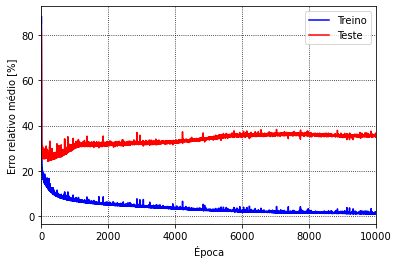

In [17]:
# list all data in history
print(history.history.keys())
# summarize history for loss
#plt.plot(10*np.log10(history.history['val_loss']), 'r', label='Teste')
#plt.plot(10*np.log10(history.history['loss']), 'b', label='Treino')
plt.plot(metric, 'b', label='Treino')
plt.plot(val_metric, 'r', label='Teste')
# plt.plot(np.sqrt(val_loss), label='Teste')
plt.legend(loc='upper right')
plt.xlim(0, 10000)
plt.grid(color='black', linestyle='dotted')
plt.ylabel('Erro relativo médio [%]')
plt.xlabel('Época')
plt.savefig('erro_v2.png')
plt.show()

In [18]:
model.save('model_v2.h5')